# AVOCADO PROJECTS:-
####   In this study we try to predict the avocado average price,with help of features.

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 

In [132]:
df=pd.read_csv('avocado.csv')
df.head()


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

- Problem Statement = In this question we see the two problem statement
            1. Find the region - classification ,target variable is region
            2. Find the price  - regression , target variable is Average price
            
      as region is target variable,then average price behave as feature and vice versa 

# 1. Find the region - classification problem 

In [12]:
df.head() ### data showing the values 

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [13]:
df.tail() # showing the last 5 rows of data set.

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [14]:
df.sample(5) # took 5 random rows as sample    

Unnamed: 0        Date  AveragePrice  Total Volume      4046      4225  \
12095           6  2016-11-13          1.92       1821.90      0.00    653.76   
13031           6  2016-11-13          1.51      11117.12   1608.57   3103.52   
10966          20  2015-08-09          1.87      34667.31   5931.00  16409.94   
9451           13  2015-09-27          1.85      80734.58  20639.23  50992.30   
2562           14  2015-09-20          1.44      37045.75    775.55  27299.15   

        4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
12095   0.00     1168.14      250.00      918.14          0.0       organic   
13031   0.00     6405.03     6353.31       51.72          0.0       organic   
10966  18.94    12307.43    10591.35     1716.08          0.0       organic   
9451    0.00     9103.05     9093.05       10.00          0.0       organic   
2562   29.82     8941.23     8492.34      448.89          0.0  conventional   

       year      region  
12095  2016       Boise  
13031  2016    LasVegas  
10966  2015      Plains  
9451   2015  California  
2562   2015    Syracuse

In [15]:
# Droping the column unnamed:0 ,it is just an index and not important 
df=df.drop('Unnamed: 0',axis=1)

In [16]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [17]:
df.shape  # total rows and total columns 

(18249, 13)

In [18]:
# showing the columns of dataset:-
df.columns  # this shows the all the columns of dataset

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

## Details of columns in dataset
   1. Average price :- Average price of volumes of avocado is sold.
   2. Total volumns :- Total sales volumns of Avocado 
   3. 4046 :- Total sale volume of small avocado
   4. 4225 :- Total sale volume of large avocado
   5. 4770 :- Total sale volume of extra large avocado
   6. Total Bags :- Total no. of bags sold
   7. Small Bags :- Total no. of small bags sold 
   8. Large bags :- Total no. of large bags sold 
   9. Xlarge bags :-Total no. of extra large bags sold 
   10. type :- types of avocado conventional and organic
   11. region :- region where the avocado is produced 
   

In [19]:
print(df['type'].unique(),'\n','\n',
df['region'].unique())

['conventional' 'organic'] 
 
 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [20]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [21]:
df.info()  # All the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- Here df.info observation we see no null values or no missing values in here , all the 13 columns has same rows 18249,3 object columns and 1 int columns and 9 float columns
although we need to preprocess the data for prediction.



In [22]:
# As we see here there are some continous and some are categorical columns:-
categorical_columns=df[['type','region']]

In [23]:
categorical_columns.head()  # these are the two categorical columns

type  region
0  conventional  Albany
1  conventional  Albany
2  conventional  Albany
3  conventional  Albany
4  conventional  Albany

In [24]:
# Rest of columns are continous columns:-
continous_columns=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]
continous_columns.head()

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  year  
0       93.25          0.0  2015  
1       97.49          0.0  2015  
2      103.14          0.0  2015  
3      133.76          0.0  2015  
4      197.69          0.0  2015

In [25]:
# for better observation we use describe method
df.describe()


AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

 - no missing values (18249,13) shape of dataset
 - Here we observe :-
   - Average price
                  mean is 1.405978  
                  s.deviation is 0.402677
                  max value is 3.250000
                 
        clearly,average price is not normally distributed as mean is not close to zero and std is not so close to 1 
    
    - Total volume 
                 mean is 8.506440e+05
                 std is 3.453545e+06
                 max value is 6.250565e+07	
                 
         Here we see mean is close to zero but std in not close 1
         
    - 4046
                mean is 2.930084e+05	
                std is 1.264989e+06
                max is 2.274362e+07	
                
         Here mean is almost close to zero but std is not so close to 1
         
    - 4225     
               mean is 2.951546e+05
               std is 1.204120e+06
               max is 2.047057e+07	
         
        Here mean is almost equal to zero , but std is not close to 1
        
    - 4770
               mean is 2.283974e+04	
               std is  1.074641e+05	
               max is  2.546439e+06	
               
        Here mean is close to 0 but std is not so close to 1
        
     - Total bags
                 mean is 2.396392e+05	
                 std is 9.862424e+05	
                 max is 1.937313e+07	
         Here also mean is close to 0 but std is not so close to 1        
          
     - Small Bags	
                 mean is 1.821947e+05	
                 std is 7.461785e+05	
                 max is 1.338459e+07	
          Here also mean is close to 0 std is not so close to 1
                
      - Large bags 
                  mean is  5.433809e+04	
                  std is   2.439660e+05	
                  max is   5.719097e+06	
          Here also mean is not so close to 0 but, std is not so close to 1 
          
      - XLarge Bags	
                  mean is 3106.426507
                  std is 17692.894652	
                  max is 551693.650000	
                
               
         so, these are some basic observation we need more work to for clear and definite observation
                 

# EDA

In [26]:
# importing packages
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings 
warnings.filterwarnings('ignore')

conventional    9126
organic         9123
Name: type, dtype: int64

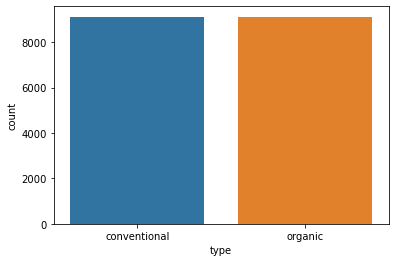

In [27]:
# we are taking the region as target variable as classification problem 
# for categorical data representation:-
sb.countplot(df['type'])
df['type'].value_counts()   

the two type of avocado is here conventional and organic, all most both are same in count, so we presume that demand of both type of avocado is equal

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

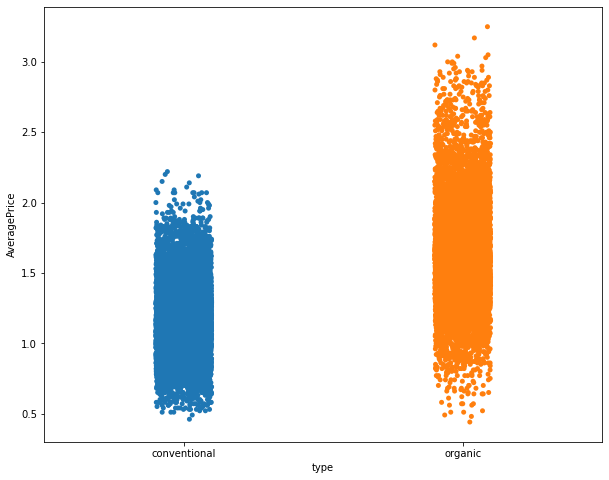

In [29]:
plt.figure(figsize=(10,8))

sb.stripplot(x='type',y='AveragePrice',data=df)

Here we see that the price of organic is higher than the price of conventional, although demand of both are seem almost equal

In [30]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

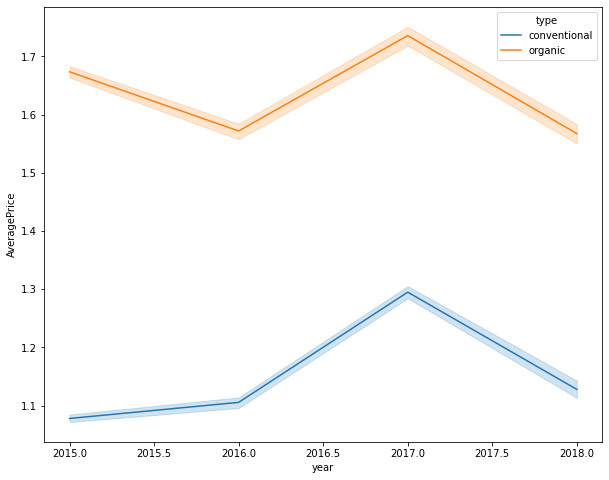

In [31]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='year',data=df,hue='type')

- price is down for both organic and conventional in 2018
- price hike can be seen in year 2017

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

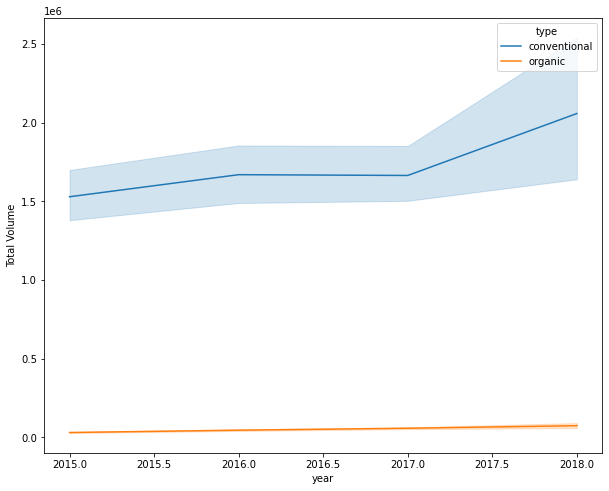

In [32]:
plt.figure(figsize=(10,8))
sb.lineplot(y='Total Volume',x='year',data=df,hue='type')

 - volume of organic is increases in 2017 while in organic it may increases.
 

<AxesSubplot:xlabel='year', ylabel='Total Bags'>

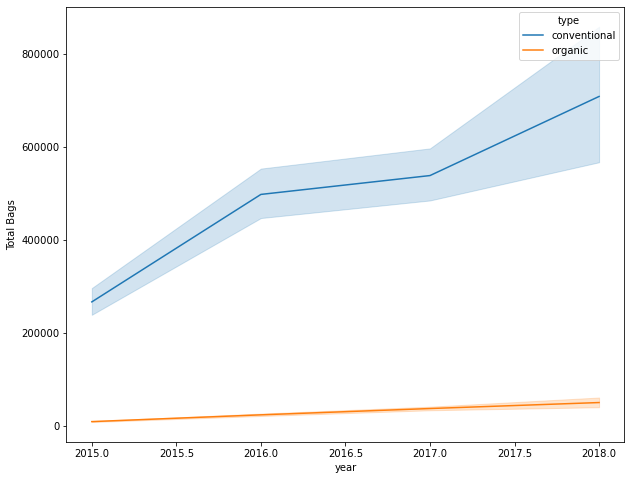

In [33]:
plt.figure(figsize=(10,8))
sb.lineplot(y='Total Bags',x='year',data=df,hue='type')

- total bags for both, organic and conventional is upward direction in nature

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

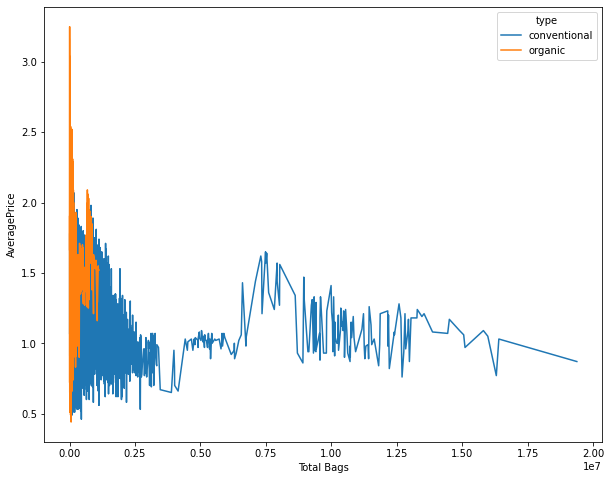

In [34]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='Total Bags',data=df,hue='type')

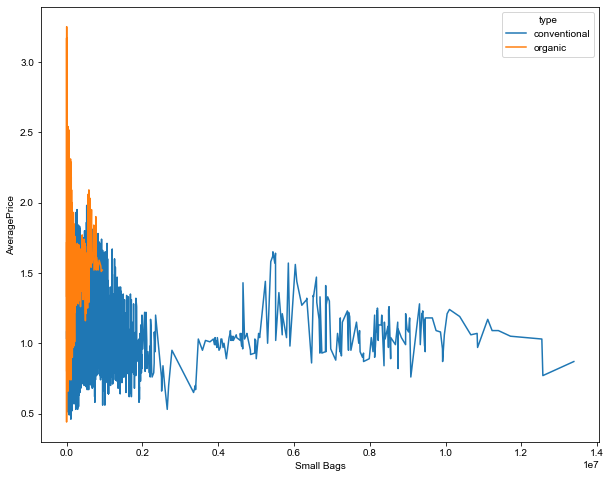

In [35]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='Small Bags',data=df,hue='type')
sb.set(font_scale=1)

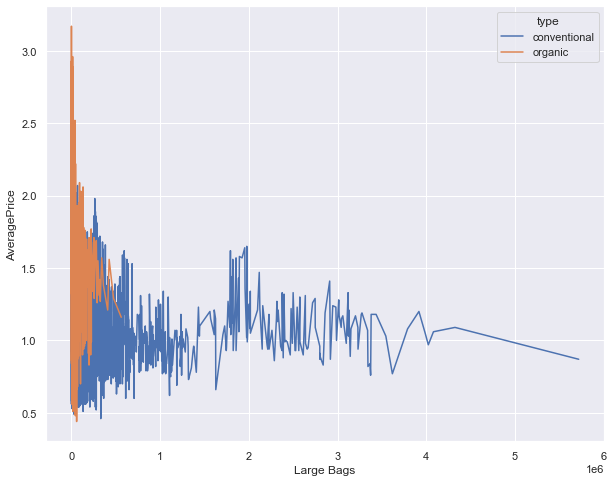

In [36]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='Large Bags',data=df,hue='type')
sb.set(font_scale=1)

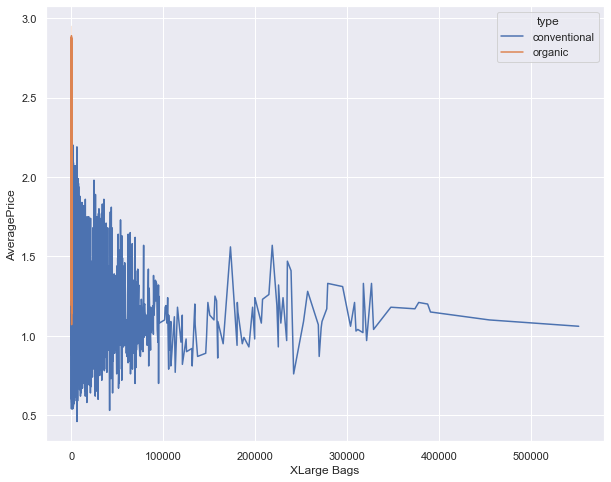

In [37]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='XLarge Bags',data=df,hue='type')
sb.set(font_scale=1)

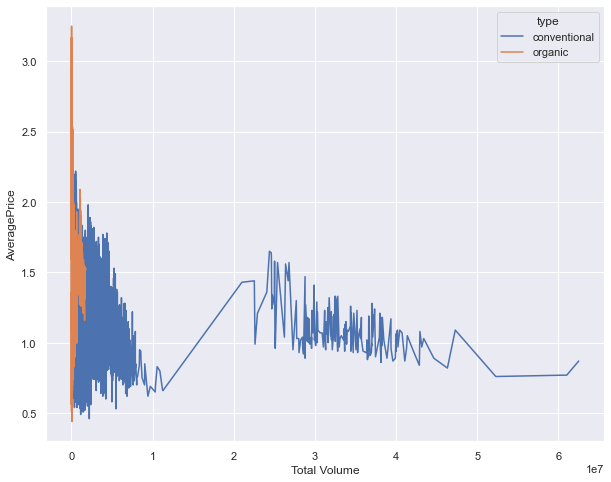

In [43]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='Total Volume',data=df,hue='type')
sb.set(font_scale=1)

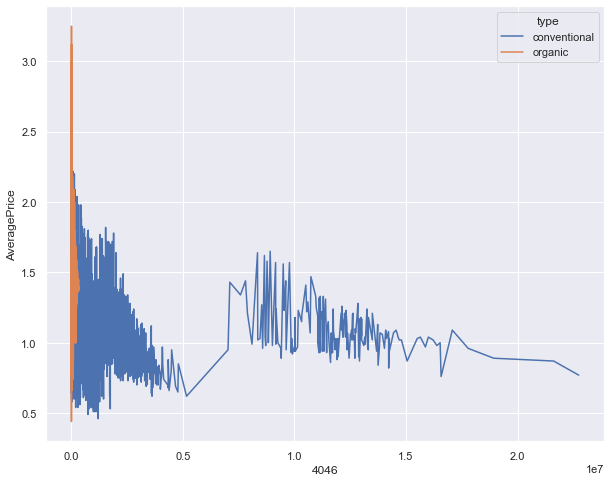

In [44]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='4046',data=df,hue='type')
sb.set(font_scale=1)

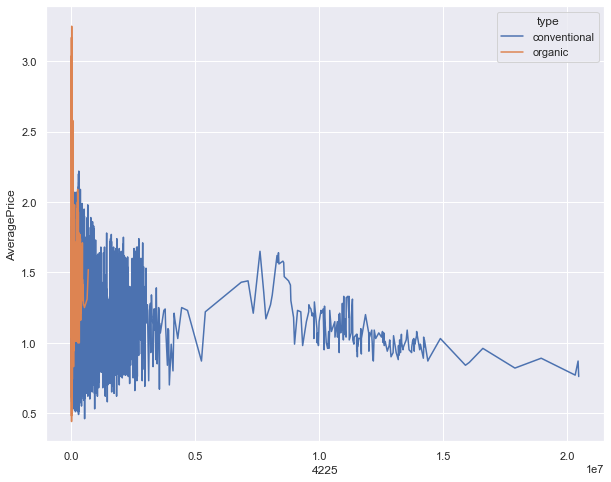

In [45]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='4225',data=df,hue='type')
sb.set(font_scale=1)

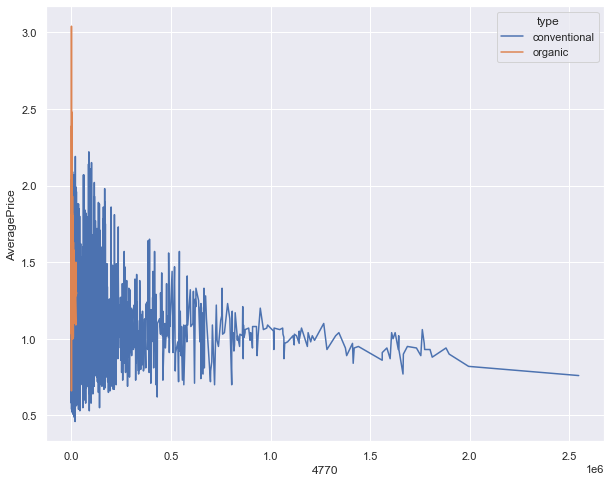

In [46]:
plt.figure(figsize=(10,8))
sb.lineplot(y='AveragePrice',x='4770',data=df,hue='type')
sb.set(font_scale=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

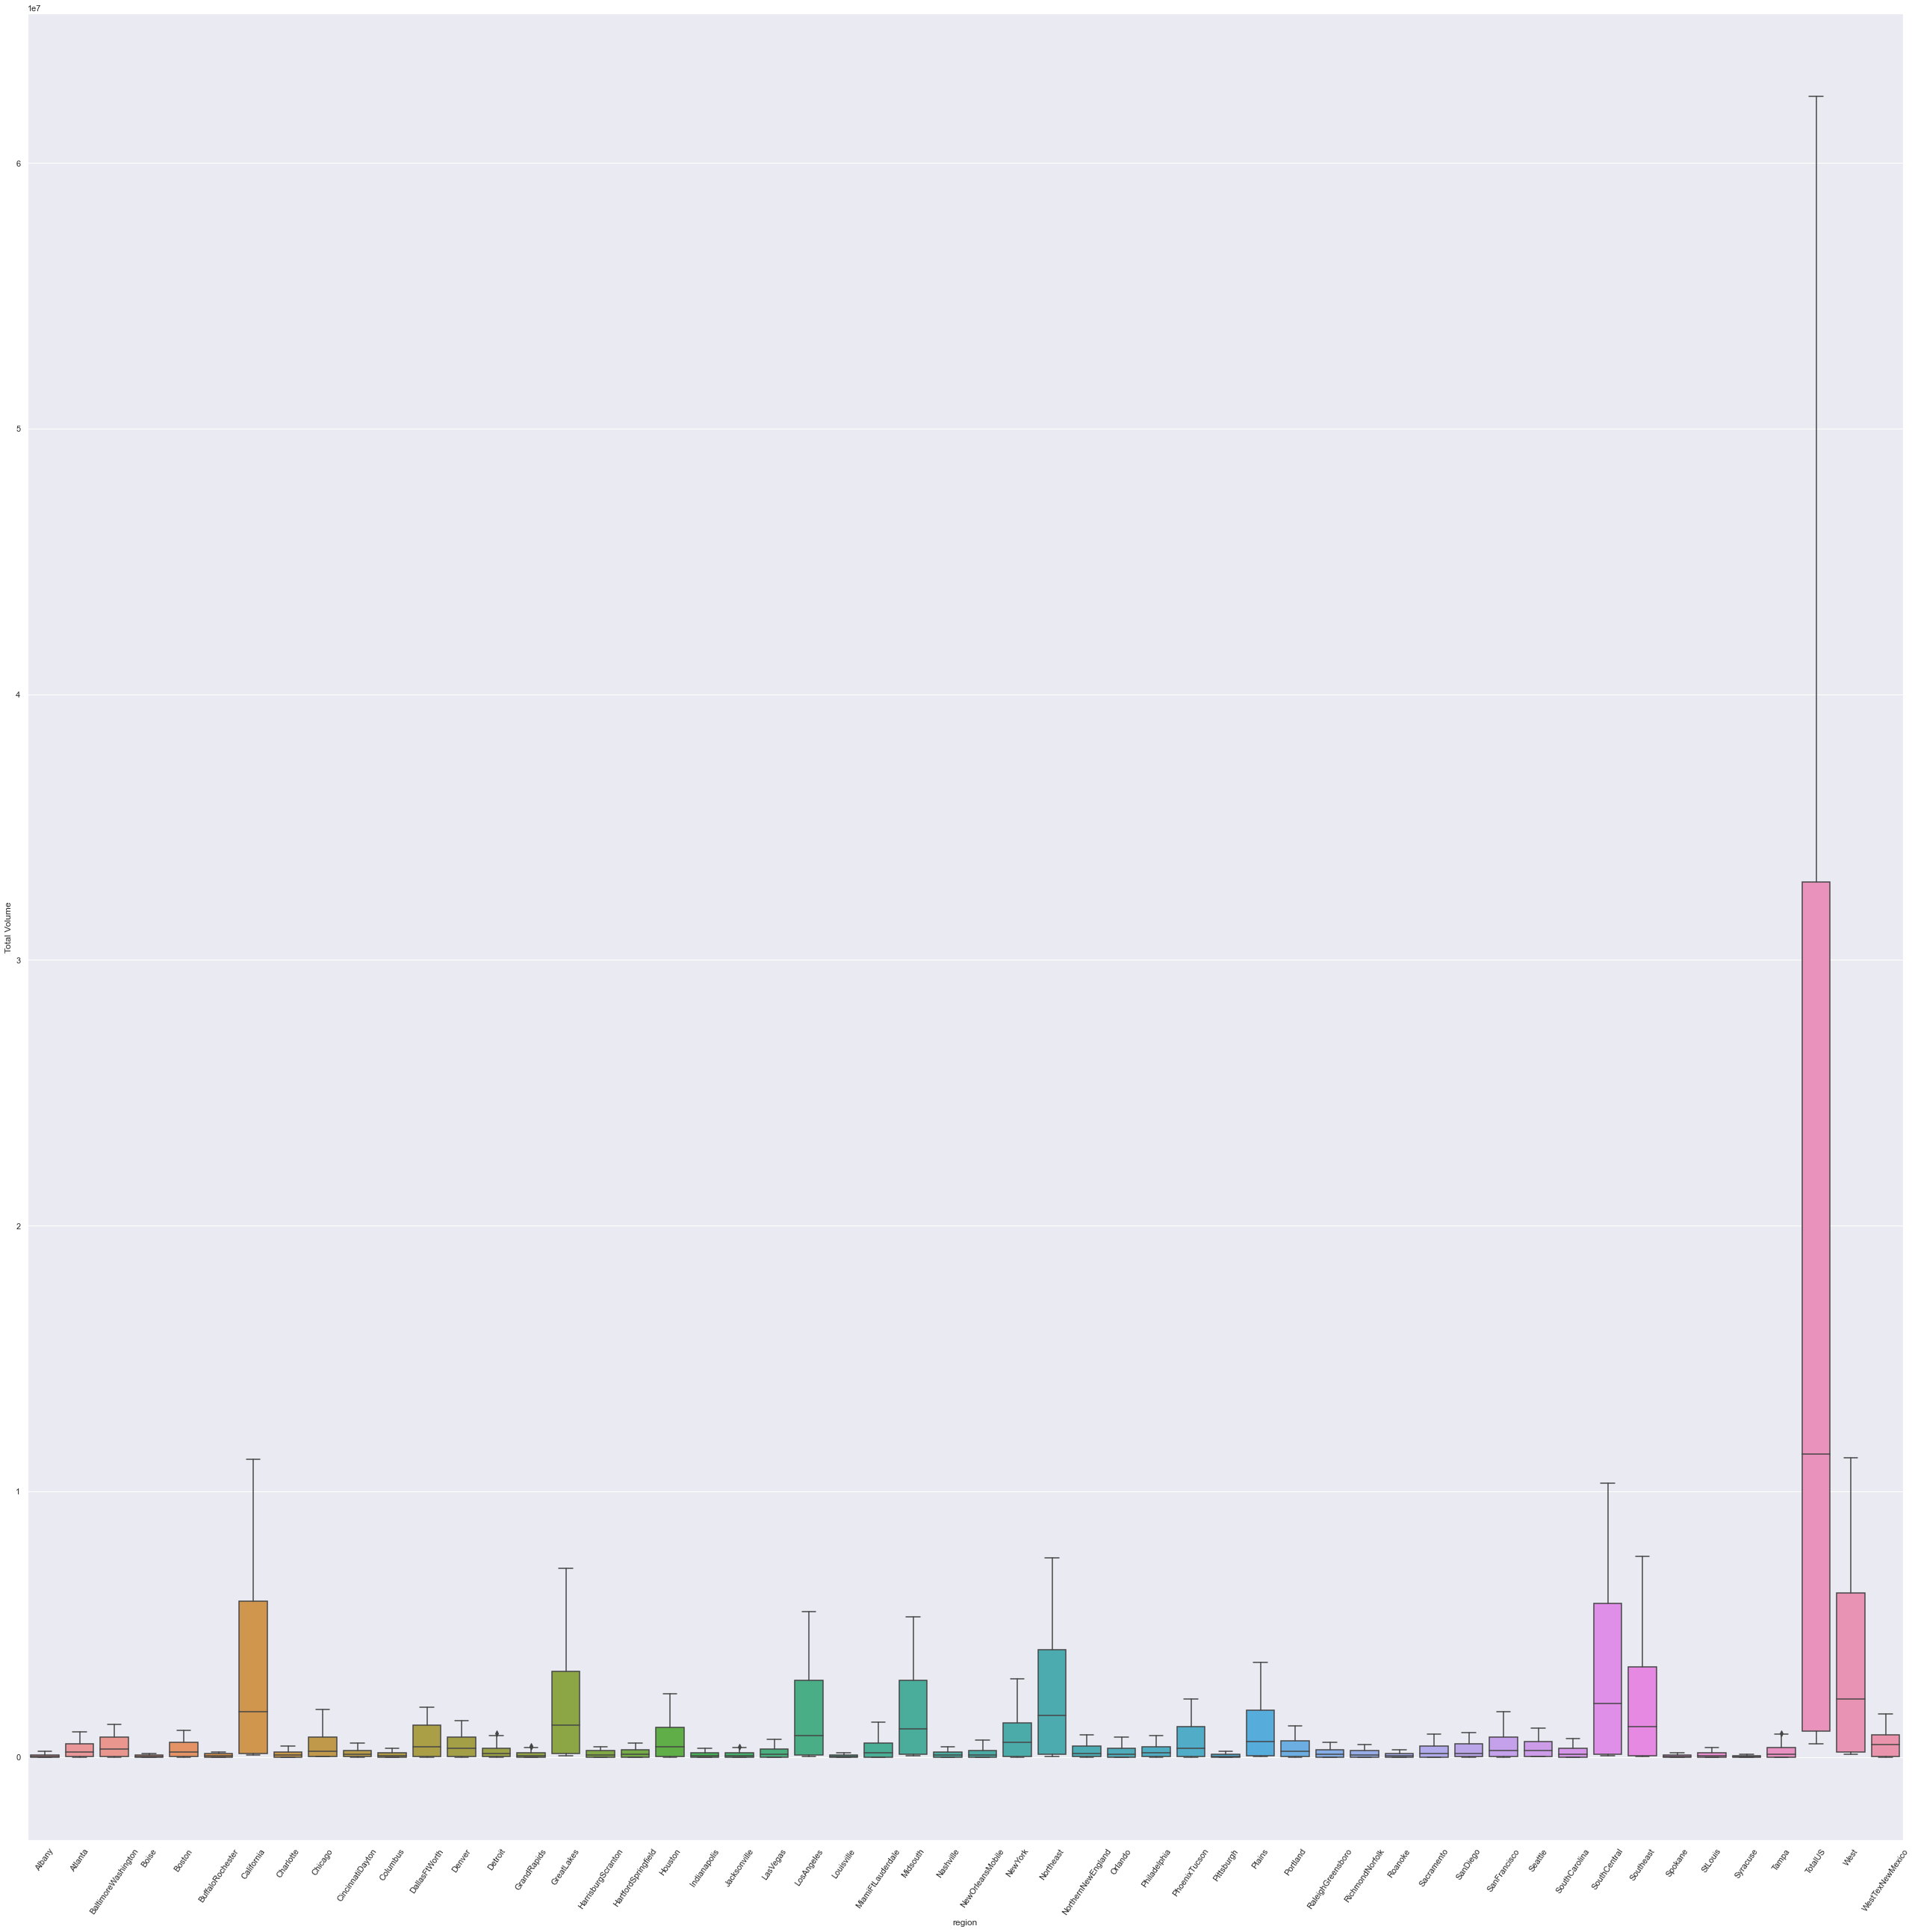

In [47]:
plt.figure(figsize=(45,45))
sb.boxplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=55)

1.california and 2.south central has the heighest volume in us, other then us west has highest volume

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

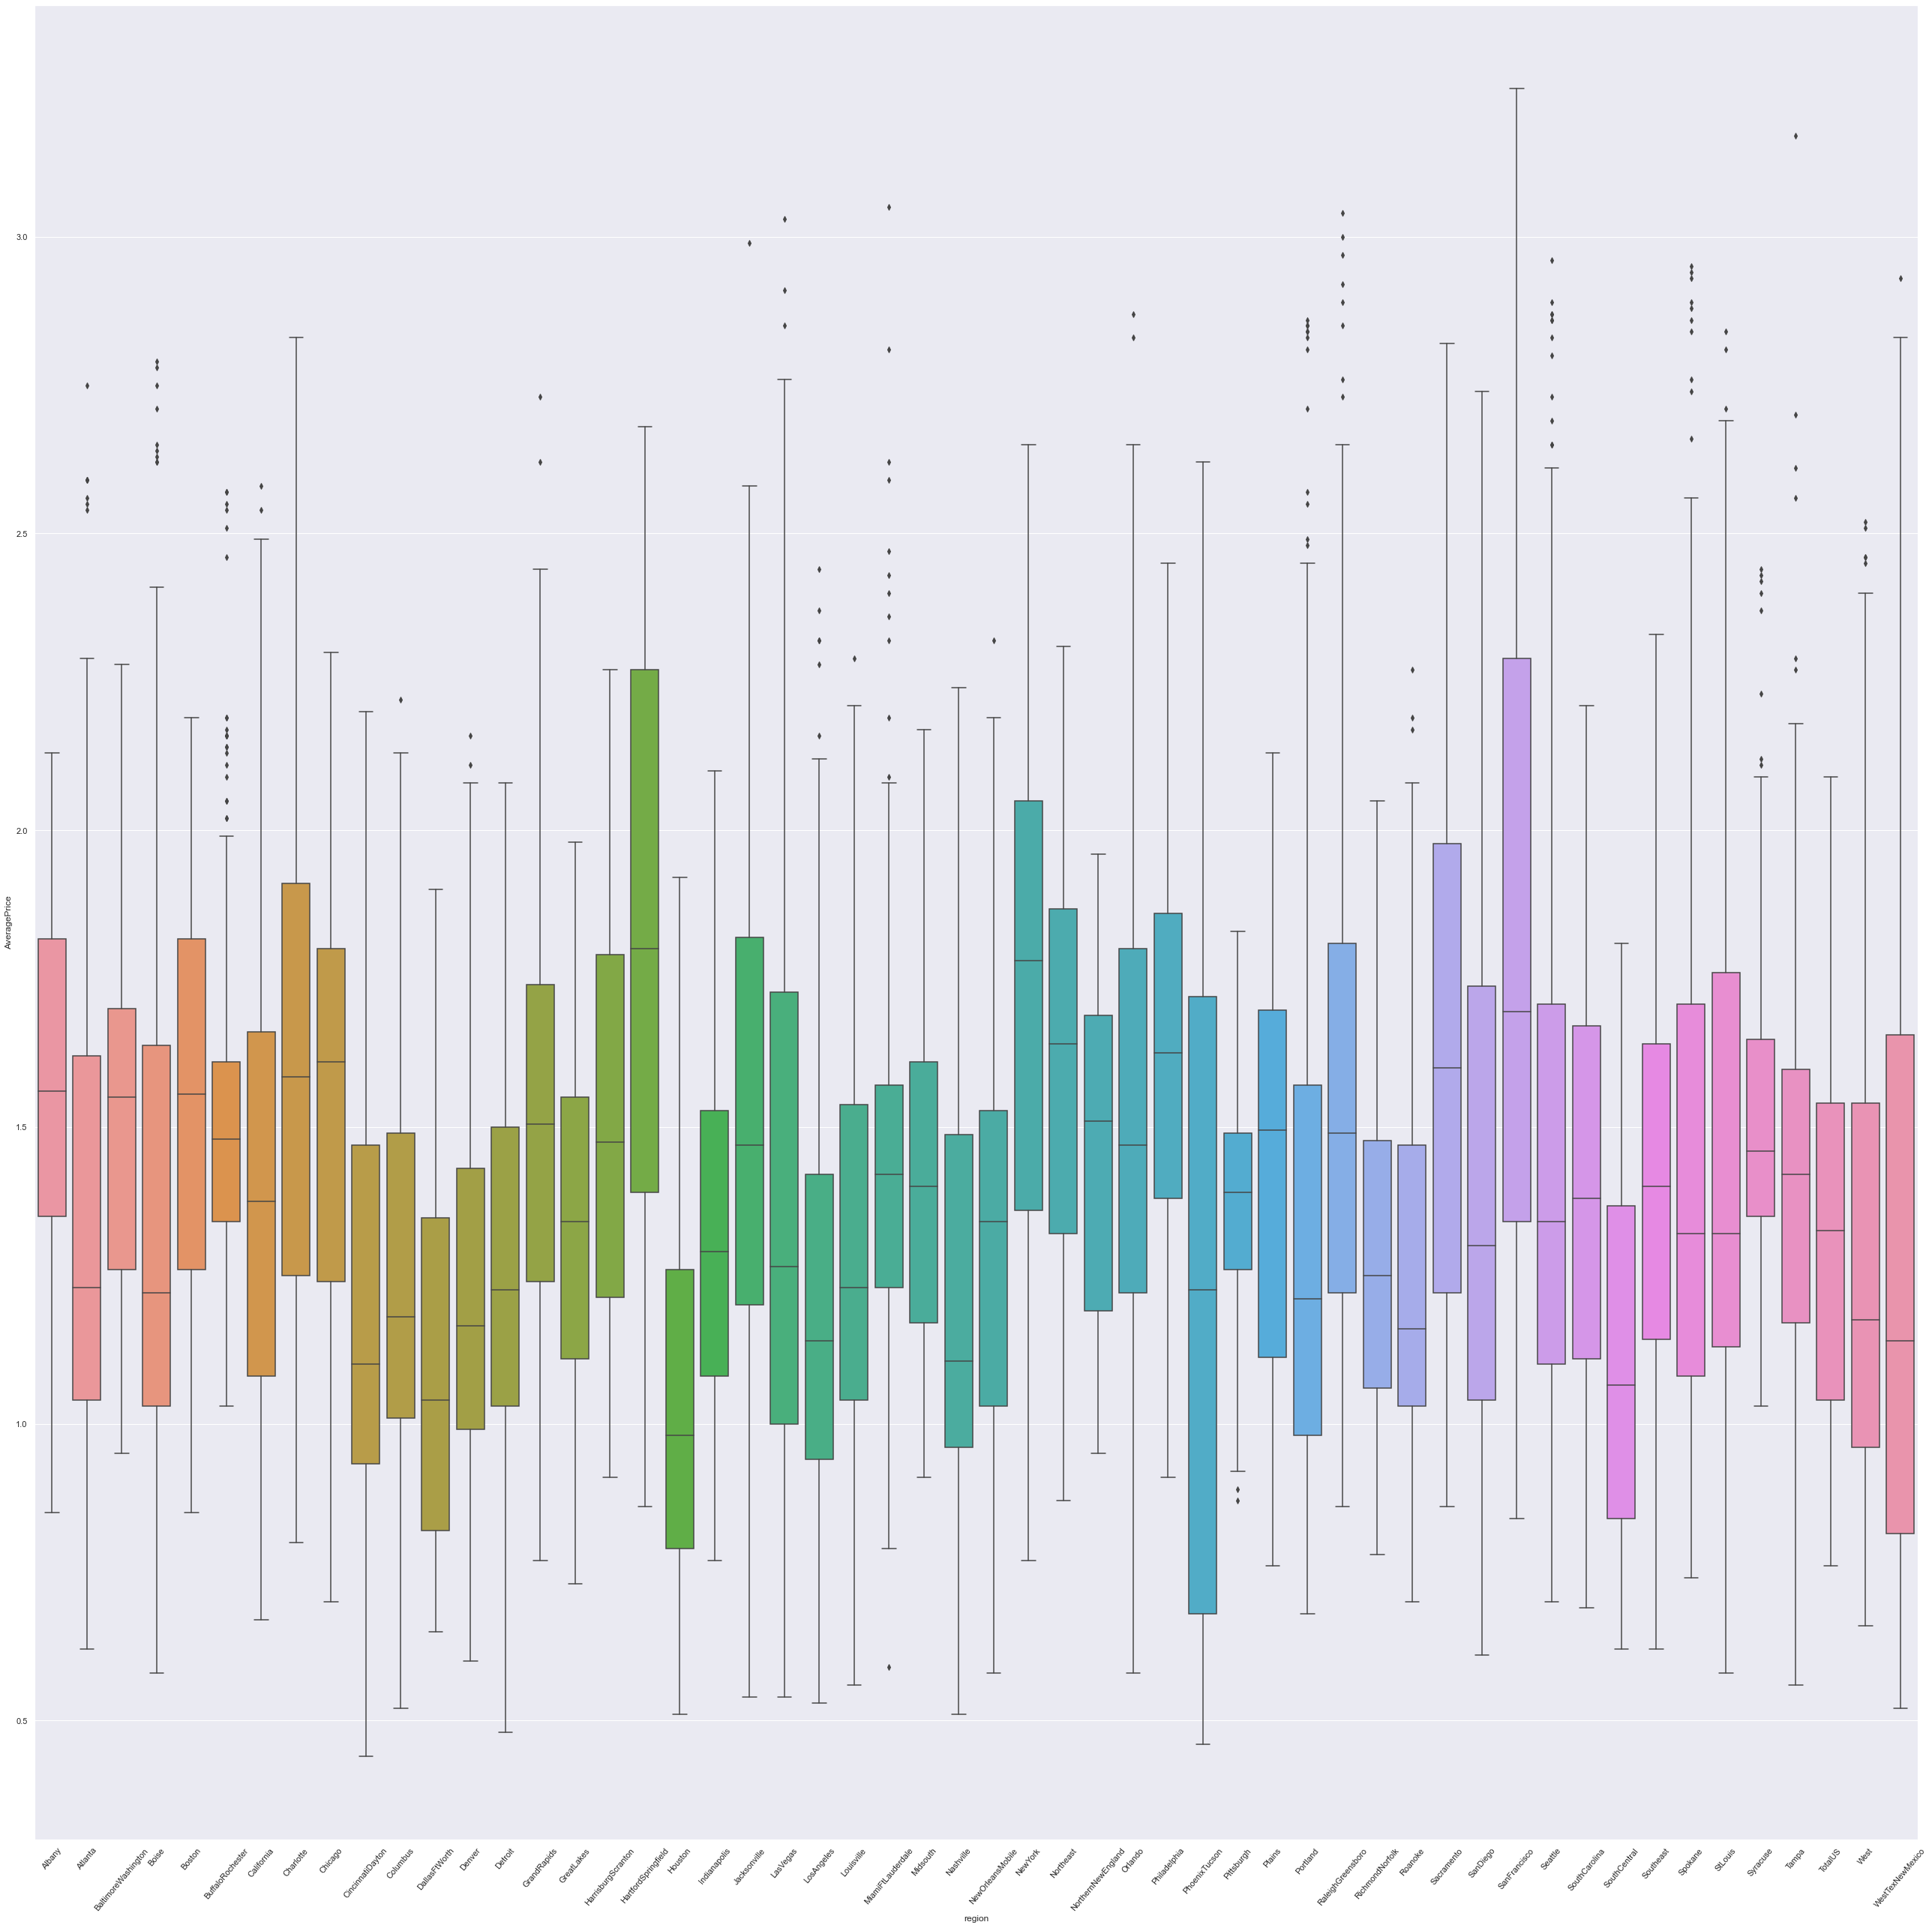

In [48]:
plt.figure(figsize=(45,45))
sb.boxplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

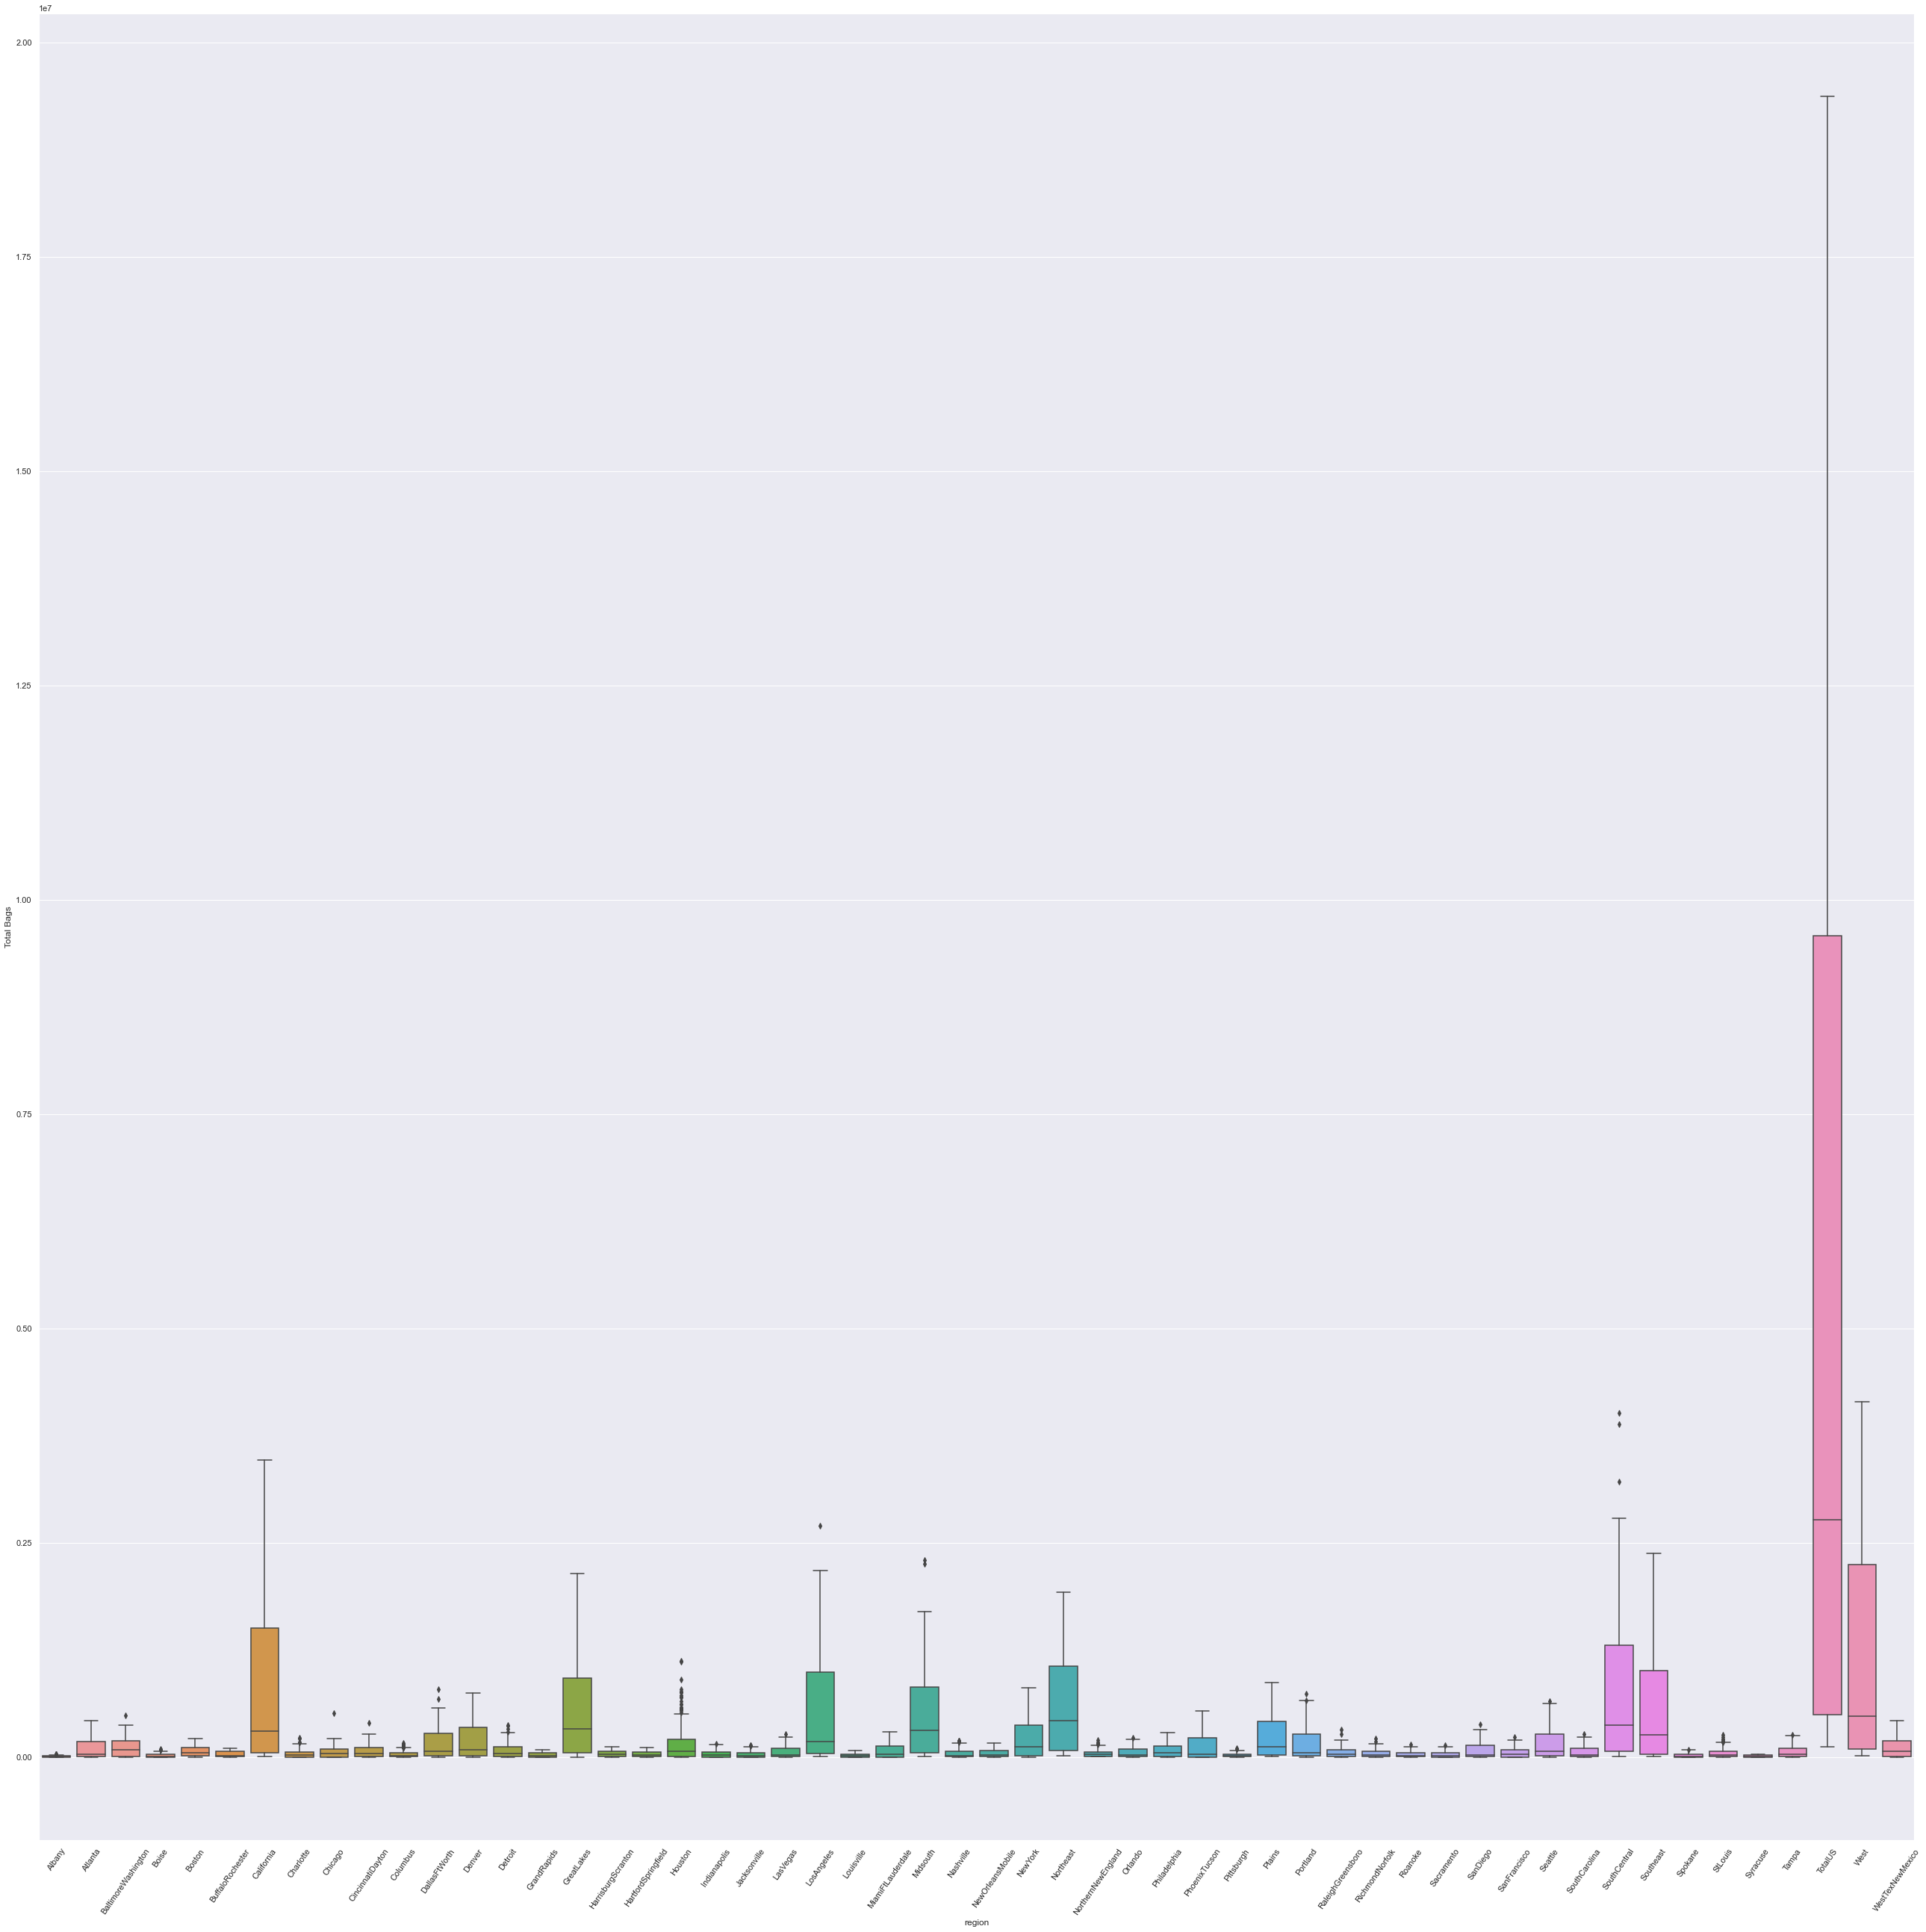

In [49]:
plt.figure(figsize=(45,45))
sb.boxplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=55)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

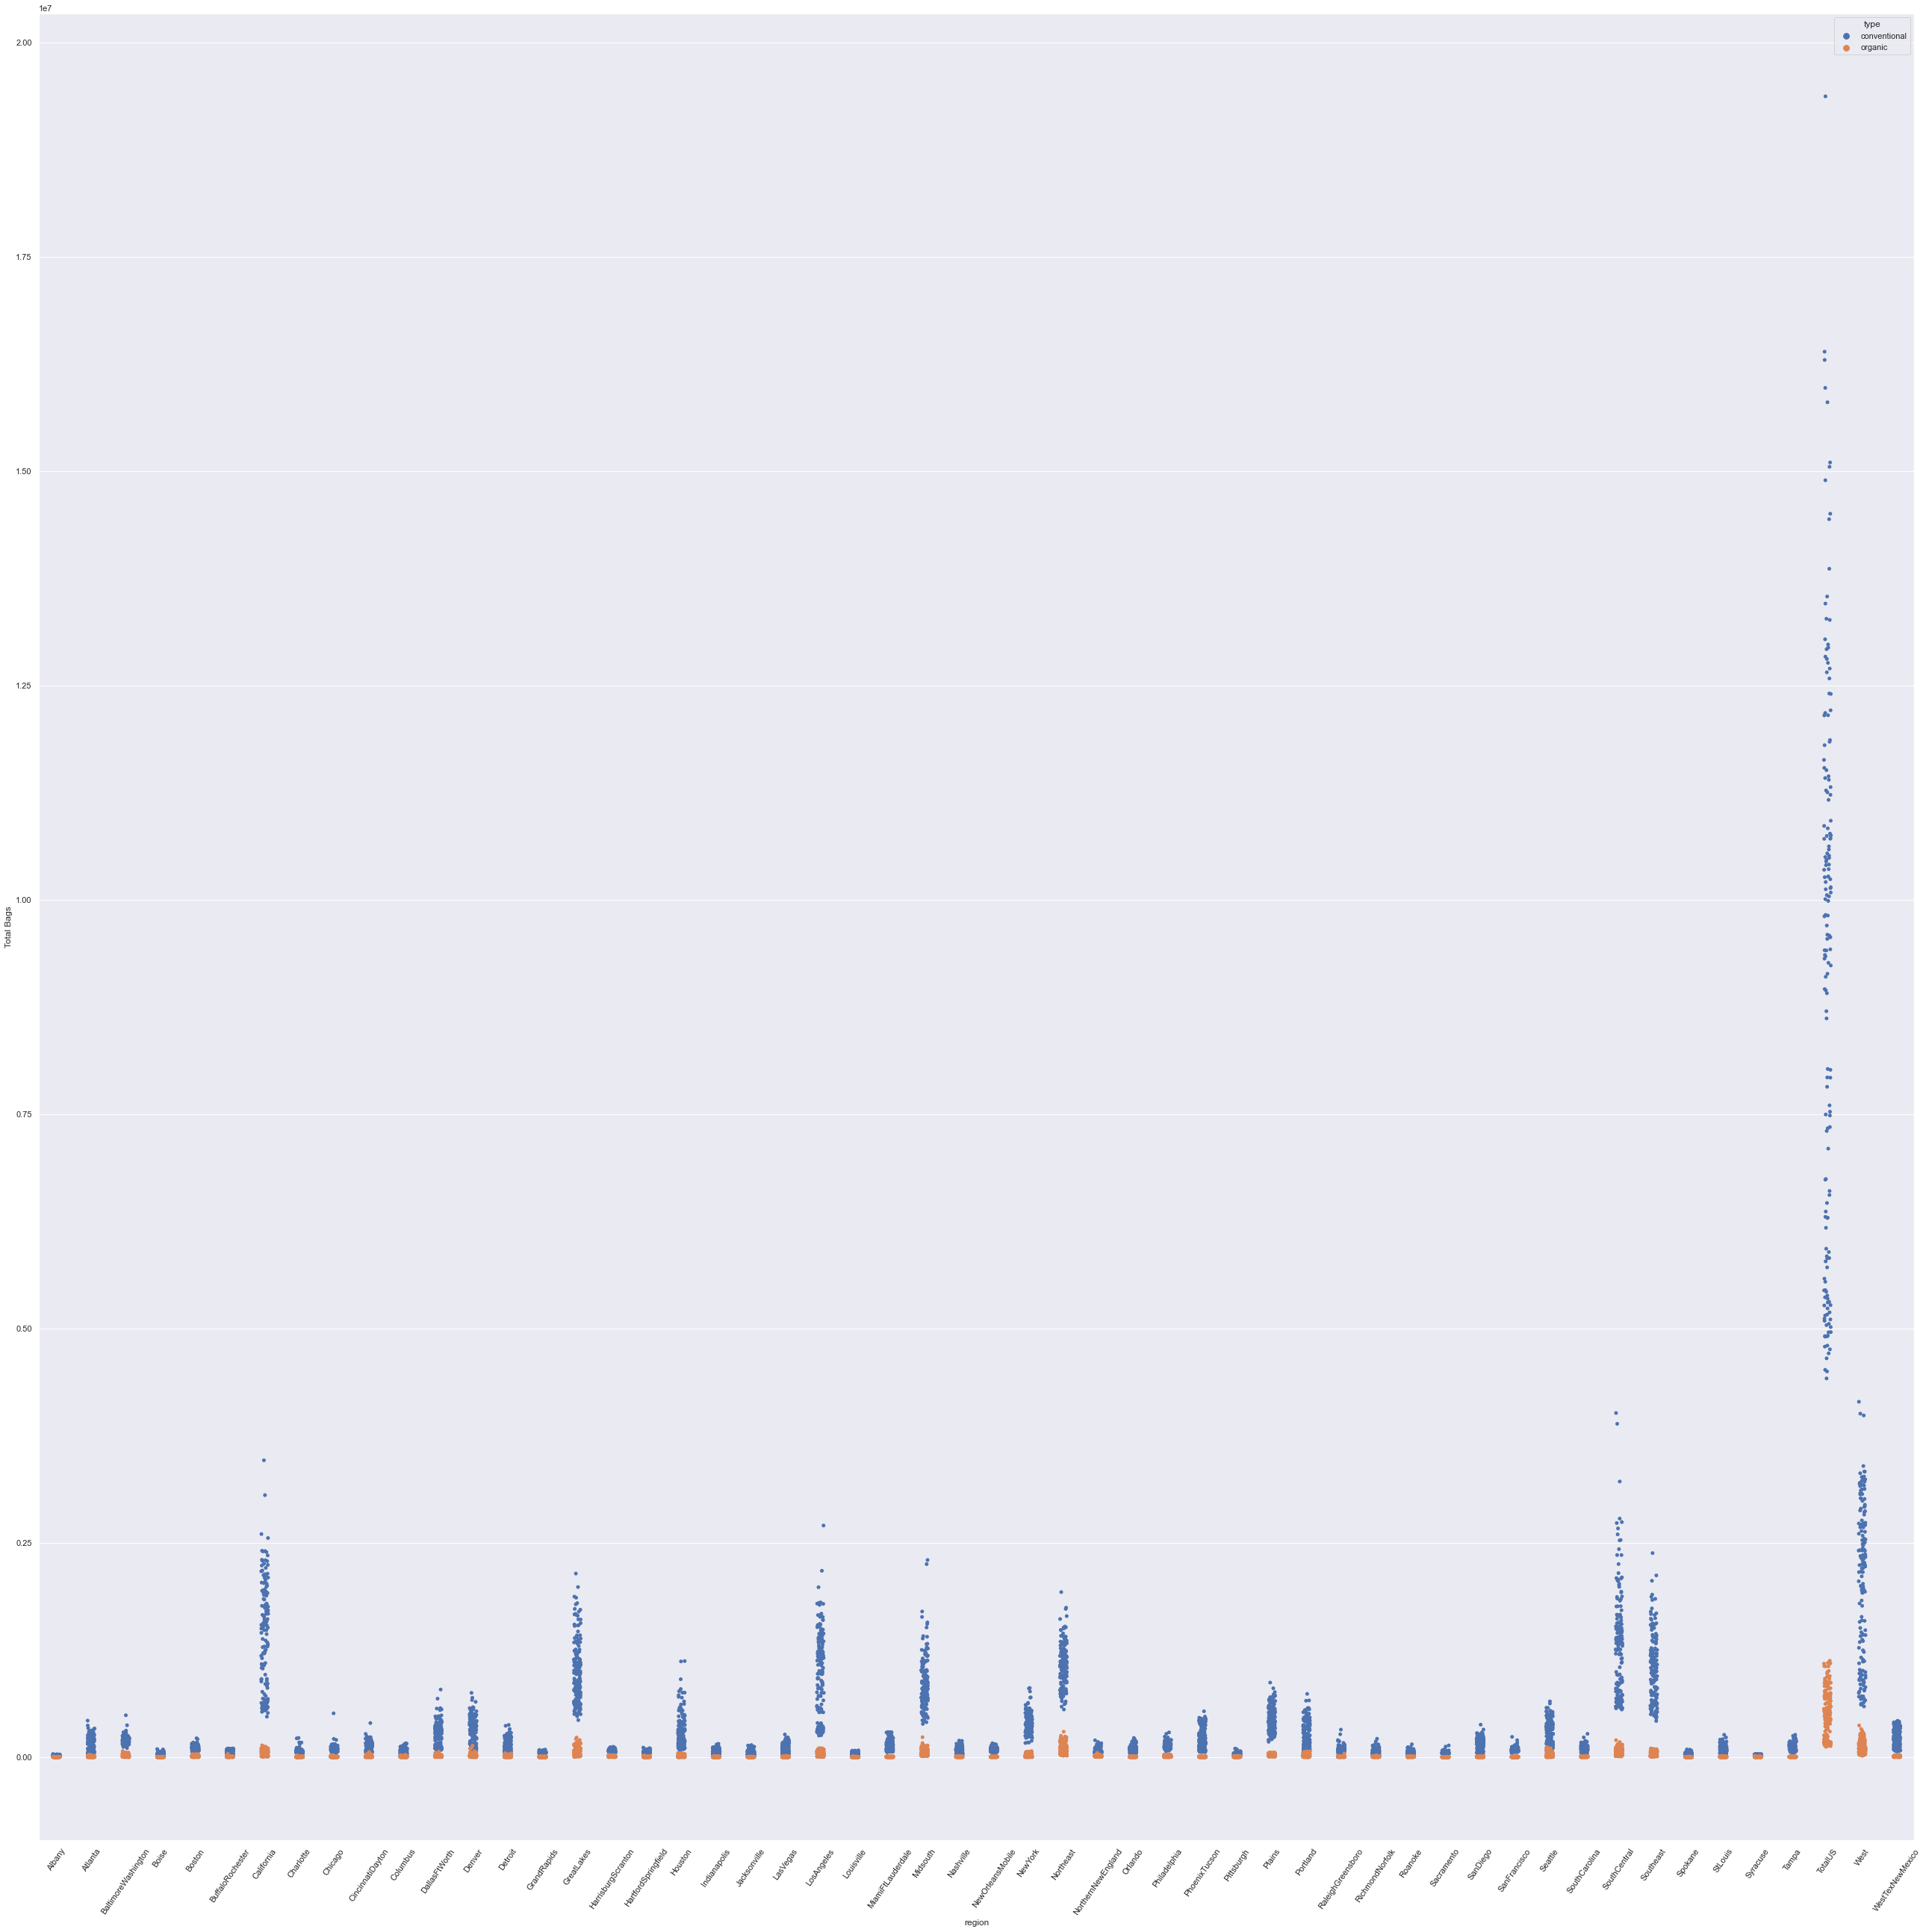

In [50]:
plt.figure(figsize=(45,45))
sb.stripplot(x='region',y='Total Bags',hue='type',data=df)
plt.xticks(rotation='55')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

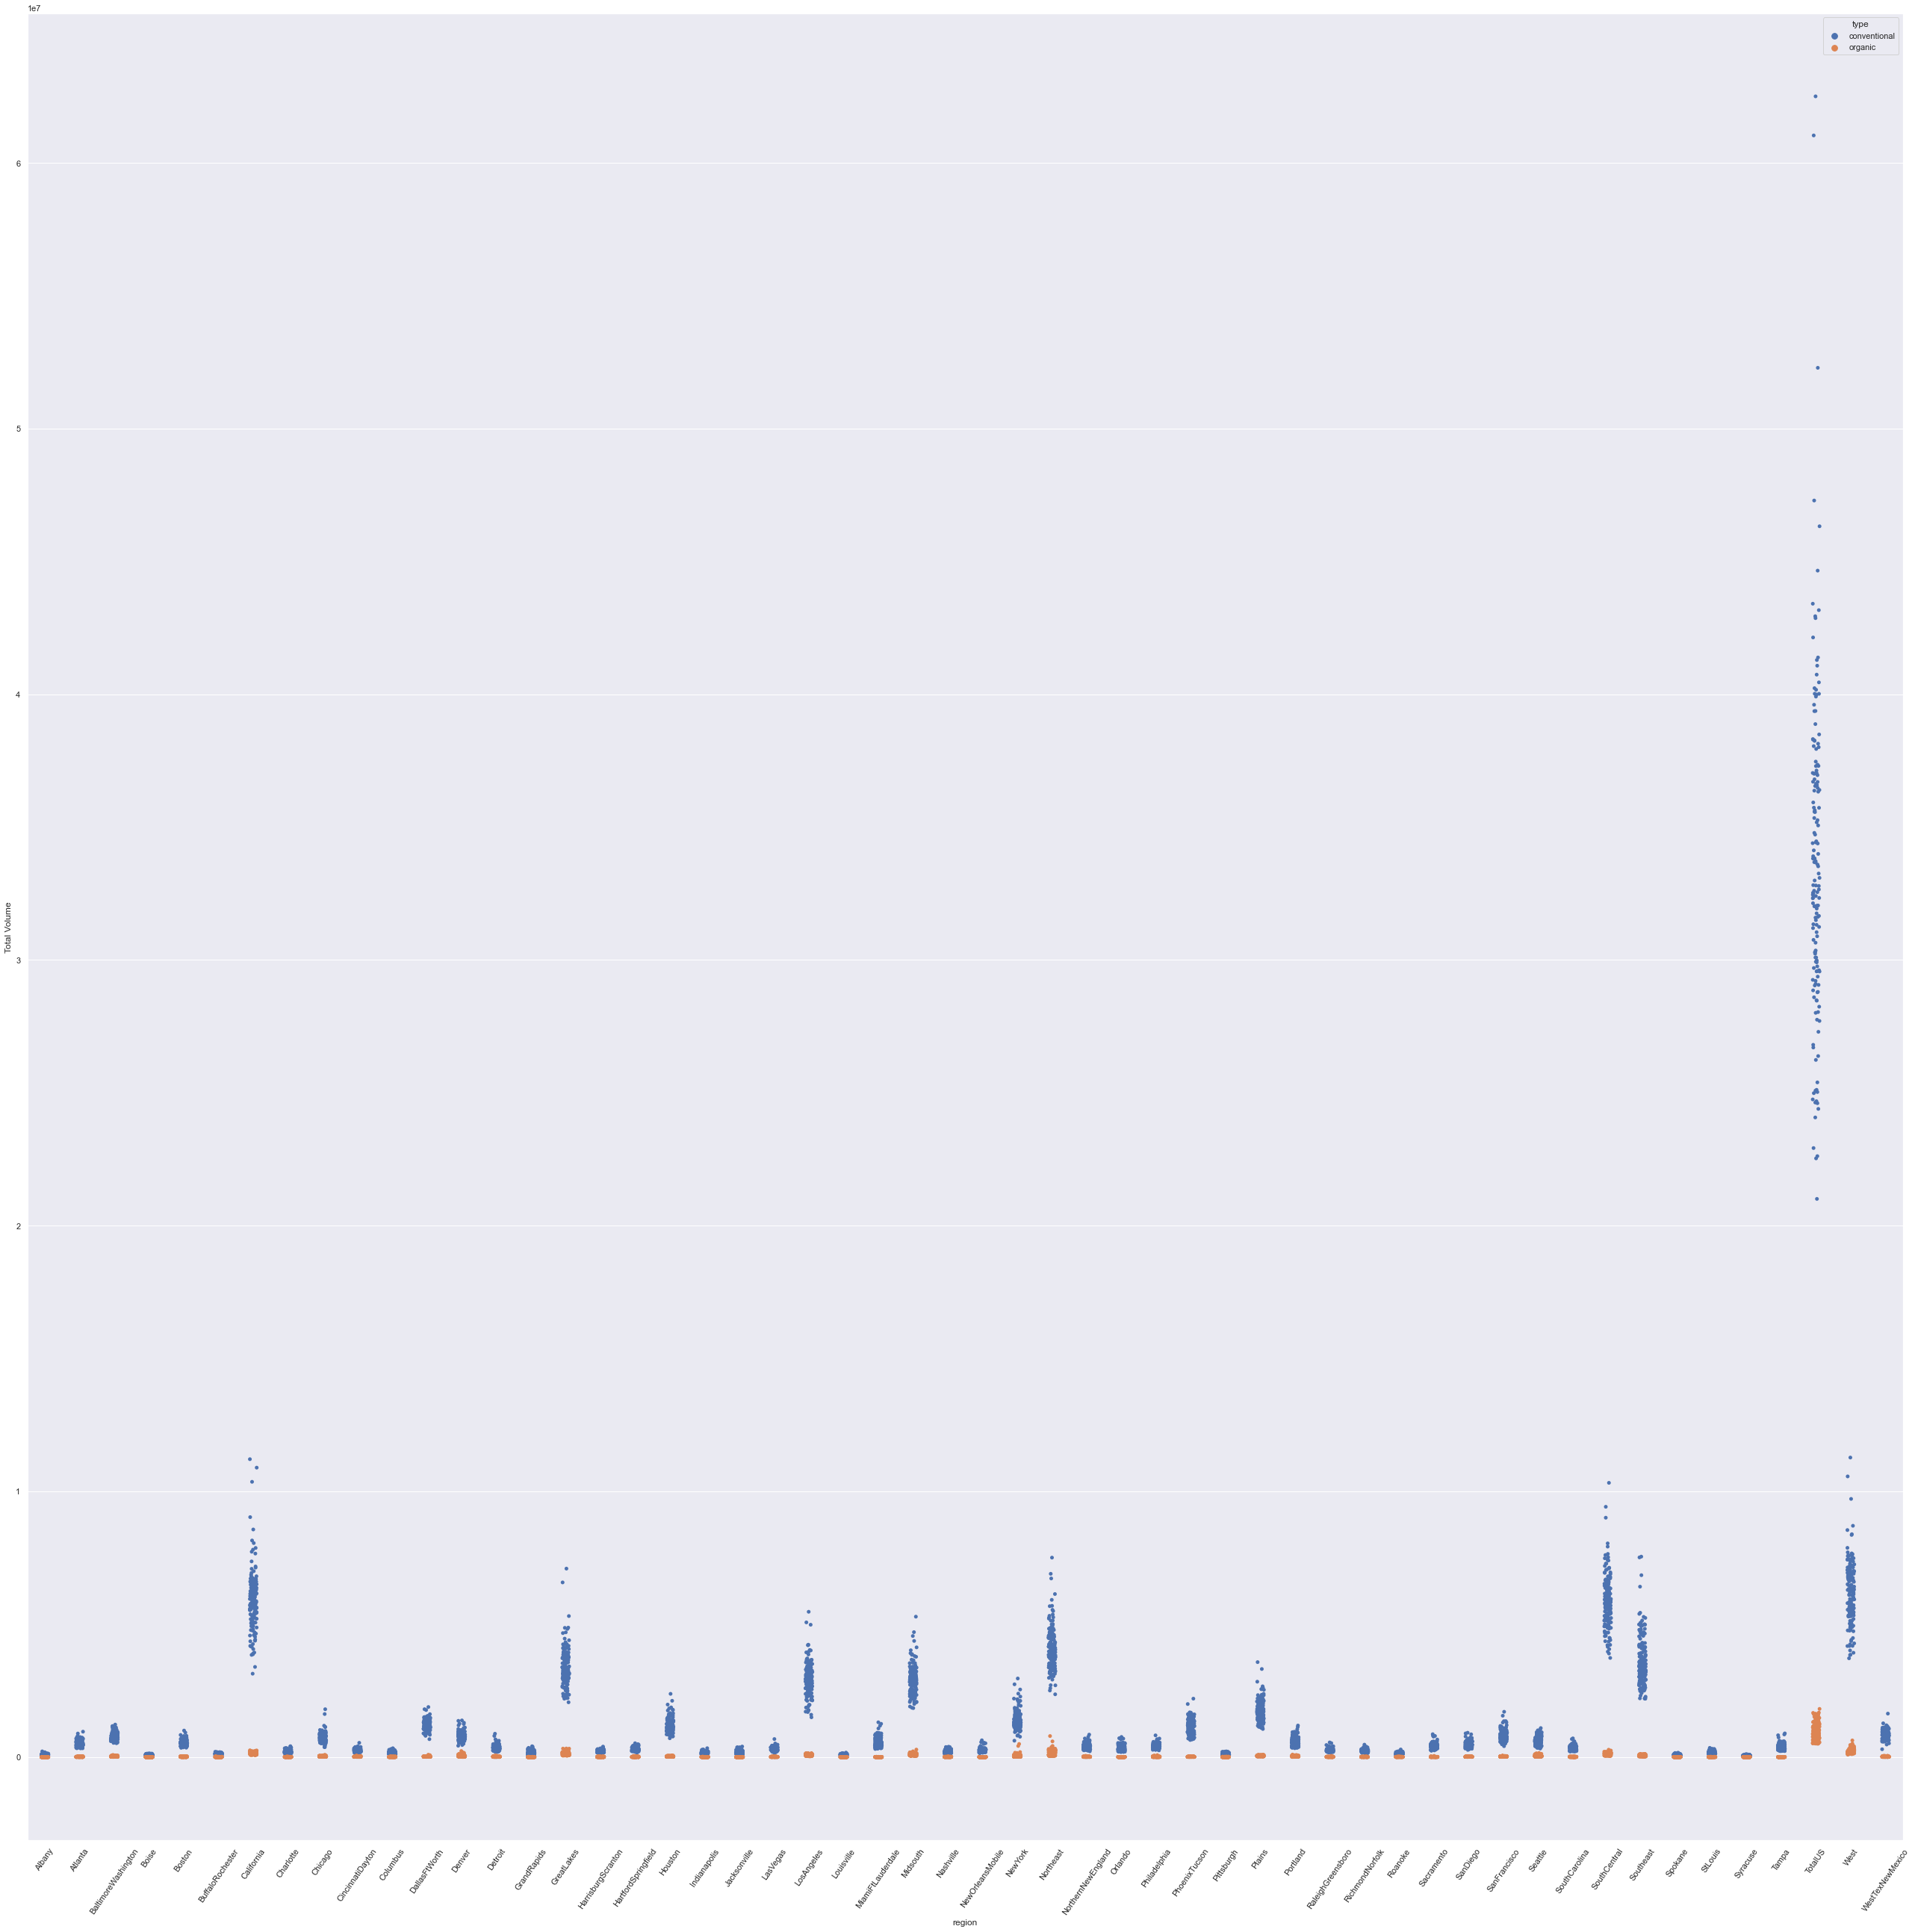

In [51]:
plt.figure(figsize=(45,45))
sb.stripplot(x='region',y='Total Volume',hue='type',data=df)
plt.xticks(rotation='55')


In [133]:
r=pd.DataFrame(df[['AveragePrice','region']])
r=r.sort_values(by='AveragePrice',ascending=False)

r=r.reset_index()
r.drop('index',axis=1,inplace=True)
r

AveragePrice             region
0              3.25       SanFrancisco
1              3.17              Tampa
2              3.12       SanFrancisco
3              3.05  MiamiFtLauderdale
4              3.04  RaleighGreensboro
...             ...                ...
18244          0.49      PhoenixTucson
18245          0.49   CincinnatiDayton
18246          0.48            Detroit
18247          0.46      PhoenixTucson
18248          0.44   CincinnatiDayton

[18249 rows x 2 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'SanFrancisco'),
  Text(1, 0, 'Tampa'),
  Text(2, 0, 'MiamiFtLauderdale'),
  Text(3, 0, 'RaleighGreensboro'),
  Text(4, 0, 'LasVegas'),
  Text(5, 0, 'Jacksonville'),
  Text(6, 0, 'Seattle'),
  Text(7, 0, 'Spokane'),
  Text(8, 0, 'WestTexNewMexico'),
  Text(9, 0, 'Orlando'),
  Text(10, 0, 'Portland'),
  Text(11, 0, 'StLouis'),
  Text(12, 0, 'Charlotte'),
  Text(13, 0, 'Sacramento'),
  Text(14, 0, 'Boise'),
  Text(15, 0, 'Atlanta'),
  Text(16, 0, 'SanDiego'),
  Text(17, 0, 'GrandRapids'),
  Text(18, 0, 'HartfordSpringfield'),
  Text(19, 0, 'NewYork'),
  Text(20, 0, 'PhoenixTucson'),
  Text(21, 0, 'California'),
  Text(22, 0, 'BuffaloRochester'),
  Text(23, 0, 'West'),
  Text(24, 0, 'Philadelphia'),
  Text(25, 0, 'Syracuse'),
  Te

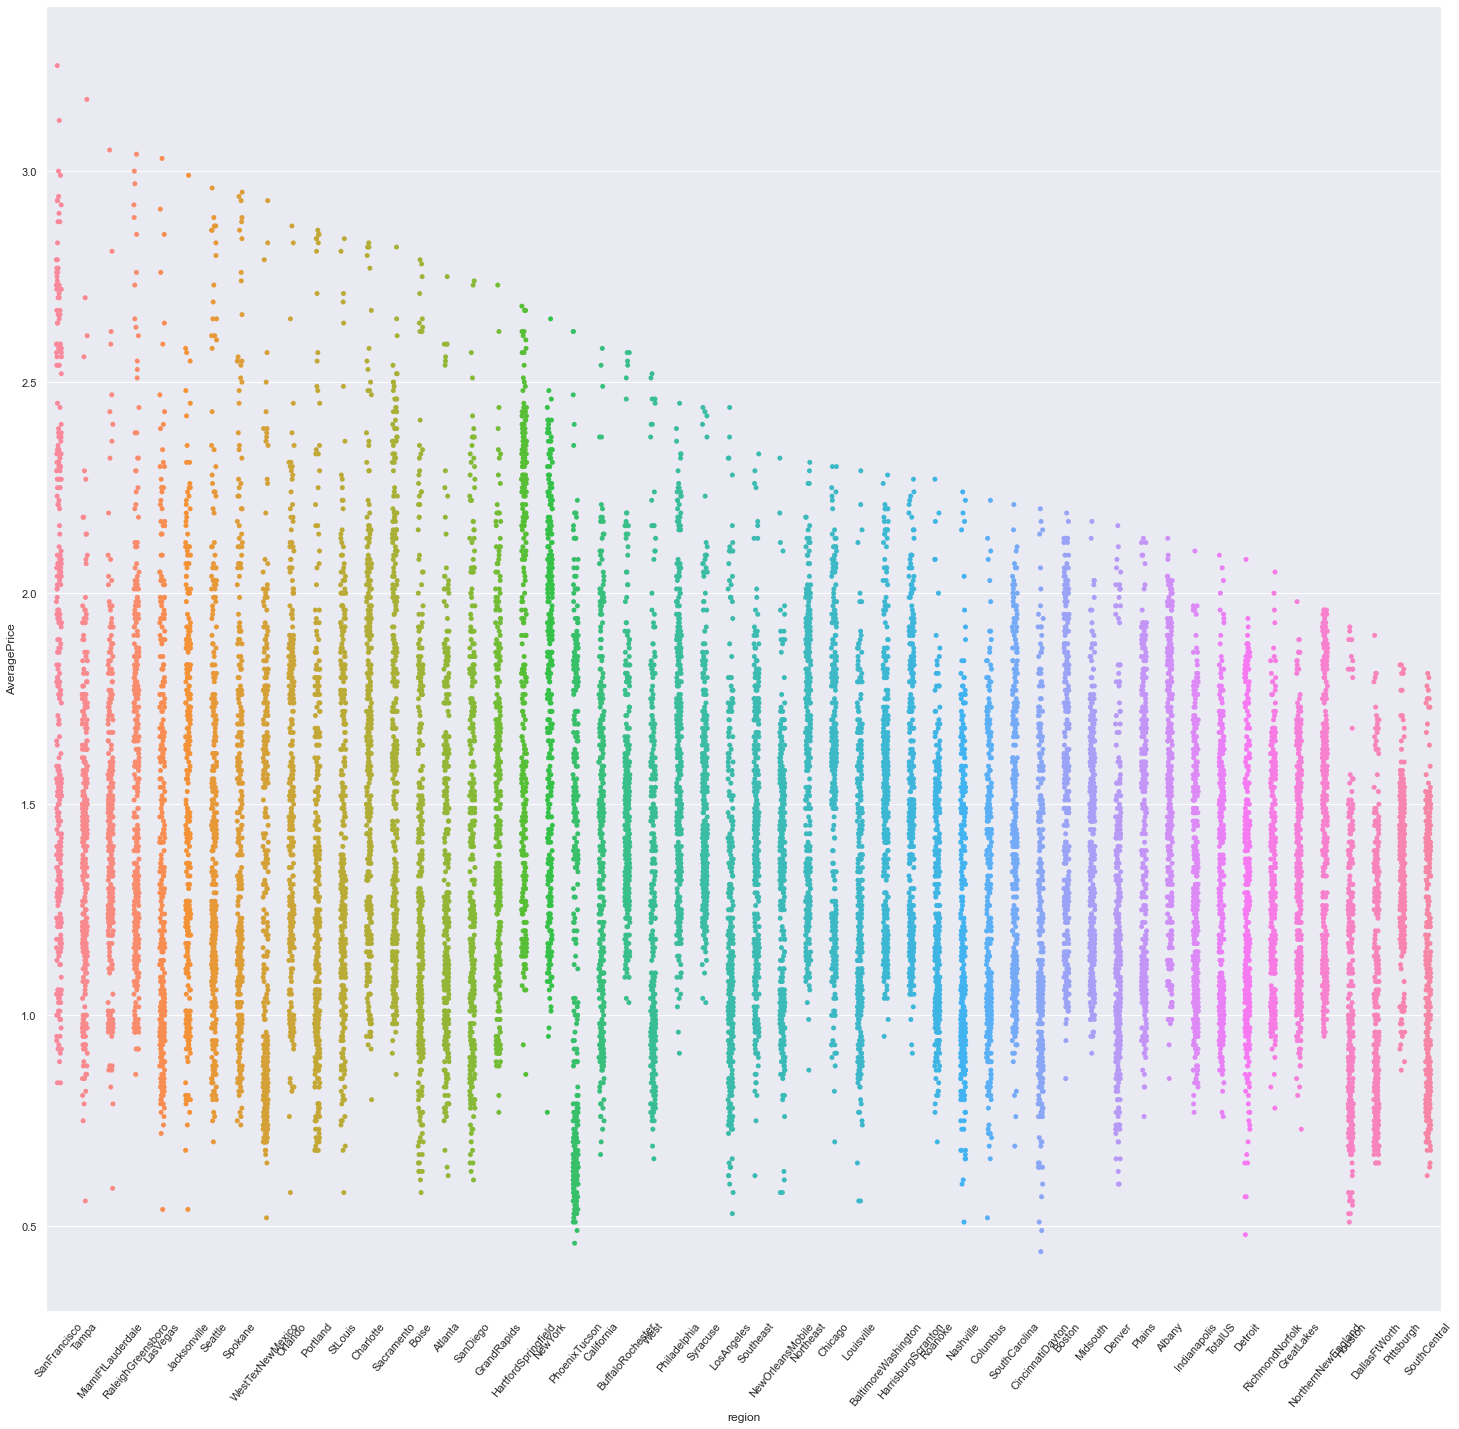

In [53]:
plt.figure(figsize=(25,24))
sb.stripplot(y='AveragePrice',x='region',data=r)
plt.xticks(rotation=50)

region having the higher price 
- sanfrancisco
- tampa
- MiamiFtLauderdale
- RaleighGreensboro
- LasVegas

 these are the top 5 region having very high price 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'TotalUS'),
  Text(1, 0, 'West'),
  Text(2, 0, 'California'),
  Text(3, 0, 'SouthCentral'),
  Text(4, 0, 'Southeast'),
  Text(5, 0, 'Northeast'),
  Text(6, 0, 'GreatLakes'),
  Text(7, 0, 'LosAngeles'),
  Text(8, 0, 'Midsouth'),
  Text(9, 0, 'Plains'),
  Text(10, 0, 'NewYork'),
  Text(11, 0, 'Houston'),
  Text(12, 0, 'PhoenixTucson'),
  Text(13, 0, 'DallasFtWorth'),
  Text(14, 0, 'Chicago'),
  Text(15, 0, 'SanFrancisco'),
  Text(16, 0, 'WestTexNewMexico'),
  Text(17, 0, 'Denver'),
  Text(18, 0, 'MiamiFtLauderdale'),
  Text(19, 0, 'BaltimoreWashington'),
  Text(20, 0, 'Portland'),
  Text(21, 0, 'Seattle'),
  Text(22, 0, 'Boston'),
  Text(23, 0, 'Atlanta'),
  Text(24, 0, 'SanDiego'),
  Text(25, 0, 'Tampa'),
  Text(26, 0, 'Detroit'

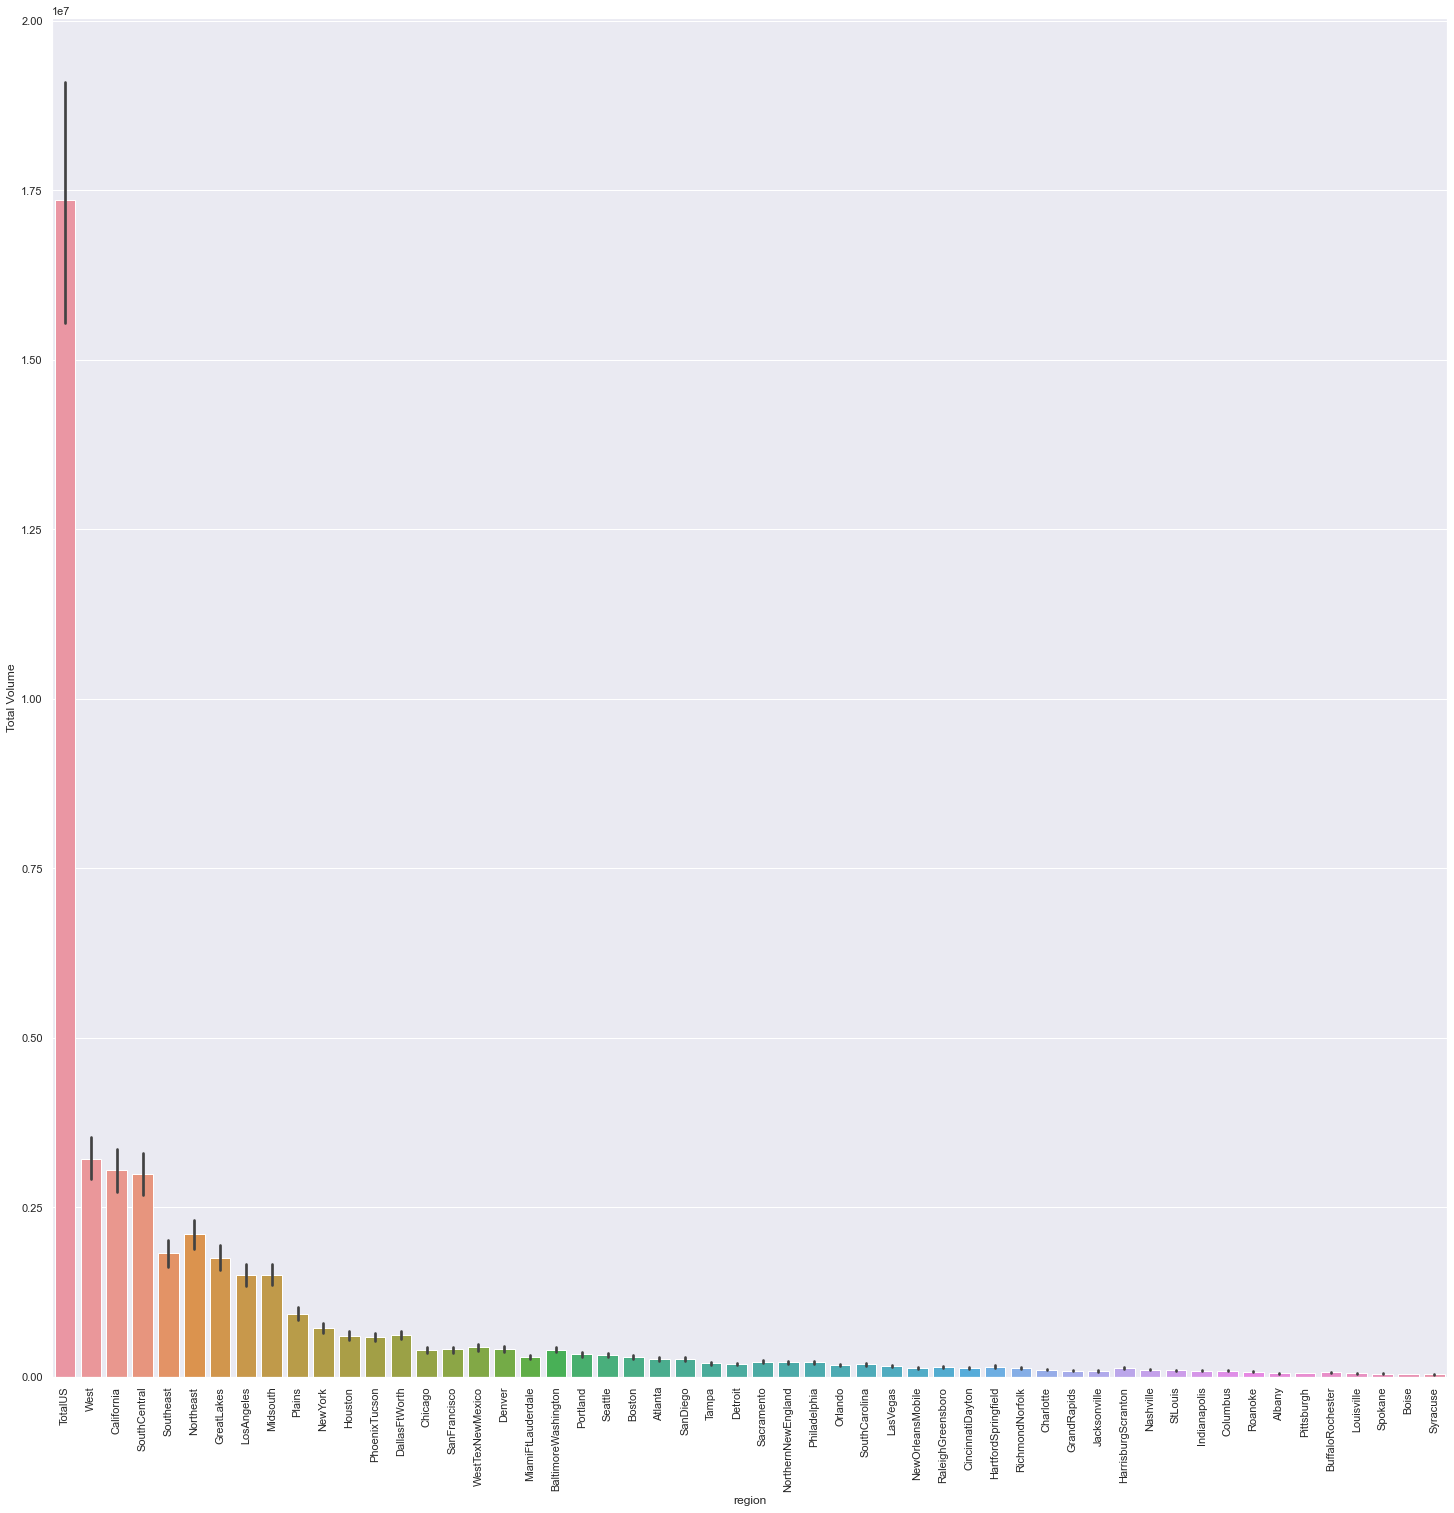

In [54]:
t=df[['Total Volume','region']]
t.sort_values(by='Total Volume',ascending=False,inplace=True)
plt.figure(figsize=(25,25))
sb.barplot(x='region',y='Total Volume',data=t)
plt.xticks(rotation=90)

place where the heighest consumption of Avocado
- west 
- california
- southcentral
- northeast
- southeast

In [55]:
o=df[['Total Bags','region']]
o.sort_values(by='Total Bags',inplace=True,ascending=False)
o=o.reset_index()
o.drop('index',axis=1,inplace=True)

here we see the all the continous feature are highly skewed,and having outliers,we wil use preprocessing techineque to make skewed free dataset

it also has lots of outliers we have to remove it, for make data baised free prediction 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'TotalUS'),
  Text(1, 0, 'West'),
  Text(2, 0, 'SouthCentral'),
  Text(3, 0, 'California'),
  Text(4, 0, 'LosAngeles'),
  Text(5, 0, 'Southeast'),
  Text(6, 0, 'Midsouth'),
  Text(7, 0, 'GreatLakes'),
  Text(8, 0, 'Northeast'),
  Text(9, 0, 'Houston'),
  Text(10, 0, 'Plains'),
  Text(11, 0, 'NewYork'),
  Text(12, 0, 'DallasFtWorth'),
  Text(13, 0, 'Denver'),
  Text(14, 0, 'Portland'),
  Text(15, 0, 'Seattle'),
  Text(16, 0, 'PhoenixTucson'),
  Text(17, 0, 'Chicago'),
  Text(18, 0, 'BaltimoreWashington'),
  Text(19, 0, 'Atlanta'),
  Text(20, 0, 'WestTexNewMexico'),
  Text(21, 0, 'CincinnatiDayton'),
  Text(22, 0, 'SanDiego'),
  Text(23, 0, 'Detroit'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'MiamiFtLauderdale'),
  Text

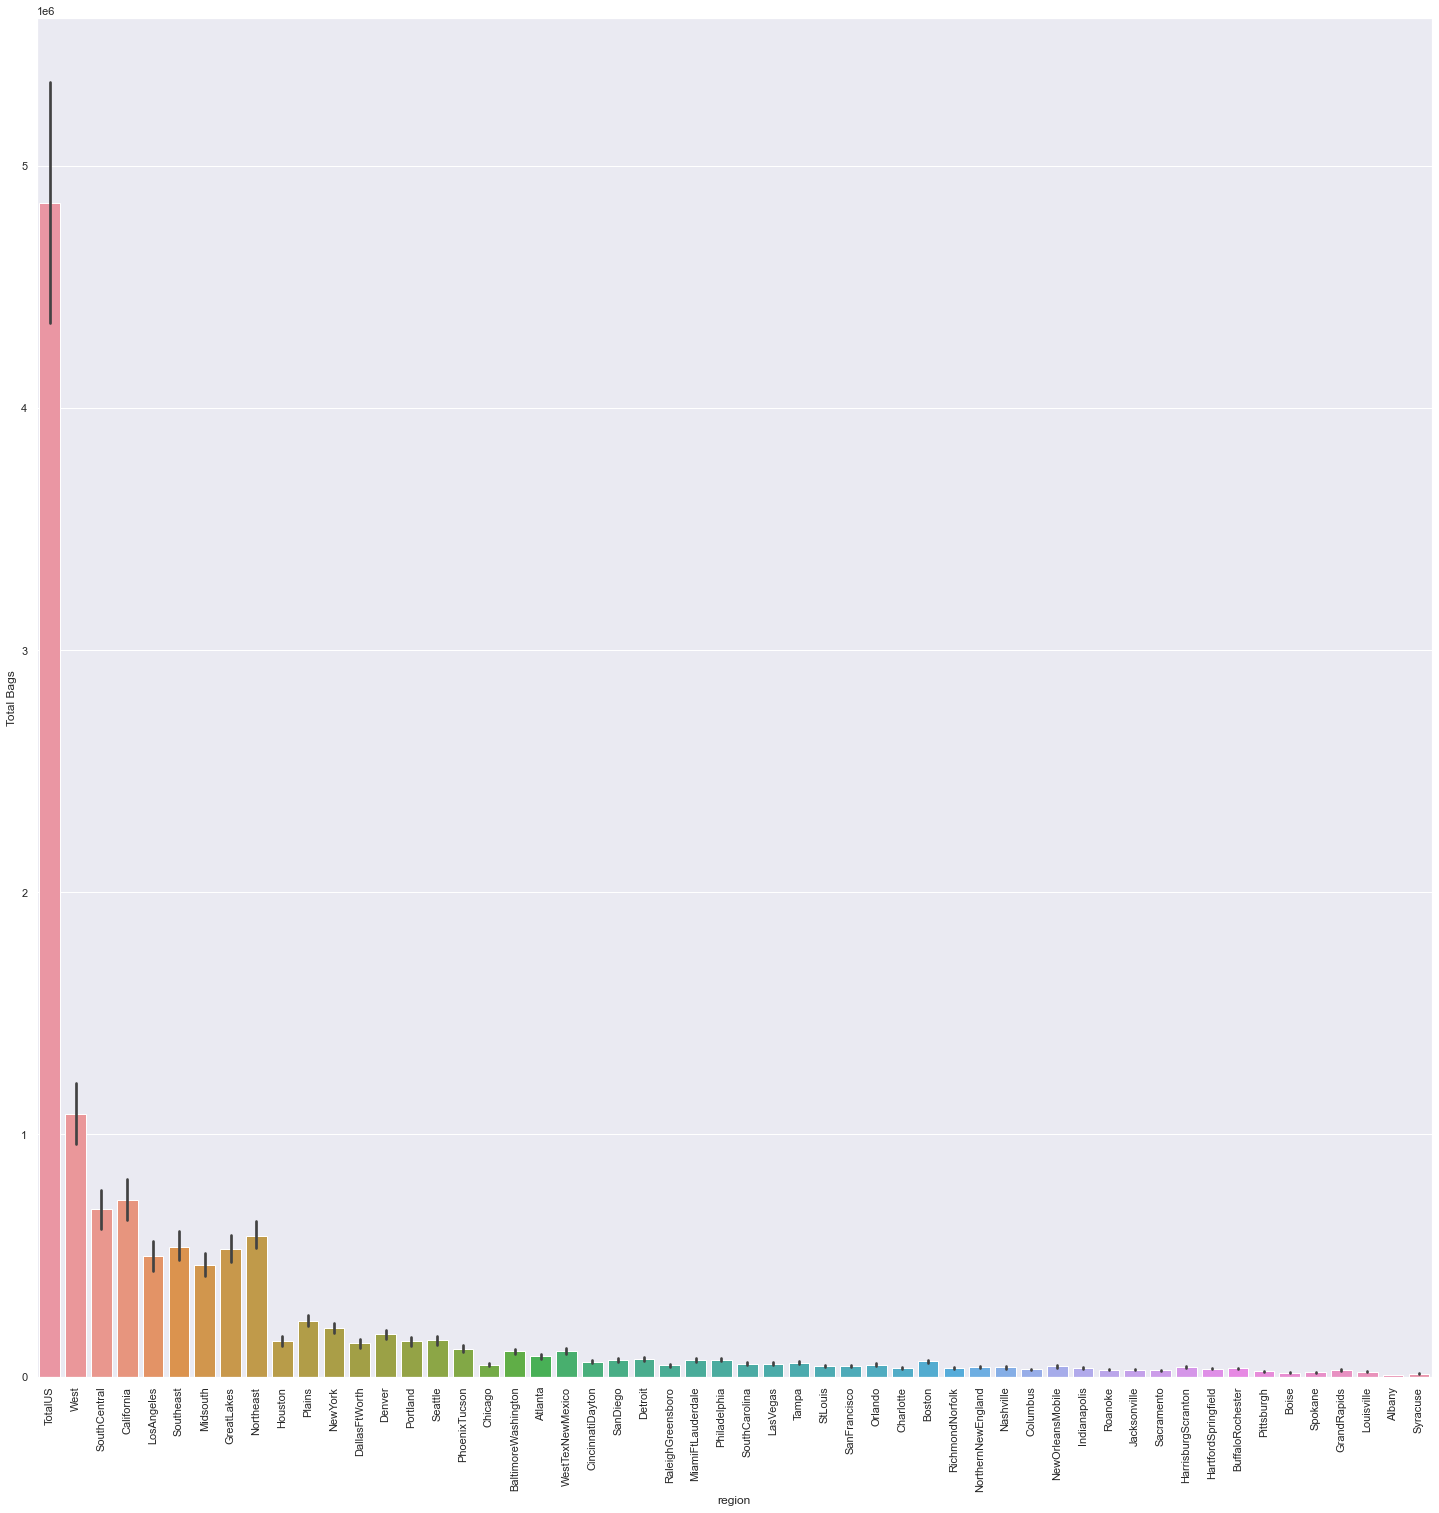

In [56]:
plt.figure(figsize=(25,25))
sb.barplot(x='region',y='Total Bags',data=o)
plt.xticks(rotation=90)

total bags from the region 
- West
- southcentral
- california
- northeast
- southeast
- greatlakers
- LosAngeles

top 7 heighest number of total bags from region 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'TotalUS'),
  Text(1, 0, 'SouthCentral'),
  Text(2, 0, 'California'),
  Text(3, 0, 'Southeast'),
  Text(4, 0, 'West'),
  Text(5, 0, 'LosAngeles'),
  Text(6, 0, 'Plains'),
  Text(7, 0, 'GreatLakes'),
  Text(8, 0, 'Midsouth'),
  Text(9, 0, 'PhoenixTucson'),
  Text(10, 0, 'Houston'),
  Text(11, 0, 'WestTexNewMexico'),
  Text(12, 0, 'DallasFtWorth'),
  Text(13, 0, 'MiamiFtLauderdale'),
  Text(14, 0, 'Northeast'),
  Text(15, 0, 'Tampa'),
  Text(16, 0, 'SanFrancisco'),
  Text(17, 0, 'Atlanta'),
  Text(18, 0, 'Orlando'),
  Text(19, 0, 'SanDiego'),
  Text(20, 0, 'NewOrleansMobile'),
  Text(21, 0, 'Chicago'),
  Text(22, 0, 'SouthCarolina'),
  Text(23, 0, 'Sacramento'),
  Text(24, 0, 'NewYork'),
  Text(25, 0, 'LasVegas'),
  Text(26, 0, '

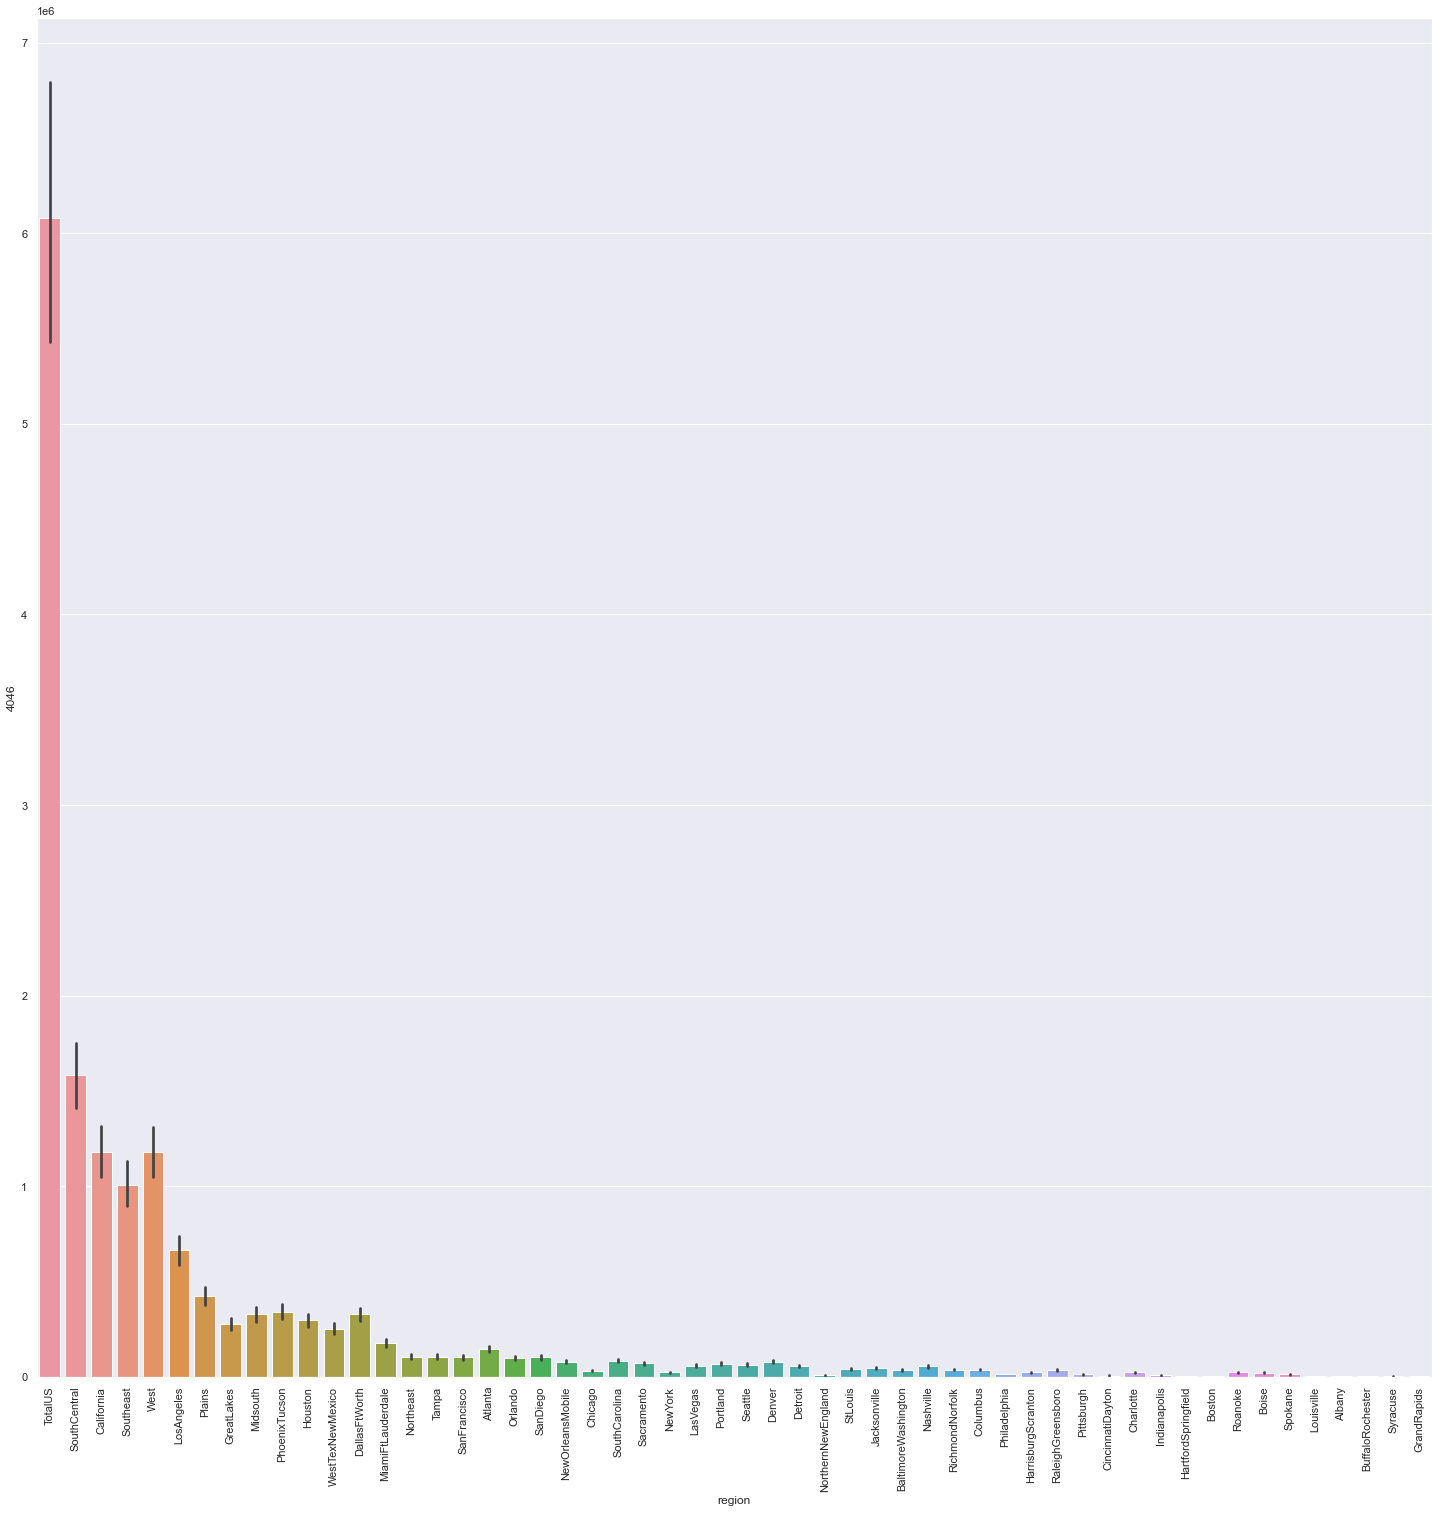

In [57]:
f=df[['4046','region']]
f.sort_values(by='4046',ascending=False,inplace=True)
plt.figure(figsize=(25,25))
sb.barplot(x='region',y='4046',data=f)
plt.xticks(rotation=90)

4046 is sale volume of small avocado 
  - SouthCentral
  - California
  - Southeast
  - West
  - LosAngeles
  - Plains
  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'TotalUS'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'California'),
  Text(3, 0, 'West'),
  Text(4, 0, 'GreatLakes'),
  Text(5, 0, 'SouthCentral'),
  Text(6, 0, 'NewYork'),
  Text(7, 0, 'Midsouth'),
  Text(8, 0, 'Southeast'),
  Text(9, 0, 'LosAngeles'),
  Text(10, 0, 'Chicago'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'SanFrancisco'),
  Text(13, 0, 'Boston'),
  Text(14, 0, 'BaltimoreWashington'),
  Text(15, 0, 'NorthernNewEngland'),
  Text(16, 0, 'Denver'),
  Text(17, 0, 'Houston'),
  Text(18, 0, 'Seattle'),
  Text(19, 0, 'Portland'),
  Text(20, 0, 'PhoenixTucson'),
  Text(21, 0, 'Sacramento'),
  Text(22, 0, 'Philadelphia'),
  Text(23, 0, 'DallasFtWorth'),
  Text(24, 0, 'HartfordSpringfield'),
  Text(25, 0, 'SanDiego'),
  Text(26

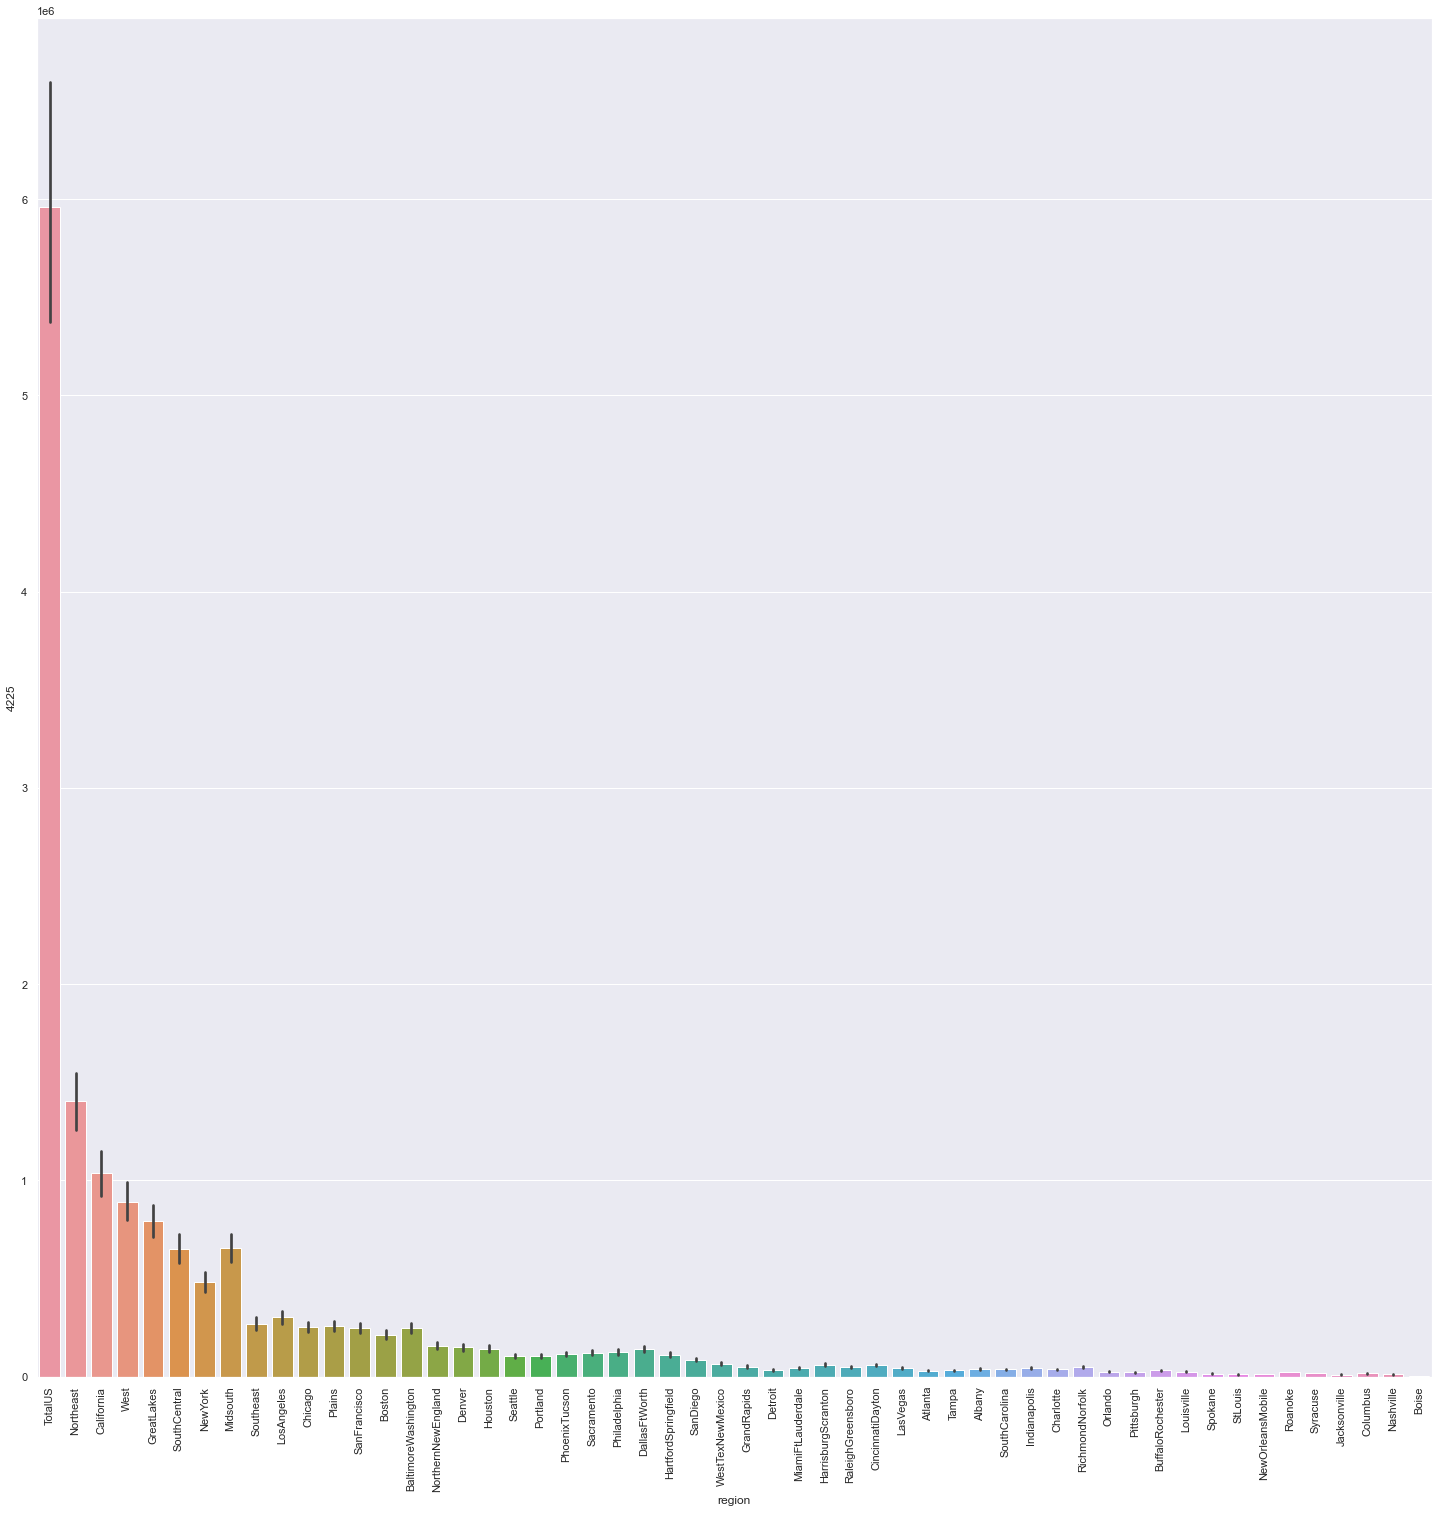

In [58]:
g=df[['4225','region']]
g.sort_values(by='4225',ascending=False,inplace=True)
plt.figure(figsize=(25,25))
sb.barplot(x='region',y='4225',data=g)
plt.xticks(rotation= 90)

sale volume of Large Avocado 
   - Northeast
   - California
   - West
   - GreatLakes
   - SouthCentral
   - Midsouth
   
 here, Northeast has the heighest sale volume 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'TotalUS'),
  Text(1, 0, 'SouthCentral'),
  Text(2, 0, 'GreatLakes'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Midsouth'),
  Text(5, 0, 'Northeast'),
  Text(6, 0, 'West'),
  Text(7, 0, 'NewYork'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Houston'),
  Text(10, 0, 'Detroit'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'GrandRapids'),
  Text(13, 0, 'LosAngeles'),
  Text(14, 0, 'Southeast'),
  Text(15, 0, 'RaleighGreensboro'),
  Text(16, 0, 'BaltimoreWashington'),
  Text(17, 0, 'Boston'),
  Text(18, 0, 'Charlotte'),
  Text(19, 0, 'SanFrancisco'),
  Text(20, 0, 'WestTexNewMexico'),
  Text(21, 0, 'NorthernNewEngland'),
  Text(22, 0, 'Denver'),
  Text(23, 0, 'Philadelphia'),
  Text(24, 0, 'PhoenixTucson'),
  Text(25, 0, 'Plains'),
 

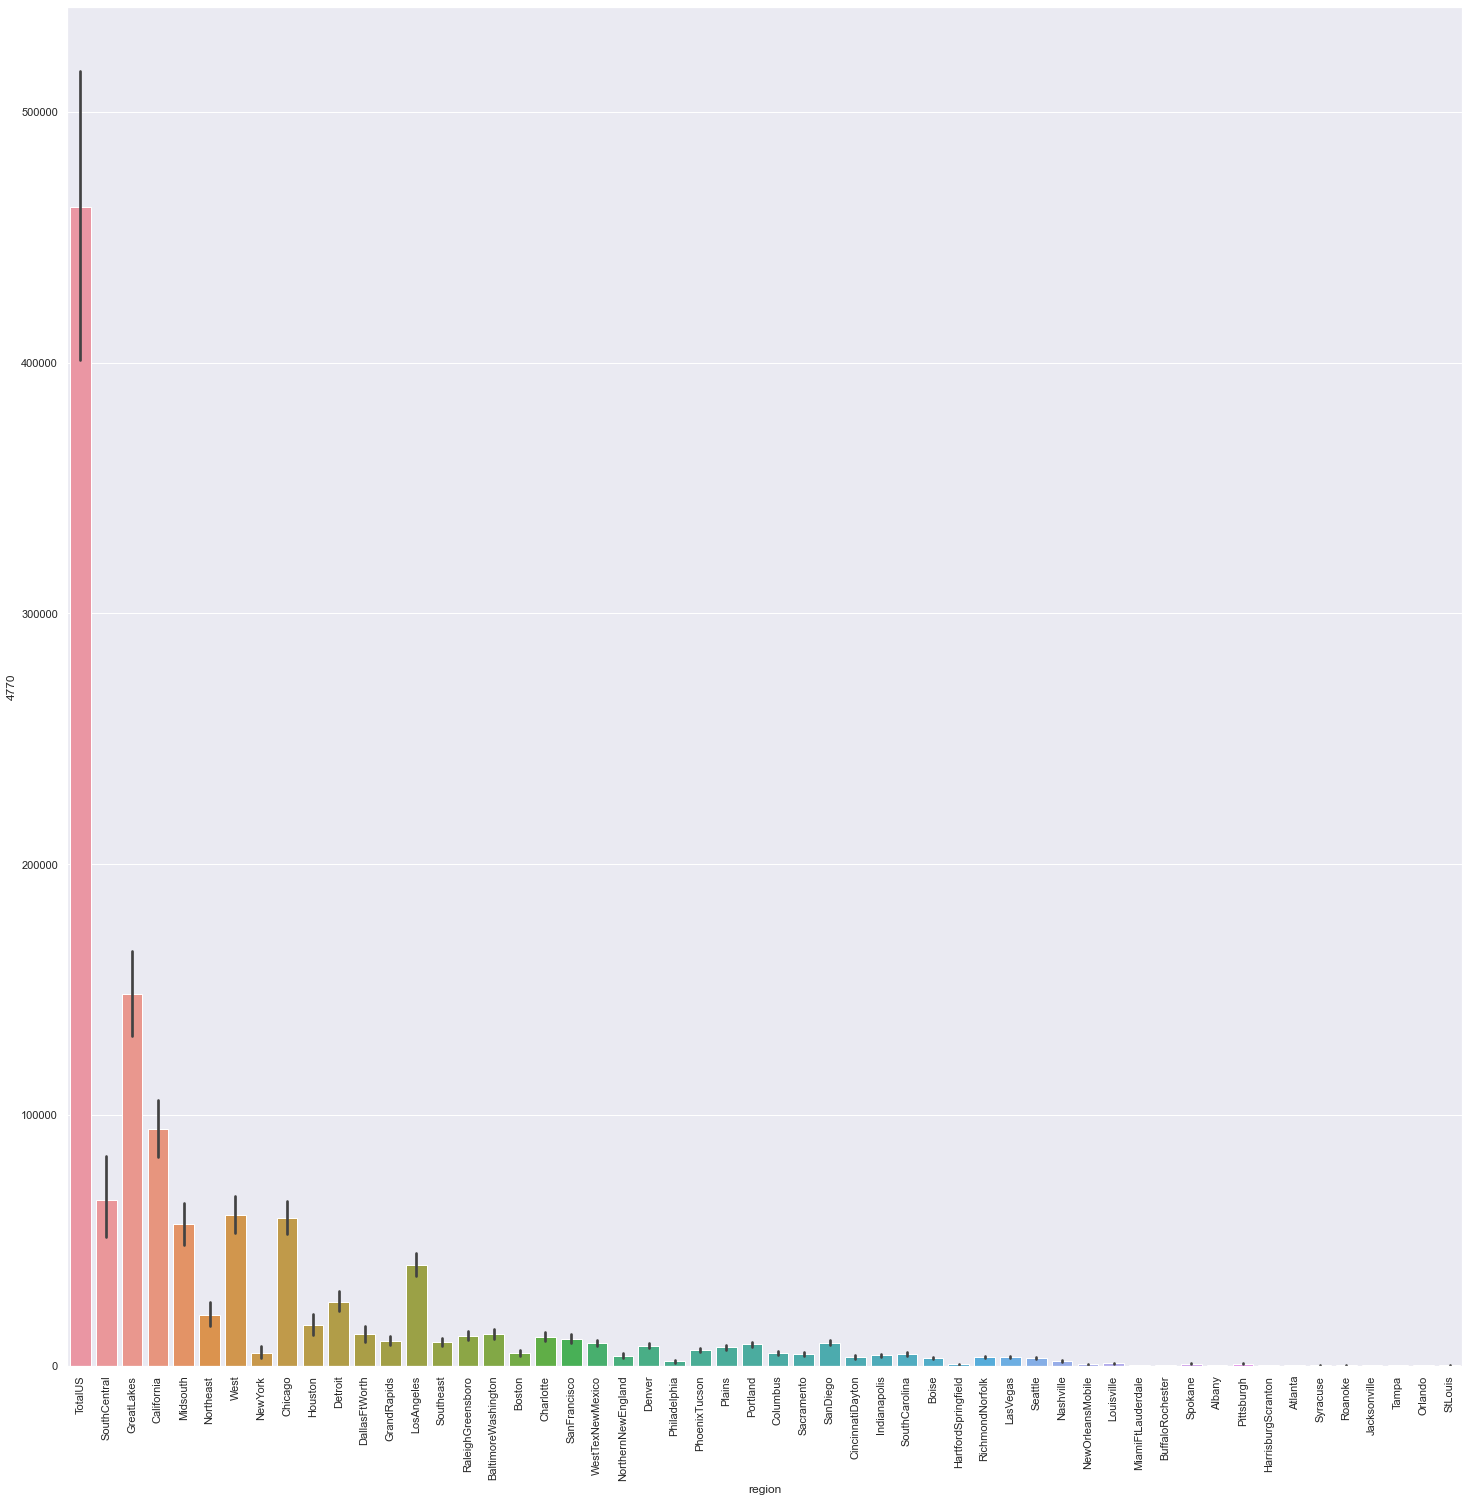

In [59]:
g=df[['4770','region']]
g.sort_values(by='4770',ascending=False,inplace=True)
plt.figure(figsize=(25,25))
sb.barplot(x='region',y='4770',data=g)
plt.xticks(rotation= 90)   

sale volume of ExtraLarge Avocado
  - SouthCentral
  - GreatLakes
  - California
  - Midsouth
  - West
  - Chicago
  - LosAngeles
  
Greatlakes has highest sale volume of Xlarge among all the region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

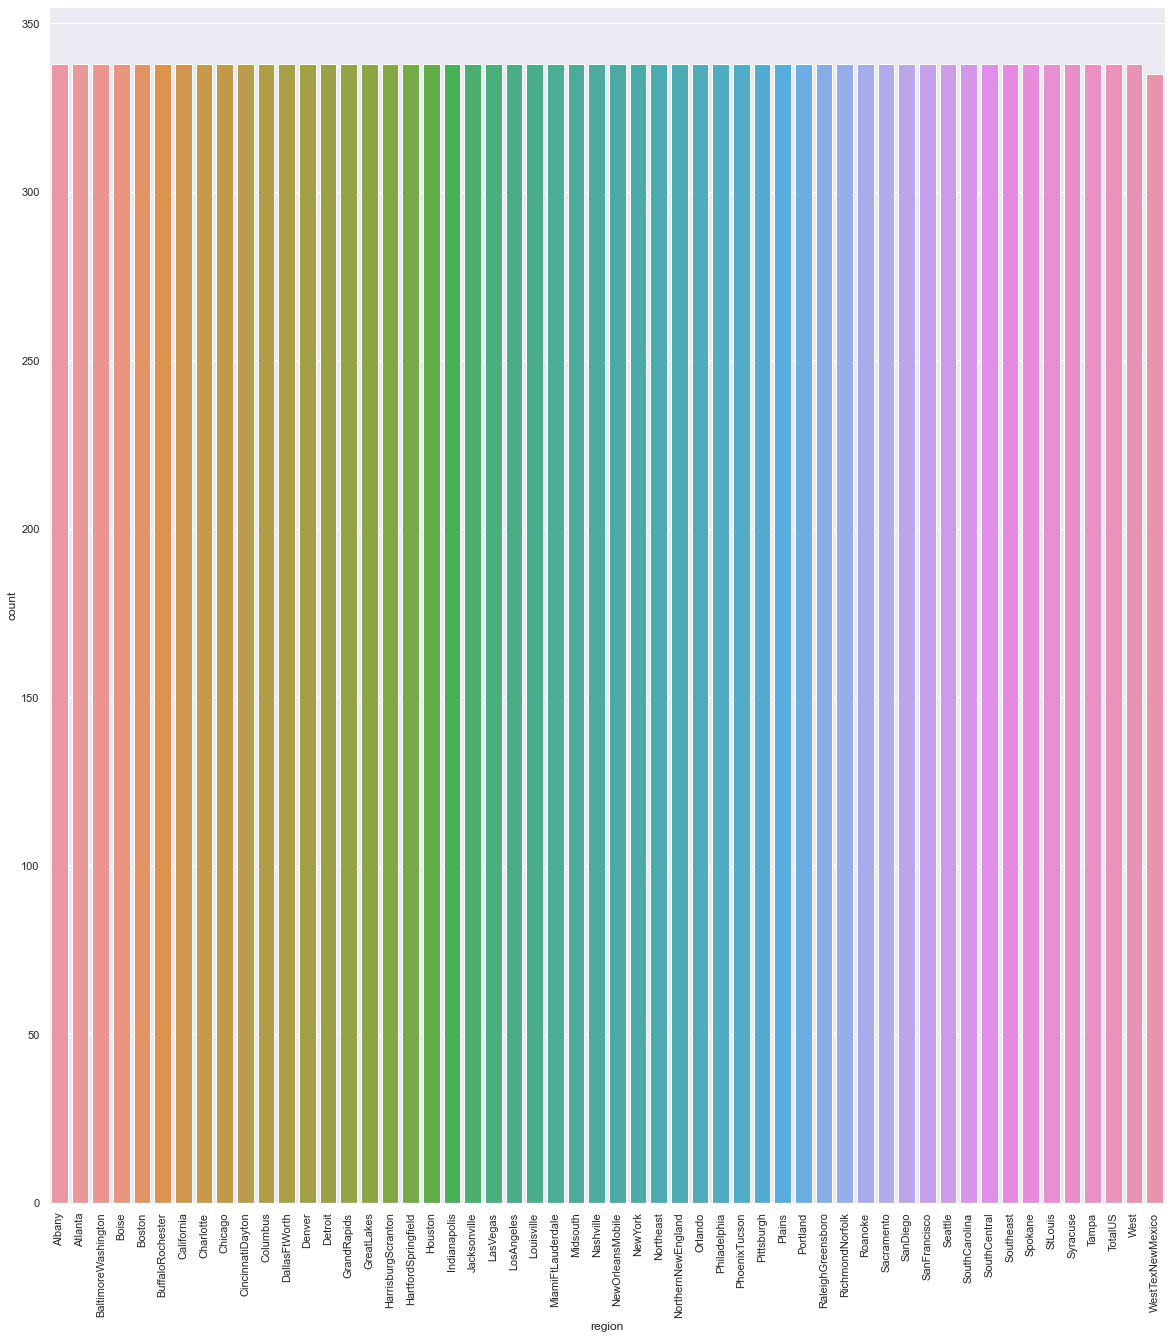

In [60]:
plt.figure(figsize=(20,22))
sb.countplot(df['region'])
plt.xticks(rotation=90)

### Extracting the index of region where shows the TOTAL-US,it may create biased prediction,so droping the rows 


In [134]:

index=np.where(df['region']=='TotalUS')
print(len(index[0]))

df.drop(index=index[0],inplace=True)

df.reset_index()
len(df['region'].unique())   # there are 53 rows so i will drop these rows 

338


53

# checking normal distribution plot 

In [135]:
df.head(3)

df.columns
ddf=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

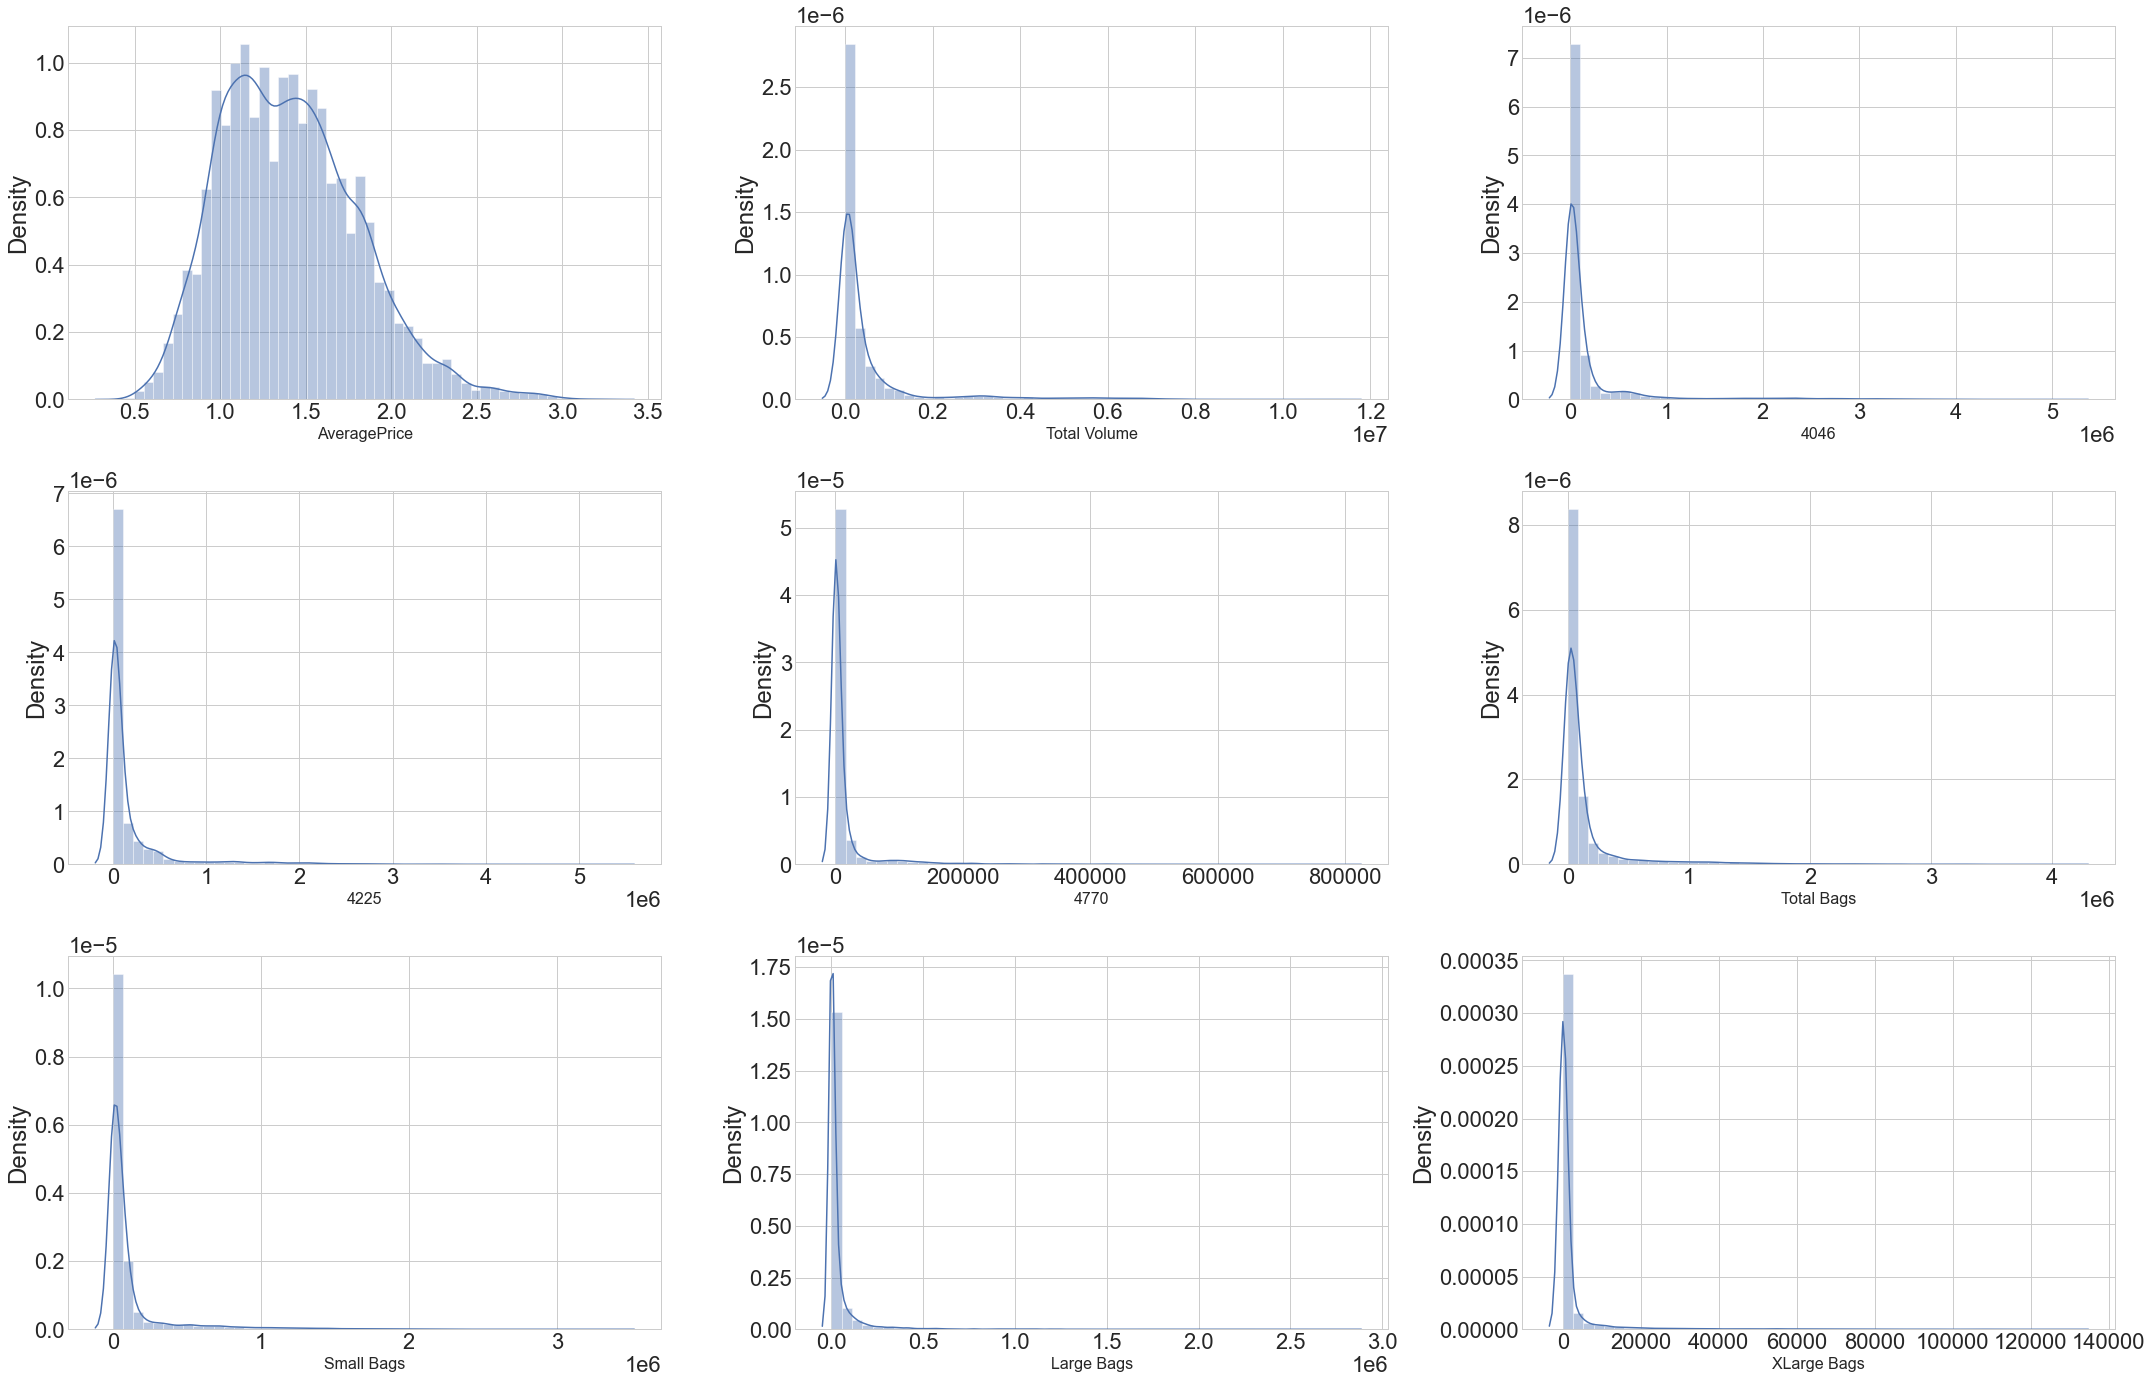

In [136]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(30,32))
num=1

for columns in ddf:
    
    if num<=15:
        ax=plt.subplot(5,3,num)
        sb.distplot(ddf[columns])
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

 - Average price here is in between 0.5 to 3.4
 - Total volume is highly positively skewed
 - and all the other continous columns are highly positively skewed
 
we have to bring data into normal distribution for better prediction once model is created . 
continous feature are  highly skewed,we wil use preprocessing techineque to make skewed free dataset,
it also has lots of outliers we have to remove it, for make data baised free prediction 



# Feature engineering

In [137]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [138]:
df['type']=le.fit_transform(df['type'])

In [139]:
df['type'].unique() # converting string into numeric

array([0, 1])

In [140]:
df['region']=le.fit_transform(df['region'])

In [141]:
df['region'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

- earlier in info we see Date is Object type data so we convert it into date type

In [142]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [143]:
df.head(4)


Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0   48.16     8696.87     8603.62       93.25          0.0     0  2015   
1   58.33     9505.56     9408.07       97.49          0.0     0  2015   
2  130.50     8145.35     8042.21      103.14          0.0     0  2015   
3   72.58     5811.16     5677.40      133.76          0.0     0  2015   

   region  Month  Day  
0       0     12   27  
1       0     12   20  
2       0     12   13  
3       0     12    6

droping the date columns,we have the seprate vale of day, month and year

In [144]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  Month  \
0     8696.87     8603.62       93.25          0.0     0  2015       0     12   
1     9505.56     9408.07       97.49          0.0     0  2015       0     12   
2     8145.35     8042.21      103.14          0.0     0  2015       0     12   
3     5811.16     5677.40      133.76          0.0     0  2015       0     12   
4     6183.95     5986.26      197.69          0.0     0  2015       0     11   

   Day  
0   27  
1   20  
2   13  
3    6  
4   29

In [145]:
df.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0 2015-12-27          1.33      64236.62  1036.74  54454.85  48.16   
1 2015-12-20          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  Month  \
0     8696.87     8603.62       93.25          0.0     0  2015       0     12   
1     9505.56     9408.07       97.49          0.0     0  2015       0     12   

   Day  
0   27  
1   20

In [146]:
df.info() # as we see there are no object data type all are numeric 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          17911 non-null  datetime64[ns]
 1   AveragePrice  17911 non-null  float64       
 2   Total Volume  17911 non-null  float64       
 3   4046          17911 non-null  float64       
 4   4225          17911 non-null  float64       
 5   4770          17911 non-null  float64       
 6   Total Bags    17911 non-null  float64       
 7   Small Bags    17911 non-null  float64       
 8   Large Bags    17911 non-null  float64       
 9   XLarge Bags   17911 non-null  float64       
 10  type          17911 non-null  int32         
 11  year          17911 non-null  int64         
 12  region        17911 non-null  int32         
 13  Month         17911 non-null  int64         
 14  Day           17911 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

# correlation 

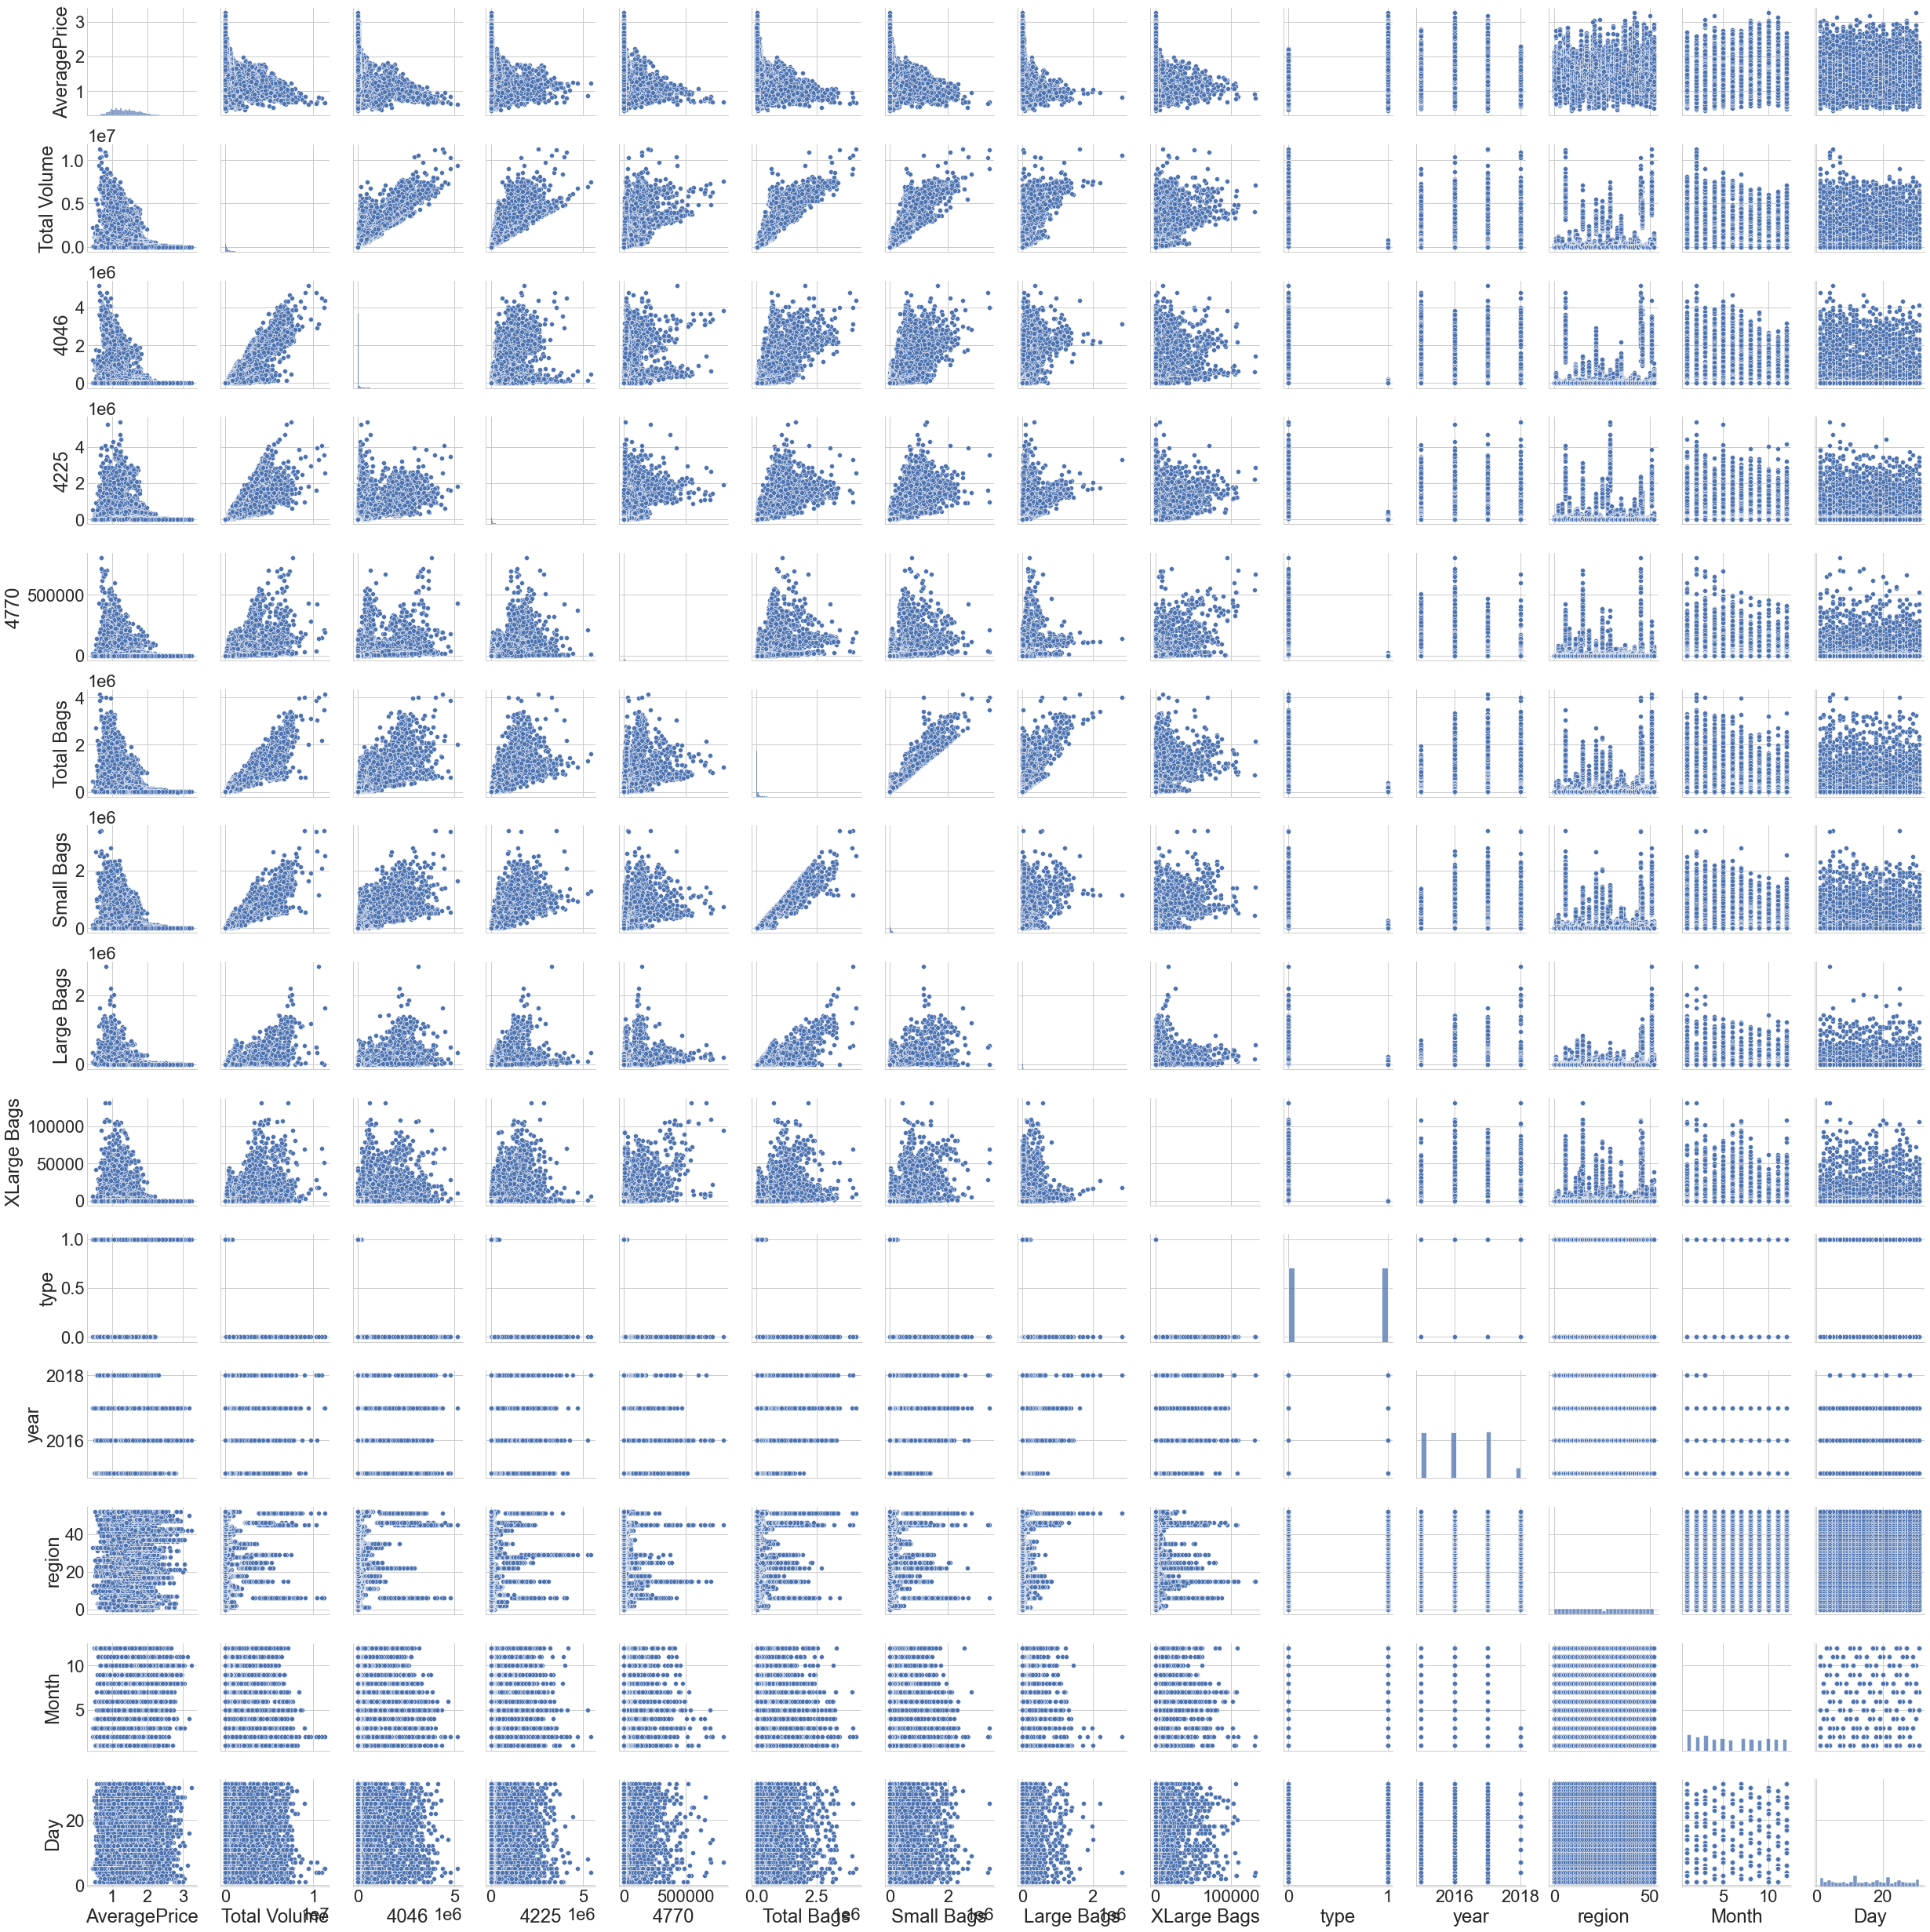

In [147]:
sb.pairplot(data=df)

In [148]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.343982 -0.342105 -0.267643 -0.241213   
Total Volume     -0.343982      1.000000  0.895002  0.872547  0.649072   
4046             -0.342105      0.895002  1.000000  0.603442  0.509280   
4225             -0.267643      0.872547  0.603442  1.000000  0.623368   
4770             -0.241213      0.649072  0.509280  0.623368  1.000000   
Total Bags       -0.307685      0.924980  0.776373  0.754345  0.553417   
Small Bags       -0.296151      0.920763  0.761604  0.782892  0.566304   
Large Bags       -0.248909      0.668446  0.589649  0.466107  0.343136   
XLarge Bags      -0.154424      0.538396  0.436249  0.449903  0.587963   
type              0.614423     -0.415521 -0.347762 -0.394513 -0.294567   
year              0.091897      0.030621  0.004244 -0.015449 -0.050252   
region           -0.004634      0.092262  0.141048  0.015229 -0.060502   
Month             0.161463     -0.043859 -0.039269 -0.037382 -0.046055   
Day               0.026849     -0.017446 -0.015711 -0.021030 -0.012440   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.307685   -0.296151   -0.248909    -0.154424  0.614423   
Total Volume    0.924980    0.920763    0.668446     0.538396 -0.415521   
4046            0.776373    0.761604    0.589649     0.436249 -0.347762   
4225            0.754345    0.782892    0.466107     0.449903 -0.394513   
4770            0.553417    0.566304    0.343136     0.587963 -0.294567   
Total Bags      1.000000    0.969591    0.787834     0.555153 -0.375506   
Small Bags      0.969591    1.000000    0.613817     0.587470 -0.376678   
Large Bags      0.787834    0.613817    1.000000     0.267308 -0.262755   
XLarge Bags     0.555153    0.587470    0.267308     1.000000 -0.240167   
type           -0.375506   -0.376678   -0.262755    -0.240167  1.000000   
year            0.122705    0.108639    0.118942     0.110051 -0.000033   
region          0.099768    0.069064    0.153326    -0.042491 -0.000285   
Month          -0.039293   -0.039521   -0.027787    -0.017466 -0.000086   
Day            -0.008652   -0.006622   -0.011518     0.000477 -0.000013   

                  year    region     Month       Day  
AveragePrice  0.091897 -0.004634  0.161463  0.026849  
Total Volume  0.030621  0.092262 -0.043859 -0.017446  
4046          0.004244  0.141048 -0.039269 -0.015711  
4225         -0.015449  0.015229 -0.037382 -0.021030  
4770         -0.050252 -0.060502 -0.046055 -0.012440  
Total Bags    0.122705  0.099768 -0.039293 -0.008652  
Small Bags    0.108639  0.069064 -0.039521 -0.006622  
Large Bags    0.118942  0.153326 -0.027787 -0.011518  
XLarge Bags   0.110051 -0.042491 -0.017466  0.000477  
type         -0.000033 -0.000285 -0.000086 -0.000013  
year          1.000000 -0.000056 -0.177048  0.004472  
region       -0.000056  1.000000 -0.000147 -0.000022  
Month        -0.177048 -0.000147  1.000000  0.010623  
Day           0.004472 -0.000022  0.010623  1.000000

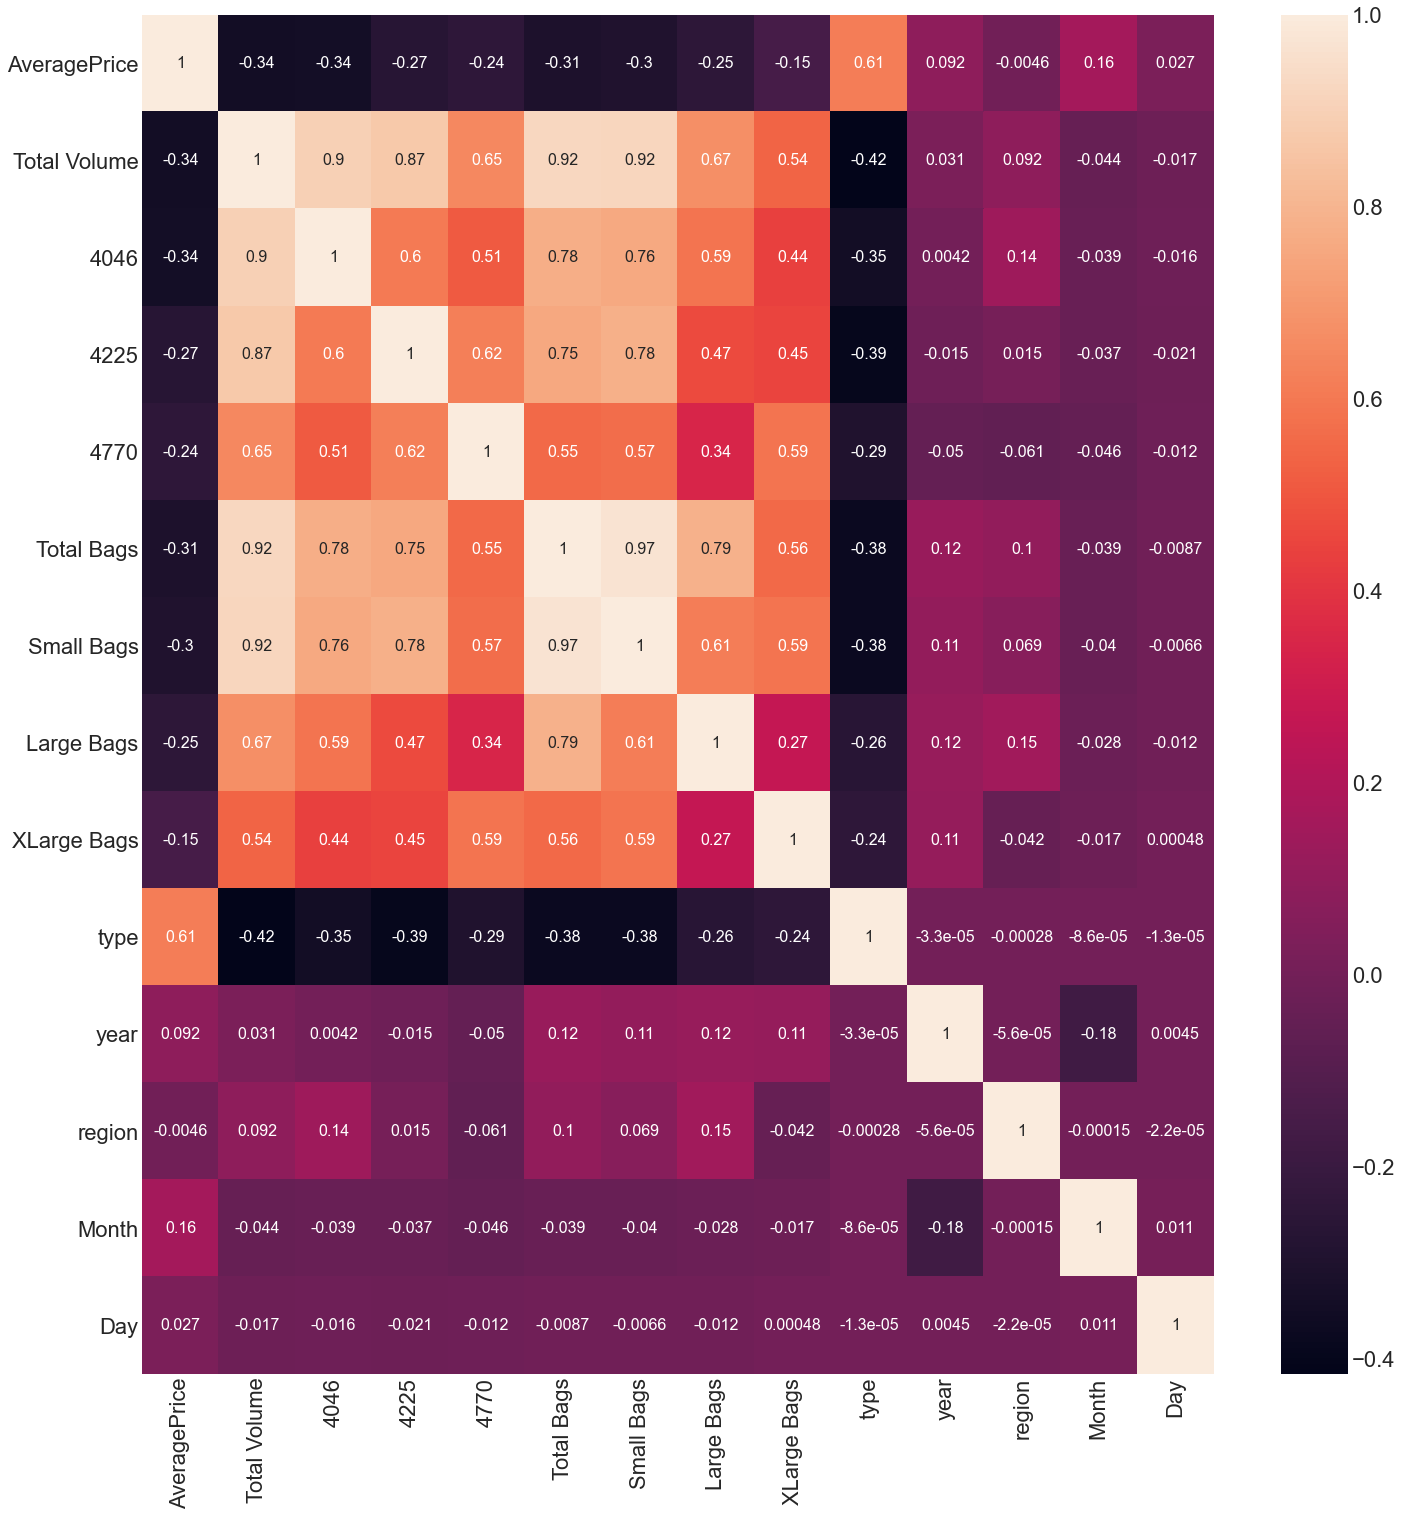

In [149]:
# for better representation we use heatmap
plt.figure(figsize=(24,25))
sb.heatmap(df.corr(),annot=True,annot_kws={'fontsize':16})
sb.set(font_scale=2)

In [150]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

# checking vif

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day']]

In [152]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

         feature           VIF
0   AveragePrice  2.300138e+01
1   Total Volume  1.421088e+09
2           4046  2.374989e+08
3           4225  1.903359e+08
4           4770  2.060317e+06
5     Total Bags  3.882413e+13
6     Small Bags  2.268816e+13
7     Large Bags  3.529467e+12
8    XLarge Bags  1.764920e+10
9           type  3.623775e+00
10          year  2.382449e+01
11        region  4.130240e+00
12         Month  4.240821e+00
13           Day  4.194098e+00


Here we see the values is not more than 5 so,there is no  multicollinearity problem in dataset

# Removing the skewness  

In [153]:
from sklearn.preprocessing import power_transform

In [154]:
df.skew().sort_values(ascending=False)  # checking the skewness

Large Bags      7.916074
XLarge Bags     6.952878
4770            6.259901
Total Bags      4.497227
4046            4.423296
Small Bags      4.284061
4225            4.127037
Total Volume    3.608709
AveragePrice    0.577132
year            0.215342
Month           0.106618
Day             0.014311
type            0.000335
region          0.000031
dtype: float64

In [155]:
df1=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']]

In [156]:
ddf=power_transform(df1)

In [157]:
ddf=pd.DataFrame(ddf,columns=df1.columns)
ddf.skew().sort_values(ascending=False)

XLarge Bags     0.811114
4770            0.032884
AveragePrice    0.005471
Total Volume    0.001178
Total Bags     -0.013787
Small Bags     -0.016498
4046           -0.033695
4225           -0.038290
Large Bags     -0.094806
dtype: float64

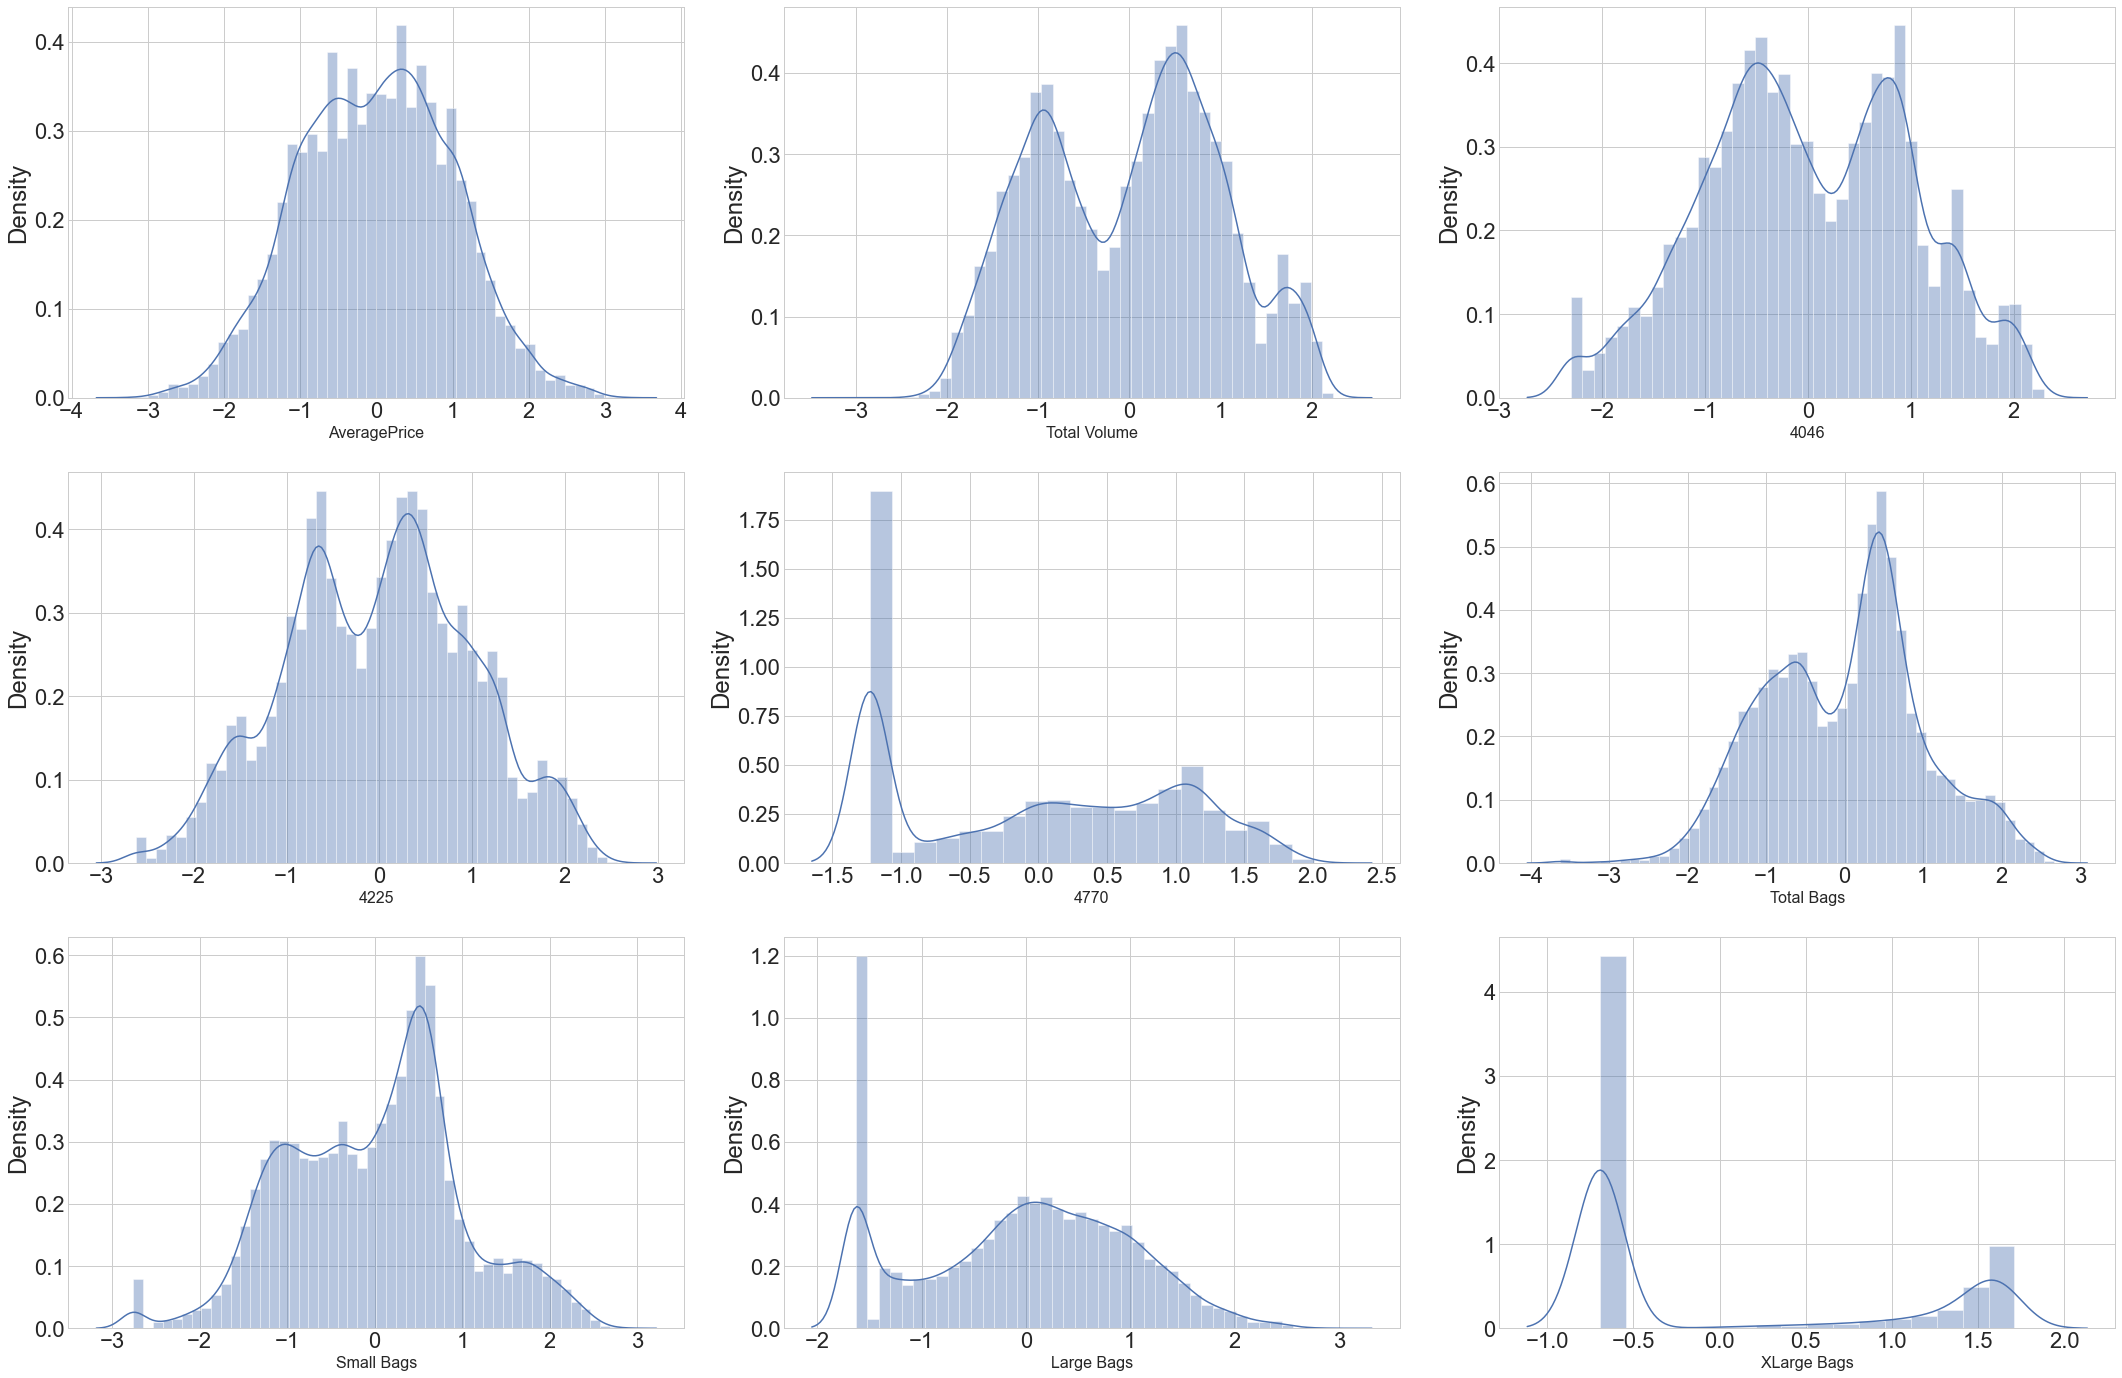

In [158]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(30,32))
num=1

for columns in ddf:
    
    if num<=15:
        ax=plt.subplot(5,3,num)
        sb.distplot(ddf[columns])
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

now we see that continous feature is showing the normal distribution 

# checking outliers 

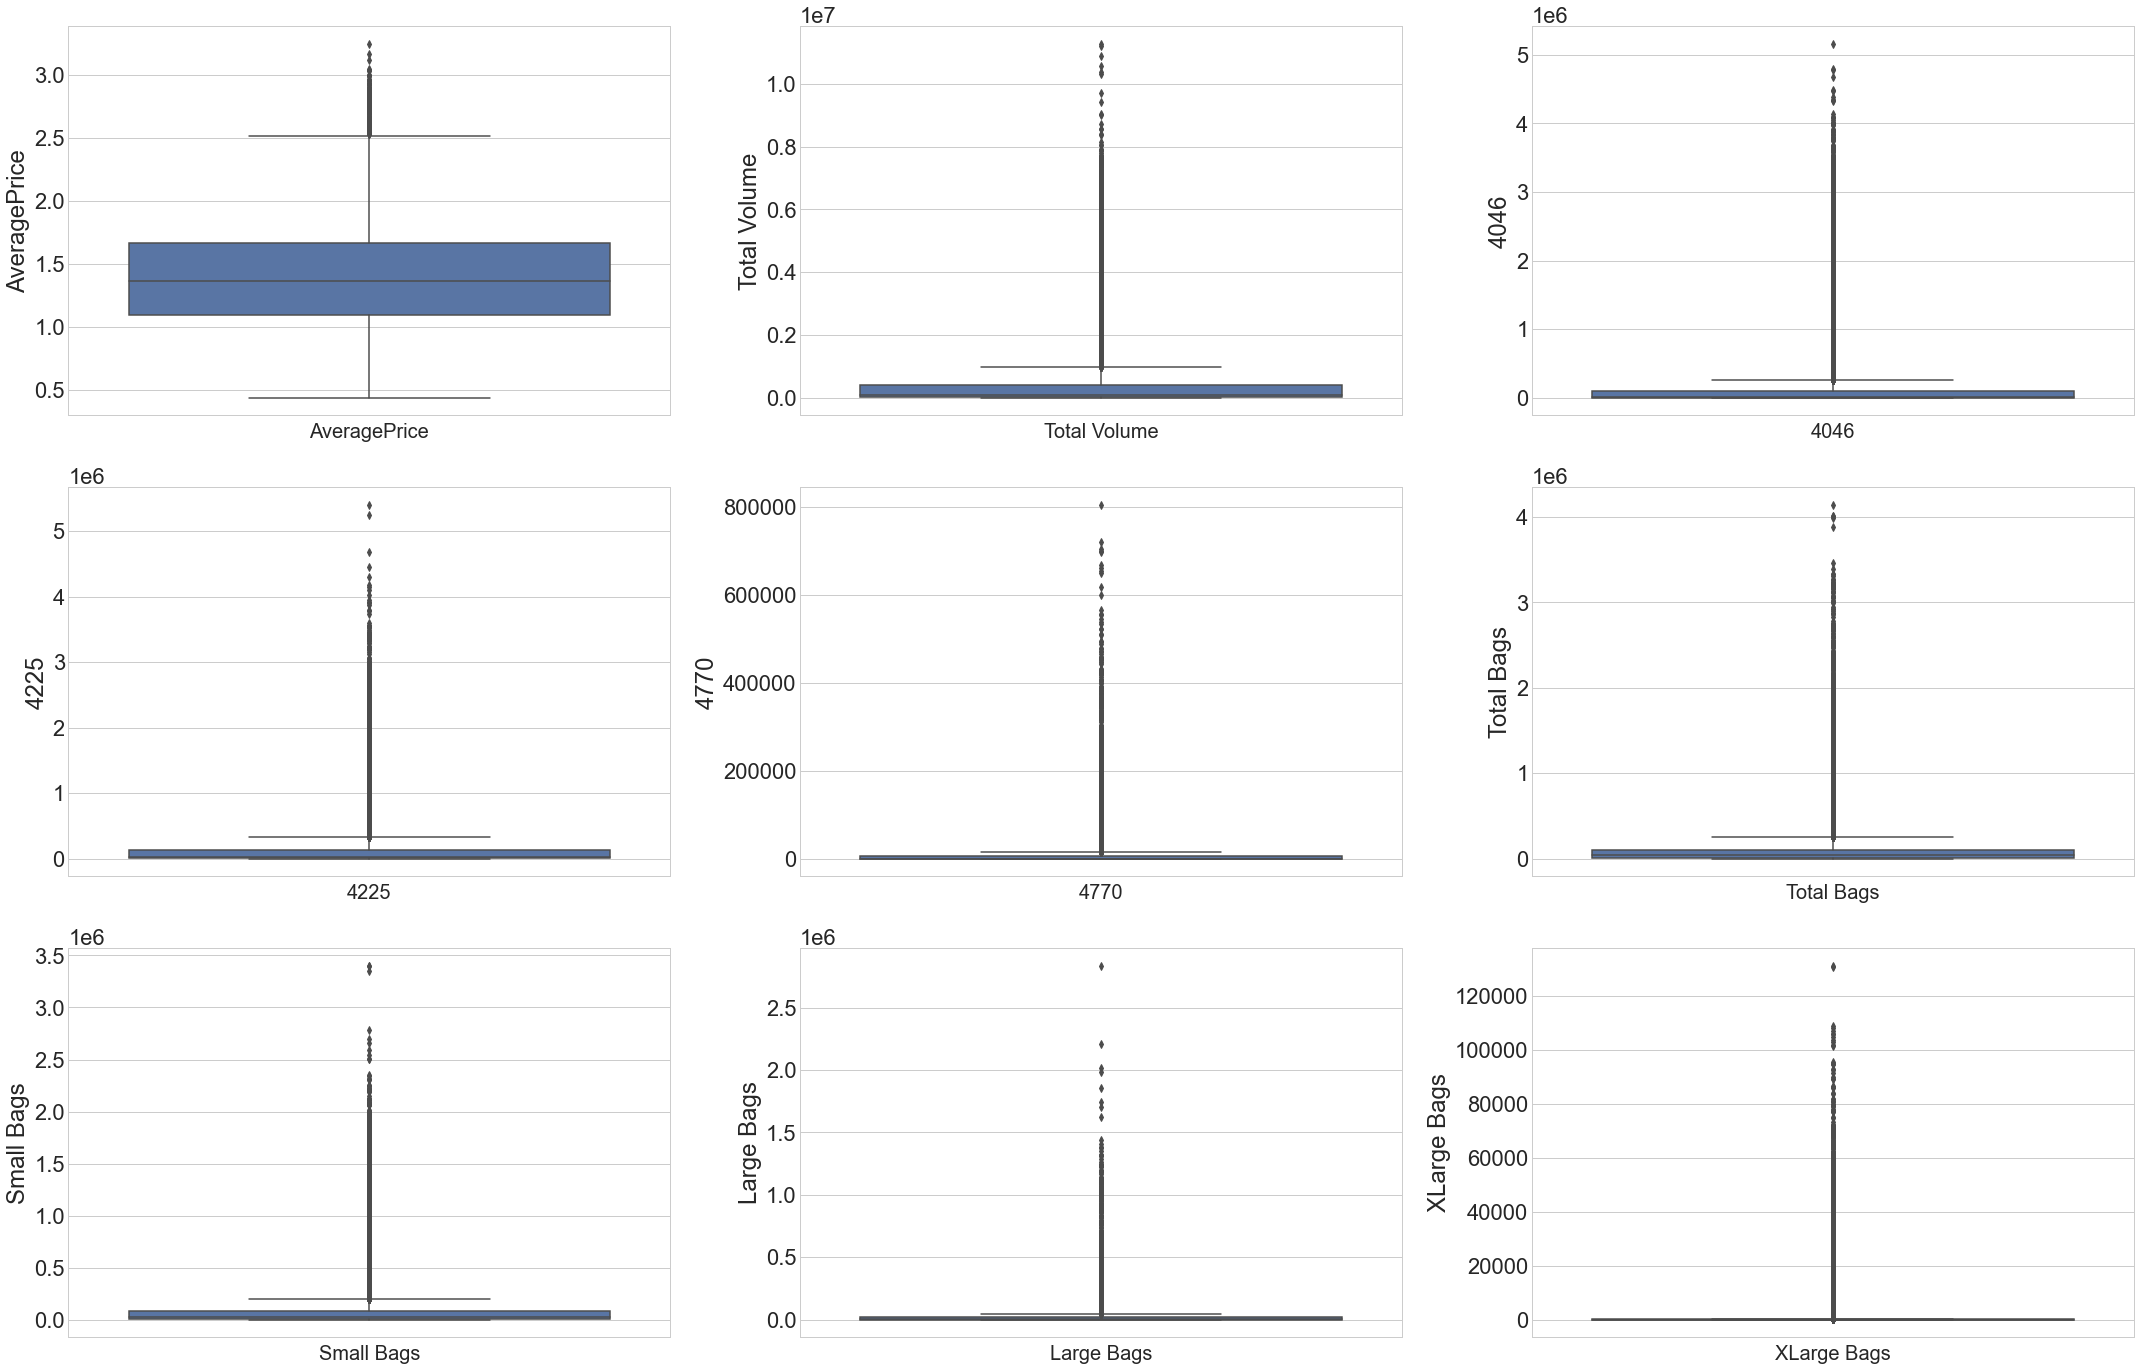

In [159]:
plt.figure(figsize=(30,32))

num=1

for columns in ddf:
    
    if num<=15:
        ax=plt.subplot(5,3,num)
        sb.boxplot(y=df[columns])
        plt.xlabel(columns,fontsize=20)
        
    num+=1
plt.tight_layout()

here i am using the old data set without using power transformation, just for see the how data is changed and problem of ooutliers and skewness is almost resolved

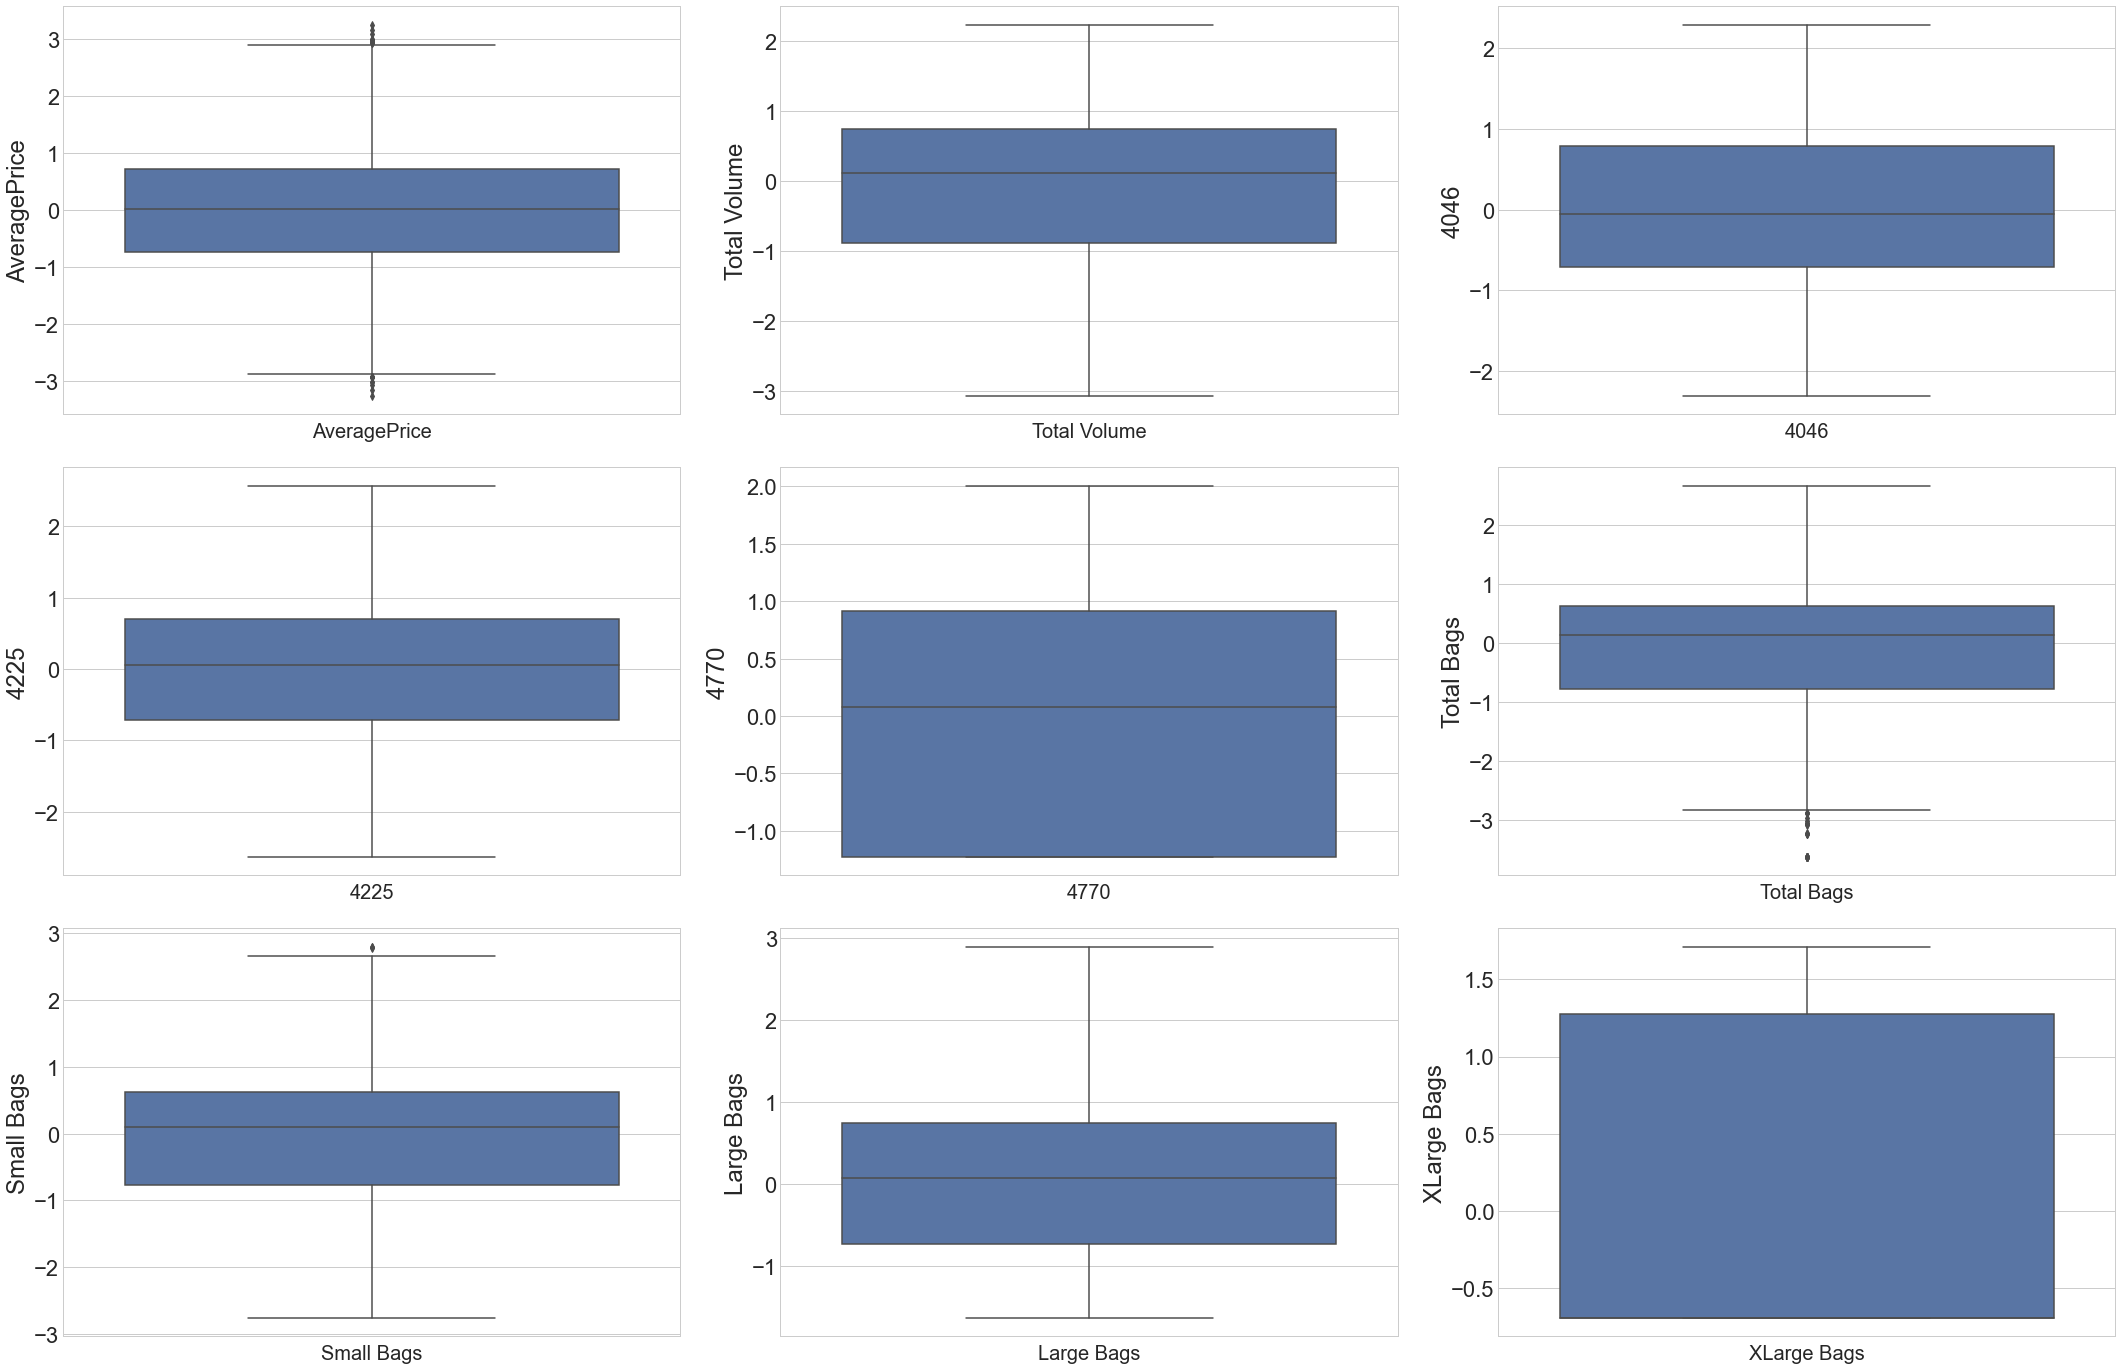

In [160]:
plt.figure(figsize=(30,32))

num=1

for columns in ddf:
    
    if num<=15:
        ax=plt.subplot(5,3,num)
        sb.boxplot(y=ddf[columns])
        plt.xlabel(columns,fontsize=20)
        
    num+=1
plt.tight_layout()

now, the above dataset is with using the power transformation, here we comapred earlier the data has lots of outliers but now here the outliers are almost eliminated 


In [90]:
# concating the data frame 

In [163]:
ddf.head()
df.reset_index()

index       Date  AveragePrice  Total Volume     4046       4225  \
0          0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1          1 2015-12-20          1.35      54876.98   674.28   44638.81   
2          2 2015-12-13          0.93     118220.22   794.70  109149.67   
3          3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4          4 2015-11-29          1.28      51039.60   941.48   43838.39   
...      ...        ...           ...           ...      ...        ...   
17906  18244 2018-02-04          1.63      17074.83  2046.96    1529.20   
17907  18245 2018-01-28          1.71      13888.04  1191.70    3431.50   
17908  18246 2018-01-21          1.87      13766.76  1191.92    2452.79   
17909  18247 2018-01-14          1.93      16205.22  1527.63    2981.04   
17910  18248 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0       48.16     8696.87     8603.62       93.25          0.0     0  2015   
1       58.33     9505.56     9408.07       97.49          0.0     0  2015   
2      130.50     8145.35     8042.21      103.14          0.0     0  2015   
3       72.58     5811.16     5677.40      133.76          0.0     0  2015   
4       75.78     6183.95     5986.26      197.69          0.0     0  2015   
...       ...         ...         ...         ...          ...   ...   ...   
17906    0.00    13498.67    13066.82      431.85          0.0     1  2018   
17907    0.00     9264.84     8940.04      324.80          0.0     1  2018   
17908  727.94     9394.11     9351.80       42.31          0.0     1  2018   
17909  727.01    10969.54    10919.54       50.00          0.0     1  2018   
17910  224.53    12014.15    11988.14       26.01          0.0     1  2018   

       region  Month  Day  
0           0     12   27  
1           0     12   20  
2           0     12   13  
3           0     12    6  
4           0     11   29  
...       ...    ...  ...  
17906      52      2    4  
17907      52      1   28  
17908      52      1   21  
17909      52      1   14  
17910      52      1    7  

[17911 rows x 16 columns]

In [185]:
df.head()
df.shape

(17911, 14)

In [186]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [200]:
ddf.columns=['AveragePrice1','Total Volume1','4046_1','4225_1','4770_1','Total Bags1','Small Bags1','Large Bags1','XLarge Bags1']
ddf

AveragePrice1  Total Volume1    4046_1    4225_1    4770_1  \
0          -0.090088      -0.072969 -0.651774  0.336843 -0.223714   
1          -0.038045      -0.143735 -0.770802  0.257306 -0.176921   
2          -1.272545       0.200961 -0.725634  0.624970  0.019488   
3          -0.794388       0.019922 -0.627142  0.450567 -0.123537   
4          -0.222795      -0.176317 -0.678661  0.250127 -0.113002   
...              ...            ...       ...       ...       ...   
17906       0.634707      -0.668947 -0.458377 -0.920728 -1.227485   
17907       0.809878      -0.761983 -0.612691 -0.666080 -1.227485   
17908       1.140725      -0.765934 -0.612639 -0.773826  0.433200   
17909       1.258626      -0.692485 -0.542356 -0.711582  0.432896   
17910       0.612320      -0.658140 -0.357376 -0.786539  0.151107   

       Total Bags1  Small Bags1  Large Bags1  XLarge Bags1  
0        -0.524668    -0.339224    -0.771172     -0.693156  
1        -0.485925    -0.303932    -0.761195     -0.693156  
2        -0.553094    -0.365675    -0.748495     -0.693156  
3        -0.697970    -0.499588    -0.689052     -0.693156  
4        -0.671497    -0.479492    -0.597116     -0.693156  
...            ...          ...          ...           ...  
17906    -0.331226    -0.171707    -0.403688     -0.693156  
17907    -0.497121    -0.324115    -0.475697     -0.693156  
17908    -0.491075    -0.306310    -0.941675     -0.693156  
17909    -0.423103    -0.244460    -0.906731     -0.693156  
17910    -0.382951    -0.206773    -1.040039     -0.693156  

[17911 rows x 9 columns]

In [205]:
df.reset_index(inplace=True)

In [435]:
new_df=pd.concat([df,ddf],axis=1)
new_df

index  type  year  region  Month  Day  AveragePrice1  Total Volume1  \
0          0     0  2015       0     12   27      -0.090088      -0.072969   
1          1     0  2015       0     12   20      -0.038045      -0.143735   
2          2     0  2015       0     12   13      -1.272545       0.200961   
3          3     0  2015       0     12    6      -0.794388       0.019922   
4          4     0  2015       0     11   29      -0.222795      -0.176317   
...      ...   ...   ...     ...    ...  ...            ...            ...   
17906  18244     1  2018      52      2    4       0.634707      -0.668947   
17907  18245     1  2018      52      1   28       0.809878      -0.761983   
17908  18246     1  2018      52      1   21       1.140725      -0.765934   
17909  18247     1  2018      52      1   14       1.258626      -0.692485   
17910  18248     1  2018      52      1    7       0.612320      -0.658140   

         4046_1    4225_1    4770_1  Total Bags1  Small Bags1  Large Bags1  \
0     -0.651774  0.336843 -0.223714    -0.524668    -0.339224    -0.771172   
1     -0.770802  0.257306 -0.176921    -0.485925    -0.303932    -0.761195   
2     -0.725634  0.624970  0.019488    -0.553094    -0.365675    -0.748495   
3     -0.627142  0.450567 -0.123537    -0.697970    -0.499588    -0.689052   
4     -0.678661  0.250127 -0.113002    -0.671497    -0.479492    -0.597116   
...         ...       ...       ...          ...          ...          ...   
17906 -0.458377 -0.920728 -1.227485    -0.331226    -0.171707    -0.403688   
17907 -0.612691 -0.666080 -1.227485    -0.497121    -0.324115    -0.475697   
17908 -0.612639 -0.773826  0.433200    -0.491075    -0.306310    -0.941675   
17909 -0.542356 -0.711582  0.432896    -0.423103    -0.244460    -0.906731   
17910 -0.357376 -0.786539  0.151107    -0.382951    -0.206773    -1.040039   

       XLarge Bags1  
0         -0.693156  
1         -0.693156  
2         -0.693156  
3         -0.693156  
4         -0.693156  
...             ...  
17906     -0.693156  
17907     -0.693156  
17908     -0.693156  
17909     -0.693156  
17910     -0.693156  

[17911 rows x 15 columns]

In above opreation, i am removing the skewness from selected continous columns, now i join the selected columns with other columns which are categorical.

keep the columns which are processed for further prediction

# Feature selection :-

In [210]:
from sklearn.feature_selection import SelectKBest,f_classif

before using feature selection we need to split the feature and target, as per question has two angle one the region and one for average price 
 - and here we are working on classification that is region

In [219]:
x=new_df.drop(['region','index'],axis=1)
y=new_df['region']

In [220]:
feature_selector=SelectKBest(score_func=f_classif,k=10)
fit=feature_selector.fit(x,y)

In [221]:
df_score =pd.DataFrame(fit.scores_)
df_score
df_columns=pd.DataFrame(x.columns)
feture_score=pd.concat([df_columns,df_score],axis=1)
feture_score.columns=['features','score']

In [222]:
feture_score

features       score
0            type    0.000505
1            year    0.000018
2           Month    0.000134
3             Day    0.000003
4   AveragePrice1   74.346951
5   Total Volume1  134.402372
6          4046_1  200.455789
7          4225_1  159.079188
8          4770_1   87.804833
9     Total Bags1  147.028283
10    Small Bags1  144.045385
11    Large Bags1  173.599245
12   XLarge Bags1   33.722325

In [223]:
# I am selecting only 10 features here and all the 10 feature has higher correlation with target label, left out the fetures which are not so important
feture_score.nlargest(10,'score')

features       score
6          4046_1  200.455789
11    Large Bags1  173.599245
7          4225_1  159.079188
9     Total Bags1  147.028283
10    Small Bags1  144.045385
5   Total Volume1  134.402372
8          4770_1   87.804833
4   AveragePrice1   74.346951
12   XLarge Bags1   33.722325
0            type    0.000505

In [228]:
new_x=new_df[['4046_1',
'Large Bags1',
'4225_1',
'Total Bags1',
'Small Bags1',
'Total Volume1',
'4770_1',
'AveragePrice1',
'XLarge Bags1',
'type']]

new_x

4046_1  Large Bags1    4225_1  Total Bags1  Small Bags1  \
0     -0.651774    -0.771172  0.336843    -0.524668    -0.339224   
1     -0.770802    -0.761195  0.257306    -0.485925    -0.303932   
2     -0.725634    -0.748495  0.624970    -0.553094    -0.365675   
3     -0.627142    -0.689052  0.450567    -0.697970    -0.499588   
4     -0.678661    -0.597116  0.250127    -0.671497    -0.479492   
...         ...          ...       ...          ...          ...   
17906 -0.458377    -0.403688 -0.920728    -0.331226    -0.171707   
17907 -0.612691    -0.475697 -0.666080    -0.497121    -0.324115   
17908 -0.612639    -0.941675 -0.773826    -0.491075    -0.306310   
17909 -0.542356    -0.906731 -0.711582    -0.423103    -0.244460   
17910 -0.357376    -1.040039 -0.786539    -0.382951    -0.206773   

       Total Volume1    4770_1  AveragePrice1  XLarge Bags1  type  
0          -0.072969 -0.223714      -0.090088     -0.693156     0  
1          -0.143735 -0.176921      -0.038045     -0.693156     0  
2           0.200961  0.019488      -1.272545     -0.693156     0  
3           0.019922 -0.123537      -0.794388     -0.693156     0  
4          -0.176317 -0.113002      -0.222795     -0.693156     0  
...              ...       ...            ...           ...   ...  
17906      -0.668947 -1.227485       0.634707     -0.693156     1  
17907      -0.761983 -1.227485       0.809878     -0.693156     1  
17908      -0.765934  0.433200       1.140725     -0.693156     1  
17909      -0.692485  0.432896       1.258626     -0.693156     1  
17910      -0.658140  0.151107       0.612320     -0.693156     1  

[17911 rows x 10 columns]

In [229]:
from sklearn.preprocessing import StandardScaler


In [230]:
scalar=StandardScaler()
scaled=scalar.fit_transform(new_x)
scaled

array([[-0.651774  , -0.77117212,  0.33684285, ..., -0.09008828,
        -0.69315621, -0.99983252],
       [-0.77080194, -0.76119463,  0.25730597, ..., -0.03804522,
        -0.69315621, -0.99983252],
       [-0.72563353, -0.74849506,  0.62497005, ..., -1.27254468,
        -0.69315621, -0.99983252],
       ...,
       [-0.61263939, -0.94167529, -0.77382591, ...,  1.14072532,
        -0.69315621,  1.00016751],
       [-0.54235561, -0.90673147, -0.71158161, ...,  1.25862633,
        -0.69315621,  1.00016751],
       [-0.35737608, -1.04003889, -0.78653904, ...,  0.61232047,
        -0.69315621,  1.00016751]])

# Training Dataset and Model creation

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Logistic regression

In [232]:
lr=LogisticRegression()


In [233]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,random_state=101,test_size=.20)


In [234]:
lr.fit(x_train,y_train)

LogisticRegression()

In [235]:
lr_predict=lr.predict(x_test)

In [343]:
lr_model=accuracy_score(y_test,lr_predict)
lr_model

0.5193971532235557

# DecisionTreeClassifier

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [259]:
dt_predict=dt.predict(x_test)
dt_model=accuracy_score(y_test,dt_predict)

# ExtraTreeClassifier

In [240]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)

ExtraTreeClassifier()

In [241]:
et_predict=et.predict(x_test)

In [258]:
et_modal=accuracy_score(y_test,et_predict)

# RandomForestClassifier

In [407]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()


In [408]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [409]:
rd_predict=rd.predict(x_test)

In [412]:
rd_model=accuracy_score(y_test,rd_predict)
rd_model

0.8880826123360313

# GradientBoostingClassifier

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [249]:
gd_predict=gd.predict(x_test) 

In [256]:
gd_model=accuracy_score(y_test,gd_predict)

# XtreamGradientBoostingClassifier

In [251]:
import xgboost
xgb=xgboost

In [252]:
xgc=xgb.XGBClassifier()
xgc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [253]:
xgc_predict=xgc.predict(x_test)

In [552]:
xgb_model=accuracy_score(y_test,xgc_predict)
xgb_model

0.8643594753000279

# KNeighborsClassifier

In [266]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [268]:
knn_predict=knn.predict(x_test)

In [551]:
knn_model=accuracy_score(y_test,knn_predict)
knn_model

0.8417527211833659

# support vector classifier

In [545]:
from sklearn.svm import SVC

In [546]:
svc=SVC()

In [547]:
svc.fit(x_train,y_train)

SVC()

In [548]:
svc_predict=svc.predict(x_test)

In [550]:
svc_model=accuracy_score(y_test,svc_predict)
svc_model

0.7834217136477812

# BaggingClassifier

In [283]:
from sklearn.ensemble import BaggingClassifier

In [286]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [288]:
bg_predict=bg.predict(x_test)

In [334]:
bg_model=accuracy_score(y_test,bg_predict)
bg_model

0.8473346357800726

In [553]:
algo=[lr_model,dt_model,et_modal,gd_model
      ,xgb_model,rd_model,knn_model,bg_model,svc_model]
d=pd.DataFrame(algo)

In [554]:
c=['logistic regression','Decision tree','Extra tree','Gradientboosting'
                    ,'Xgb','Random forest','knn','Bagging','support vector']
r=pd.DataFrame(c)

In [555]:
model=pd.concat([r,d],axis=1,join='inner')
model

0         0
0  logistic regression  0.519397
1        Decision tree  0.785654
2           Extra tree  0.706949
3     Gradientboosting  0.824728
4                  Xgb  0.864359
5        Random forest  0.888083
6                  knn  0.841753
7              Bagging  0.847335
8       support vector  0.783422

Here Random forest shows the heighest Accuracy_score among all the other model so i am choosing the Random forest for model prediction 
 


# using hyperparameter tuning

In [362]:
# to improve the accuracy
from sklearn.model_selection import GridSearchCV
rd=RandomForestClassifier()

In [383]:
param_grids={'n_estimators':range(10,15),'max_depth':range(10,15),'min_samples_split':range(10,11),
             'min_samples_leaf':range(5,6)}


In [384]:
grd=GridSearchCV(rd,param_grid=param_grids)
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 15),
                         'min_samples_leaf': range(5, 6),
                         'min_samples_split': range(10, 11),
                         'n_estimators': range(10, 15)})

In [405]:
grd.best_params_

{'max_depth': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 14}

In [414]:
new_rd=RandomForestClassifier(max_depth=14,
 min_samples_leaf= 5,
 min_samples_split=10,
 n_estimators=14)
new_rd.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=14)

In [417]:
new_rd_pred=new_rd.predict(x_test)
accuracy_score(y_test,new_rd_pred)

0.7909572983533352

#### We observe here the hyper parameter is not effictive here to improve the accuracy_score, so i am saving the old model as we created

In [432]:
import pickle
filename='avocado region model'
with open(filename,'wb') as file:
    pickle.dump(rd,file)

# Now we see the second angle which is the average price of Avocado dataset, so here Average price is traget variable .

#### I have all ready make data skewed free that is why i am using the data for spliting , training and model creation 

In [437]:
x=new_df.drop(['AveragePrice1','index'],axis=1)
y=new_df['AveragePrice1']

In [438]:
feature_selector=SelectKBest(score_func=f_classif,k=10)
fit=feature_selector.fit(x,y)

In [440]:
df_score =pd.DataFrame(fit.scores_)
df_score
df_columns=pd.DataFrame(x.columns)
feture_score=pd.concat([df_columns,df_score],axis=1)
feture_score.columns=['features','score']

In [442]:
feture_score

features      score
0            type  51.612004
1            year   3.046714
2          region   1.356591
3           Month   2.981772
4             Day   1.267227
5   Total Volume1  44.524105
6          4046_1  40.064520
7          4225_1  24.681365
8          4770_1  30.664690
9     Total Bags1  40.639295
10    Small Bags1  28.476606
11    Large Bags1  26.485404
12   XLarge Bags1  16.462425

In [443]:
feture_score.nlargest(10,'score')

features      score
0            type  51.612004
5   Total Volume1  44.524105
9     Total Bags1  40.639295
6          4046_1  40.064520
8          4770_1  30.664690
10    Small Bags1  28.476606
11    Large Bags1  26.485404
7          4225_1  24.681365
12   XLarge Bags1  16.462425
1            year   3.046714

In [445]:
new_x=new_df[['type','Total Volume1','Total Bags1','4046_1','4770_1','Small Bags1','Large Bags1','4225_1','XLarge Bags1','year']]
new_x

type  Total Volume1  Total Bags1    4046_1    4770_1  Small Bags1  \
0         0      -0.072969    -0.524668 -0.651774 -0.223714    -0.339224   
1         0      -0.143735    -0.485925 -0.770802 -0.176921    -0.303932   
2         0       0.200961    -0.553094 -0.725634  0.019488    -0.365675   
3         0       0.019922    -0.697970 -0.627142 -0.123537    -0.499588   
4         0      -0.176317    -0.671497 -0.678661 -0.113002    -0.479492   
...     ...            ...          ...       ...       ...          ...   
17906     1      -0.668947    -0.331226 -0.458377 -1.227485    -0.171707   
17907     1      -0.761983    -0.497121 -0.612691 -1.227485    -0.324115   
17908     1      -0.765934    -0.491075 -0.612639  0.433200    -0.306310   
17909     1      -0.692485    -0.423103 -0.542356  0.432896    -0.244460   
17910     1      -0.658140    -0.382951 -0.357376  0.151107    -0.206773   

       Large Bags1    4225_1  XLarge Bags1  year  
0        -0.771172  0.336843     -0.693156  2015  
1        -0.761195  0.257306     -0.693156  2015  
2        -0.748495  0.624970     -0.693156  2015  
3        -0.689052  0.450567     -0.693156  2015  
4        -0.597116  0.250127     -0.693156  2015  
...            ...       ...           ...   ...  
17906    -0.403688 -0.920728     -0.693156  2018  
17907    -0.475697 -0.666080     -0.693156  2018  
17908    -0.941675 -0.773826     -0.693156  2018  
17909    -0.906731 -0.711582     -0.693156  2018  
17910    -1.040039 -0.786539     -0.693156  2018  

[17911 rows x 10 columns]

In [447]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(new_x)
x_scaled

array([[-0.99983252, -0.07296866, -0.52466798, ...,  0.33684285,
        -0.69315621, -1.22128151],
       [-0.99983252, -0.1437353 , -0.48592466, ...,  0.25730597,
        -0.69315621, -1.22128151],
       [-0.99983252,  0.20096084, -0.55309381, ...,  0.62497005,
        -0.69315621, -1.22128151],
       ...,
       [ 1.00016751, -0.76593392, -0.4910748 , ..., -0.77382591,
        -0.69315621,  1.97050446],
       [ 1.00016751, -0.69248539, -0.42310312, ..., -0.71158161,
        -0.69315621,  1.97050446],
       [ 1.00016751, -0.65813972, -0.38295051, ..., -0.78653904,
        -0.69315621,  1.97050446]])

In [451]:
a_train,a_test,b_train,b_test=train_test_split(x_scaled,y,random_state=201,test_size=.25)

# Model creation

## Linear Regression

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_absolute_error,mean_squared_error
import math

In [457]:
Lr=LinearRegression()
Lr.fit(a_train,b_train)


LinearRegression()

In [486]:
Lr_predict=Lr.predict(a_test)
r2_score(b_test,Lr_predict)

0.5313888301987028

In [489]:
mae=mean_absolute_error(b_test,Lr_predict)
mae

0.5369777088374764

In [490]:
mean_absolute_error(b_test,Lr_predict)

0.5369777088374764

In [496]:
math.sqrt(mean_squared_error(b_test,Lr_predict))

0.6793343491928456

## Extra tree regressor

In [464]:
from sklearn.tree import ExtraTreeRegressor
EXT=ExtraTreeRegressor()
EXT.fit(a_train,b_train)

ExtraTreeRegressor()

In [466]:
EXT_ped=EXT.predict(a_test)

In [498]:
r2_score(b_test,EXT_ped)
mean_squared_error(b_test,EXT_ped)

0.3503411035527904

In [500]:
math.sqrt(mean_squared_error(b_test,EXT_ped))

0.59189619322377

In [583]:
print('mean r2 score',r2_score(b_test,EXT_ped))
print('mean squared error',mean_squared_error(b_test,EXT_ped))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,EXT_ped)))
print('Mean absolute error',mean_absolute_error(b_test,EXT_ped))

mean r2 score 0.644256821503324
mean squared error 0.3503411035527904
root mean squared error 0.59189619322377
Mean absolute error 0.40067421904048595


## Decision Tree Regressor

In [470]:
from sklearn.tree import DecisionTreeRegressor

In [473]:
dtr=DecisionTreeRegressor()
dtr.fit(a_train,b_train)

DecisionTreeRegressor()

In [477]:
dtr_predt=dtr.predict(a_test)
r2_score(b_test,dtr_predt)

0.659487110351181

In [502]:
RMES_dT=math.sqrt(mean_squared_error(b_test,dtr_predt))
RMES_dT

0.5790872918265864

In [504]:
MAS_dt=mean_absolute_error(b_test,dtr_predt)
MAS_dt

0.3951884926553737

In [ ]:
print('mean r2 score',r2_score(b_test,knnr_predict))
print('mean squared error',mean_squared_error(b_test,knnr_predict))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,knnr_predict)))
print('Mean absolute error',mean_absolute_error(b_test,knnr_predict))

## Random Forest Regressor

In [638]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
rdr.fit(a_train,b_train)


RandomForestRegressor()

In [639]:
rdr_pred=rdr.predict(a_test)

In [640]:
r2_score(b_test,rdr_pred)

0.8264223816971461

In [641]:
RMSE_rd=math.sqrt(mean_squared_error(b_test,rdr_pred))

In [642]:
RMSE_rd

0.4134510686467534

In [649]:
mean_absolute_error(b_test,rdr_pred)

0.29527343311211224

In [650]:
print('r2 score',r2_score(b_test,rdr_pred))
print('mean squared error',mean_squared_error(b_test,rdr_pred))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,rdr_pred)))
print('Mean absolute error',mean_absolute_error(b_test,rdr_pred))

r2 score 0.8264223816971461
mean squared error 0.1709417861651424
root mean squared error 0.4134510686467534
Mean absolute error 0.29527343311211224


# Gradient boosting 

In [510]:
from sklearn.ensemble import GradientBoostingRegressor
gdtr=GradientBoostingRegressor()

In [512]:
gdtr.fit(a_train,b_train)


GradientBoostingRegressor()

In [517]:
gdtr_predict=gdtr.predict(a_test)
r2_score(b_test,gdtr_predict)

0.6712237962812954

In [520]:
RMES_gdtr=math.sqrt(mean_squared_error(b_test,gdtr_predict))
RMES_gdtr

0.5690198862847906

In [522]:
MSE_gdtr=mean_squared_error(b_test,gdtr_predict)
MSE_gdtr

0.323783630987556

In [579]:
print('mean r2 score',r2_score(b_test,gdtr_predict))
print('mean squared error',mean_squared_error(b_test,gdtr_predict))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,gdtr_predict)))
print('Mean absolute error',mean_absolute_error(b_test,gdtr_predict))

mean r2 score 0.6712237962812954
mean squared error 0.323783630987556
root mean squared error 0.5690198862847906
Mean absolute error 0.43911060720429074


# Bagging regressor

In [535]:
from sklearn.ensemble import BaggingRegressor

In [536]:
bgr=BaggingRegressor()
bgr.fit(a_train,b_train)

BaggingRegressor()

In [537]:
bgr_pred=bgr.predict(a_test)

In [538]:
r2_score(b_test,bgr_pred)

0.8086149284468521

In [576]:
print('mean squared error',mean_squared_error(b_test,bgr_pred))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,bgr_pred)))
print('Mean absolute error',mean_absolute_error(b_test,bgr_pred))

mean squared error 0.1884788274923621
root mean squared error 0.4341414832659534
Mean absolute error 0.3087465581345643


# Knn

In [557]:
from sklearn.neighbors import KNeighborsRegressor

In [561]:
knnR=KNeighborsRegressor()
knnR.fit(a_train,b_train)

KNeighborsRegressor()

In [563]:
knnr_predict= knnR.predict(a_test)

In [565]:
r2_score(b_test,knnr_predict)

0.8134680957389099

In [568]:
Rmse_knn=math.sqrt(mean_squared_error(b_test,knnr_predict))
Rmse_knn

0.42860162985163713

In [569]:
mean_squared_error(b_test,knnr_predict)

0.18369935711147978

In [575]:
mean_absolute_error(b_test,knnr_predict)

0.3015338435937093

In [578]:
print('mean r2 score',r2_score(b_test,knnr_predict))
print('mean squared error',mean_squared_error(b_test,knnr_predict))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,knnr_predict)))
print('Mean absolute error',mean_absolute_error(b_test,knnr_predict))

mean r2 score 0.8134680957389099
mean squared error 0.18369935711147978
root mean squared error 0.42860162985163713
Mean absolute error 0.3015338435937093


#### For above model i select the Random forest model beacuse its r2 score is heighest, RMSE is not more than 0.5, MSE is 0.17 which lowest among all the model 
 
 
 - r2 score 0.8267542507467706
 - mean squared error 0.17061495665411208
 - root mean squared error 0.4130556338486525
 - Mean absolute error 0.2947399822161486

# Hyperparameter tuning 

In [584]:
from sklearn.model_selection import GridSearchCV

In [592]:
rdr=RandomForestRegressor()

In [607]:
para={'n_estimators':range(10,15),'max_depth':range(10,15),'min_samples_split':range(10,11),
             'min_samples_leaf':range(5,6)}

In [616]:
gd_reg=GridSearchCV(rdr,param_grid=para)
gd_reg.fit(a_train,b_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(10, 15),
                         'min_samples_leaf': range(5, 6),
                         'min_samples_split': range(10, 11),
                         'n_estimators': range(10, 15)})

In [618]:
gd_reg.best_params_


{'max_depth': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 14}

In [613]:
rdr_n=RandomForestRegressor(max_depth= 14,
 min_samples_leaf=5,
 min_samples_split= 10,
 n_estimators = 12)

In [630]:
rdr_n.fit(a_train,b_train)


RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=12)

In [633]:
rdr111=rdr_n.predict(a_test)

In [636]:
r2_score(b_test,rdr111)

0.7941785160156362

In [637]:
print('mean r2 score',r2_score(b_test,rdr111))
print('mean squared error',mean_squared_error(b_test,rdr111))
print('root mean squared error',math.sqrt(mean_squared_error(b_test,rdr111)))
print('Mean absolute error',mean_absolute_error(b_test,rdr111))

mean r2 score 0.7941785160156362
mean squared error 0.20269601834298778
root mean squared error 0.4502177454776608
Mean absolute error 0.3284893657099973


Hyperparameter is not improving my r2_score, even though it not improve the r2_score but also not descrease the mean squared error and mean absolute error so i choose to keep old randomforest regressor for this problem.

In [651]:
filename='model prediction AveragePrice of Avocado'
with open(filename,'wb') as file:
    pickle.dump(rdr,file)